# Import

In [ ]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

# Data Read

In [ ]:
app_data = pd.read_csv('/content/drive/MyDrive/dataset/2022_겨울_경진대회_dataset/application_data.csv')

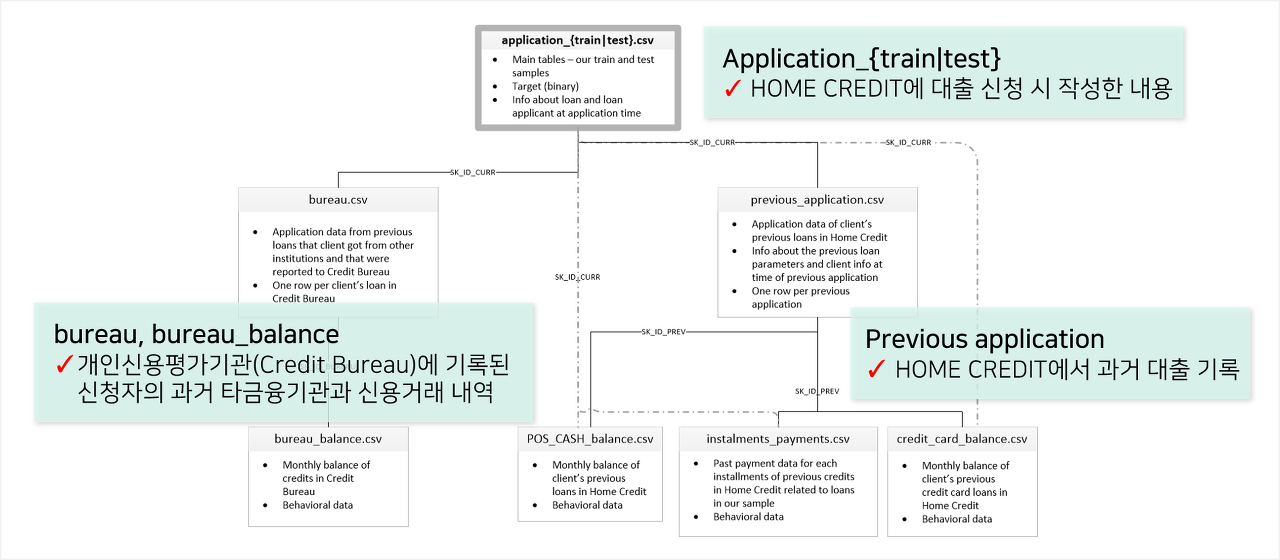

**application_data 칼럼 설명**

---


1) [SK_ID_CURR] ID of loan in our sample, 대출 ID

2) [TARGET] 0: 지불할 수 있는 고객 1: 지불에 어려움을 겪는 고객: 첫 대출 금액 Y의 적어도 일부분에 대해 X날 이상 지불이 늦음 

5) [NAME_CONTRACT_TYPE] Identification if loan is cash or revolving, 대출이 현금인지 리볼빙인지
*리볼빙: 약정된 결제일에 최소 금액만 결제하고 나머지 대금은 대출로 이전하는 방식

6) [CODE_GENDER] Gender of the client, 성별[F/M/XNA]

7) [FLAG_OWN_CAR] Flag if the client owns a car, 차 소유 여부[Y/N]

8) [FLAG_OWN_REALTY] Flag if client owns a house or flat, 집/아파트 보유 여부[Y/N]

9) [CNT_CHILDREN] Number of children the client has, 자녀수

10) [AMT_INCOME_TOTAL] Income of the client, 수입

11) [AMT_CREDIT] Credit amount of the loan, 대출 총액

12) [AMT_ANNUITY] Loan annuity, 매달 내야하는 돈(이자 포함)

13) [AMT_GOODS_PRICE] For consumer loans it is the price of the goods for which the loan is given, 대출받아서 사려고 한 상품 총액

14) [NAME_TYPE_SUITE] Who was accompanying client when he was applying for the loan, 대출 신청시 동행인
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'NAN' 'Other_B' 'Group of people']

15) [NAME_INCOME_TYPE] "Clients income type (businessman, working, maternity leave,... )", 소득 타입
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed' 'Student' 'Businessman' 'Maternity leave']

16) [NAME_EDUCATION_TYPE] Level of highest education the client achieved, 최종 학력 수준
['Secondary / secondary special' 'Higher education' 'Incomplete higher' 'Lower secondary' 'Academic degree']

17) [NAME_FAMILY_STATUS] Family status of the client, 가족 현황
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' 'Unknown']

18) [NAME_HOUSING_TYPE] "What is the housing situation of the client (renting, living with parents, ...)", 주거 현황
['House / apartment' 'Rented apartment' 'With parents' 'Municipal apartment' 'Office apartment' 'Co-op apartment']

19) [REGION_POPULATION_RELATIVE] Normalized population of region where client lives (higher number means the client lives in more populated region),normalized, 고객 거주 지역의 정규화된 인구수(높을수록 인구수 많음)

20) [DAYS_BIRTH] Client's age in days at the time of application,time only relative to the application, 신청날 고객 나이

21) [DAYS_EMPLOYED] How many days before the application the person started current employment,time only relative to the application, 신청일 기준 현재 직장에서 일한 일 수

22) [DAYS_REGISTRATION] How many days before the application did client change his registration,time only relative to the application, 고객이 등록서류를 변경한 일 수, 신청일 기준

23) [DAYS_ID_PUBLISH] How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application, 고객이 대출을 신청한 동안에 신분증 문서를 변경한 일수, 신청일 기준

24) [OWN_CAR_AGE] Age of client's car, 고객 자동차 연식

25) [FLAG_MOBIL] "Did client provide mobile phone (1=YES, 0=NO)", 고객 휴대폰 번호 제공 여부

26) [FLAG_EMP_PHONE] "Did client provide work phone (1=YES, 0=NO)", 고객 직장 번호 제공 여부

27) [FLAG_WORK_PHONE] "Did client provide home phone (1=YES, 0=NO)", 고객 자택 번호 제공 여부

28) [FLAG_CONT_MOBILE] "Was mobile phone reachable (1=YES, 0=NO)", 고객 휴대폰 연결 가능 여부

29) [FLAG_PHONE] "Did client provide home phone (1=YES, 0=NO)", 고객 자택 번호 제공 여부

30) [FLAG_EMAIL] "Did client provide email (1=YES, 0=NO)", 고객 이메일 제공 여부

31) [OCCUPATION_TYPE] What kind of occupation does the client have, 고객 직업

32) [CNT_FAM_MEMBERS] How many family members does client have, 고객 가족 구성원 수

33) [REGION_RATING_CLIENT] "Our rating of the region where client lives (1,2,3)", 고객이 사는 지역에 대한 우리의 평가(1, 2, 3)

34) [REGION_RATING_CLIENT_W_CITY] "Our rating of the region where client lives with taking city into account (1,2,3)", 고객이 사는 도시에 대한 우리의 평가(1, 2, 3)

35) [WEEKDAY_APPR_PROCESS_START] On which day of the week did the client apply for the loan, 대출 신청 요일

36) [HOUR_APPR_PROCESS_START] Approximately at what hour did the client apply for the loan,rounded, 대출 신청한 대략적인 시각

37) [REG_REGION_NOT_LIVE_REGION] "Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)", 고객 영구 주소와 획득 주소가 일치하는지(지역)

38) [REG_REGION_NOT_WORK_REGION] "Flag if client's permanent address does not match work address (1=different, 0=same, at region level)", 고객 영구 주소와 직장 주소가 일치하는지

39) [LIVE_REGION_NOT_WORK_REGION] "Flag if client's contact address does not match work address (1=different, 0=same, at region level)", 고객 획득 주소와 직장 주소가 일치하는지

40) [REG_CITY_NOT_LIVE_CITY] "Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)", 고객 영구 주소와 획득 주소가 일치하는지(도시)

41) [REG_CITY_NOT_WORK_CITY] "Flag if client's permanent address does not match work address (1=different, 0=same, at city level)", 고객 영구 주소와 직장 주소가 일치하는지

42) [LIVE_CITY_NOT_WORK_CITY] "Flag if client's contact address does not match work address (1=different, 0=same, at city level)", 고객 획득 주소와 직장 주소가 일치하는지

43) [ORGANIZATION_TYPE] Type of organization where client works, 고객이 일하는 조직의 유형

44) [EXT_SOURCE_1] Normalized score from external data source,normalized, 외부 데이터 소스의 정규화된 점수

45) [EXT_SOURCE_2] Normalized score from external data source,normalized

46) [EXT_SOURCE_3] Normalized score from external data source,normalized

47 ~ 93) "Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized, 고객이 거주하는 곳에 대한 표준화된 정보, 아파트 사이즈, 공용지, 주거지, 빌딩 나이, 엘리베이터 수, 입구 수, 빌딩 상태, 층 수 등에 대한 평균(_AVG suffix), 최빈값(_MODE suffix), 중앙값 (_MEDI suffix)
  - 47~60 평균(_AVG suffix)
[APARTMENTS_AVG] [BASEMENTAREA_AVG] [YEARS_BEGINEXPLUATATION_AVG] [YEARS_BUILD_AVG] [COMMONAREA_AVG] [ELEVATORS_AVG] [ENTRANCES_AVG] [FLOORSMAX_AVG] [FLOORSMIN_AVG] [LANDAREA_AVG] [LIVINGAPARTMENTS_AVG] [LIVINGAREA_AVG] [NONLIVINGAPARTMENTS_AVG] [NONLIVINGAREA_AVG]
  - 61~74 최빈값(_MODE suffix)
[APARTMENTS_MODE] [BASEMENTAREA_MODE] [YEARS_BEGINEXPLUATATION_MODE] [YEARS_BUILD_MODE] [COMMONAREA_MODE] [ELEVATORS_MODE] [ENTRANCES_MODE] [FLOORSMAX_MODE] [FLOORSMIN_MODE] [LANDAREA_MODE] [LIVINGAPARTMENTS_MODE] [LIVINGAREA_MODE] [NONLIVINGAPARTMENTS_MODE] [NONLIVINGAREA_MODE]
  - 75~88 중앙값 (_MEDI suffix)
[APARTMENTS_MEDI] [BASEMENTAREA_MEDI] [YEARS_BEGINEXPLUATATION_MEDI] [YEARS_BUILD_MEDI] [COMMONAREA_MEDI] [ELEVATORS_MEDI] [ENTRANCES_MEDI] [FLOORSMAX_MEDI] [FLOORSMIN_MEDI] [LANDAREA_MEDI] [LIVINGAPARTMENTS_MEDI] [LIVINGAREA_MEDI] [NONLIVINGAPARTMENTS_MEDI] [NONLIVINGAREA_MEDI]
  - 89~93 최빈값(_MODE suffix)
[FONDKAPREMONT_MODE] [HOUSETYPE_MODE] [TOTALAREA_MODE] [WALLSMATERIAL_MODE] [EMERGENCYSTATE_MODE]

94) [OBS_30_CNT_SOCIAL_CIRCLE] How many observation of client's social surroundings with observable 30 DPD (days past due) default, 고객 주위 사람 중 30일 이상 지불이 늦을 수 있는 사람의 수

95) [DEF_30_CNT_SOCIAL_CIRCLE] How many observation of client's social surroundings defaulted on 30 DPD (days past due), 해당 고객 주위 사람 중 30일 이상 지불이 정말 늦은 사람의 수

96) [OBS_60_CNT_SOCIAL_CIRCLE] How many observation of client's social surroundings with observable 60 DPD (days past due) default, 해당 고객 주위 사람 중 60일 이상 지불이 늦을 수 있는 사람의 수

97) [DEF_60_CNT_SOCIAL_CIRCLE] How many observation of client's social surroundings defaulted on 60 (days past due) DPD, 해당 고객 주위 사람 중 60일 이상 지불이 정말 늦은 사람의 수

98) [DAYS_LAST_PHONE_CHANGE] How many days before application did client change phone, 대출 신청 며칠 전에 휴대폰을 변경했는가?

99 ~ 118) Did client provide document 2 ~ 21, 고객 문서 제공 횟수
[FLAG_DOCUMENT_2] [FLAG_DOCUMENT_3] [FLAG_DOCUMENT_4] [FLAG_DOCUMENT_5] [FLAG_DOCUMENT_6] [FLAG_DOCUMENT_7] [FLAG_DOCUMENT_8] [FLAG_DOCUMENT_9] [FLAG_DOCUMENT_10] [FLAG_DOCUMENT_11] [FLAG_DOCUMENT_12] [FLAG_DOCUMENT_13] [FLAG_DOCUMENT_14] [FLAG_DOCUMENT_14] [FLAG_DOCUMENT_15] [FLAG_DOCUMENT_16] [FLAG_DOCUMENT_17] [FLAG_DOCUMENT_18] [FLAG_DOCUMENT_19] [FLAG_DOCUMENT_20] [FLAG_DOCUMENT_21]

119) [AMT_REQ_CREDIT_BUREAU_HOUR] ,Number of enquiries to Credit Bureau about the client one hour before application, 신청 전 1시간 고객에 대한 CB로의 문의 횟수

120) [AMT_REQ_CREDIT_BUREAU_DAY] Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application), 신청 전 하루동안 고객에 대한 CB로의 문의 횟수(1시간 전 제외)

121) [AMT_REQ_CREDIT_BUREAU_WEEK] Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application), 신청 전 일주일동안 고객에 대한 CB로의 문의 횟수(하루 전 제외)

122) [AMT_REQ_CREDIT_BUREAU_MON] Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application), 신청 전 한 달동안 고객에 대한 CB로의 문의 횟수(일주일 전 전 제외)

123) [AMT_REQ_CREDIT_BUREAU_QRT] Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application), 신청 전 세 달 동안 고객에 대한 CB로의 문의 횟수(한 달 전 제외)

124) [AMT_REQ_CREDIT_BUREAU_YEAR] Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application), 신청 전 일년 동안 고객에 대한 CB로의 문의 횟수(세 달 전 제외)

# 결측치 확인

In [ ]:
null_check_1 = app_data.dropna(axis=1)

columns_name = []
for i in range(len(app_data.columns)):
  a = app_data.columns[i]
  if app_data[a].isnull().sum() != 0:
    columns_name.append(a)
null_check_2 = app_data[columns_name]

null_percentage = {}
for i in columns_name:
  a = round(null_check_2[i].isnull().sum() / len(null_check_2) * 100, 2)
  null_percentage[i] = a

In [ ]:
null_check_1.info() # 결측치 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
null_check_2.info() # 결측치 O

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_ANNUITY                   307499 non-null  float64
 1   AMT_GOODS_PRICE               307233 non-null  float64
 2   NAME_TYPE_SUITE               306219 non-null  object 
 3   OWN_CAR_AGE                   104582 non-null  float64
 4   OCCUPATION_TYPE               211120 non-null  object 
 5   CNT_FAM_MEMBERS               307509 non-null  float64
 6   EXT_SOURCE_1                  134133 non-null  float64
 7   EXT_SOURCE_2                  306851 non-null  float64
 8   EXT_SOURCE_3                  246546 non-null  float64
 9   APARTMENTS_AVG                151450 non-null  float64
 10  BASEMENTAREA_AVG              127568 non-null  float64
 11  YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 12  YEARS_BUILD_AVG               103023 non-nul

In [ ]:
null_percentage # 결측치 비율

{'AMT_ANNUITY': 0.0,
 'AMT_GOODS_PRICE': 0.09,
 'NAME_TYPE_SUITE': 0.42,
 'OWN_CAR_AGE': 65.99,
 'OCCUPATION_TYPE': 31.35,
 'CNT_FAM_MEMBERS': 0.0,
 'EXT_SOURCE_1': 56.38,
 'EXT_SOURCE_2': 0.21,
 'EXT_SOURCE_3': 19.83,
 'APARTMENTS_AVG': 50.75,
 'BASEMENTAREA_AVG': 58.52,
 'YEARS_BEGINEXPLUATATION_AVG': 48.78,
 'YEARS_BUILD_AVG': 66.5,
 'COMMONAREA_AVG': 69.87,
 'ELEVATORS_AVG': 53.3,
 'ENTRANCES_AVG': 50.35,
 'FLOORSMAX_AVG': 49.76,
 'FLOORSMIN_AVG': 67.85,
 'LANDAREA_AVG': 59.38,
 'LIVINGAPARTMENTS_AVG': 68.35,
 'LIVINGAREA_AVG': 50.19,
 'NONLIVINGAPARTMENTS_AVG': 69.43,
 'NONLIVINGAREA_AVG': 55.18,
 'APARTMENTS_MODE': 50.75,
 'BASEMENTAREA_MODE': 58.52,
 'YEARS_BEGINEXPLUATATION_MODE': 48.78,
 'YEARS_BUILD_MODE': 66.5,
 'COMMONAREA_MODE': 69.87,
 'ELEVATORS_MODE': 53.3,
 'ENTRANCES_MODE': 50.35,
 'FLOORSMAX_MODE': 49.76,
 'FLOORSMIN_MODE': 67.85,
 'LANDAREA_MODE': 59.38,
 'LIVINGAPARTMENTS_MODE': 68.35,
 'LIVINGAREA_MODE': 50.19,
 'NONLIVINGAPARTMENTS_MODE': 69.43,
 'NONLIVINGAREA_M

결측치 비율이 50%가 넘는 값들이 보임. 추가적인 확인작업을 거친 후 전처리

In [ ]:
temporary_data = app_data.iloc[:, 44:91] # 고객이 거주하는 곳에 대한 표준화된 정보
home_null_percentage = [list(temporary_data.isnull().sum())[i]/307511*100 for i in range(len(list(temporary_data.isnull().sum())))]

In [ ]:
home_null_percentage

[50.74972927797705,
 58.51595552679416,
 48.781019215572776,
 66.49778381911543,
 69.87229725115525,
 53.29597965601231,
 50.3487680115508,
 49.76082156410665,
 67.84862980511267,
 59.376737742714894,
 68.35495315614726,
 50.193326417591564,
 69.43296337366793,
 55.17916432257708,
 50.74972927797705,
 58.51595552679416,
 48.781019215572776,
 66.49778381911543,
 69.87229725115525,
 53.29597965601231,
 50.3487680115508,
 49.76082156410665,
 67.84862980511267,
 59.376737742714894,
 68.35495315614726,
 50.193326417591564,
 69.43296337366793,
 55.17916432257708,
 50.74972927797705,
 58.51595552679416,
 48.781019215572776,
 66.49778381911543,
 69.87229725115525,
 53.29597965601231,
 50.3487680115508,
 49.76082156410665,
 67.84862980511267,
 59.376737742714894,
 68.35495315614726,
 50.193326417591564,
 69.43296337366793,
 55.17916432257708,
 68.38617155158677,
 50.176091261776,
 48.26851722377411,
 50.8407829313423,
 47.39830445089769]

거주지에 대한 정보가 전체적으로 결측치가 많으며 해석에 무리가 있다고 판단하여 제거

In [ ]:
col_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
temporary_data = app_data[col_list]
temporary_data.isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

동일한 결측치로 판단 / 수집이 되지않았다 = 문의 내역이 없다로 판단 0으로 처리

In [ ]:
app_data[app_data.CNT_FAM_MEMBERS.isnull()][['CNT_FAM_MEMBERS','NAME_FAMILY_STATUS','CNT_CHILDREN']]

,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS,CNT_CHILDREN
41982,NaN,Unknown,0
187348,NaN,Unknown,0


자녀가 없고 FAMILY_STATUS를 모르므로 인구 추정이 불가(결혼은 했으나 자녀가 없을가능성 배제 불가) 따라서 데이터 제거

# 이상치 확인

In [ ]:
def visual_outlier(data, column_name):
  plt.figure(figsize=(10,8))
  sns.stripplot(y=data[column_name])
  plt.title('Outlier_'+column_name)
  plt.show

In [ ]:
def outliers_iqr(data,column_name):
  q1, q3 = np.percentile(data[column_name], [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  index = np.where((data[column_name] > upper_bound) | (data[column_name] < lower_bound))[0]
  
  # outlier = data.iloc[index]

  index_list = []

  for i in range(len(data)):
    if i not in index:
      index_list.append(i)

  remove_outlier = data.loc[index_list]
  remove_outlier.reset_index(drop=True, inplace=True)

  return remove_outlier

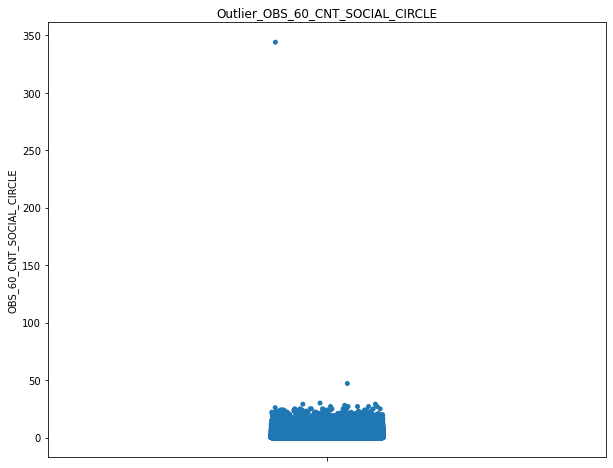

In [ ]:
visual_outlier(app_data,'OBS_60_CNT_SOCIAL_CIRCLE') # 눈에띄는 이상치 하나 보임 / 제거요망

In [ ]:
app_data[['TARGET', 'OBS_60_CNT_SOCIAL_CIRCLE']][app_data['OBS_60_CNT_SOCIAL_CIRCLE']>=30]

,TARGET,OBS_60_CNT_SOCIAL_CIRCLE
77497,0,47.0
148403,0,344.0
169517,0,30.0


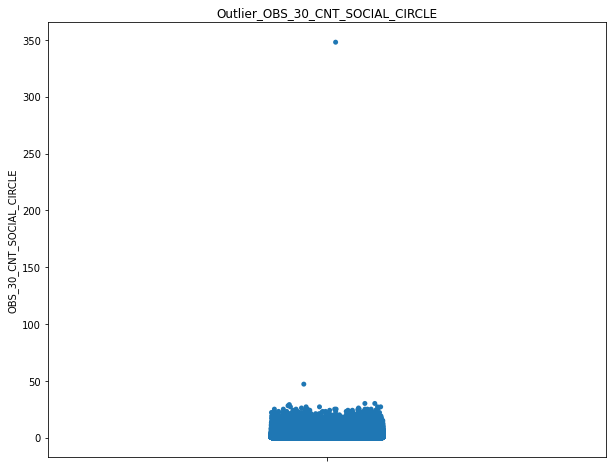

In [ ]:
visual_outlier(app_data,'OBS_30_CNT_SOCIAL_CIRCLE') # 눈에띄는 이상치 하나 보임 / 제거요망

In [ ]:
app_data[['TARGET', 'OBS_30_CNT_SOCIAL_CIRCLE']][app_data['OBS_30_CNT_SOCIAL_CIRCLE']>=30]

,TARGET,OBS_30_CNT_SOCIAL_CIRCLE
77497,0,47.0
148403,0,348.0
169517,0,30.0
280641,1,30.0


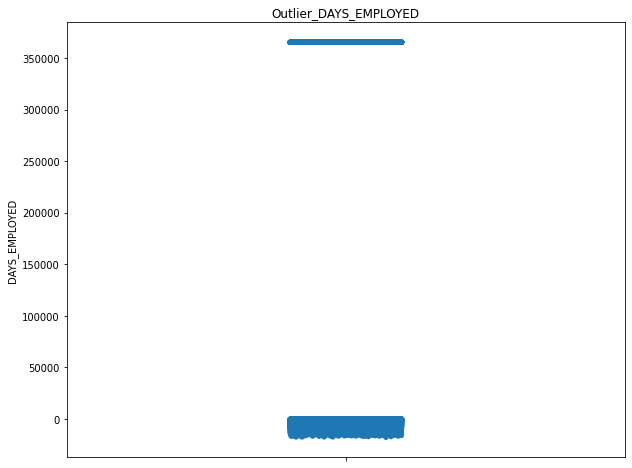

In [ ]:
visual_outlier(app_data,'DAYS_EMPLOYED') # 0 이상의값이 매우많음

In [ ]:
app_data[app_data['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique() # 0 이상의 값이 모두 365243을 나타냄 / 임의로 분류된 값이라 판단하고 결측치 처리함

array([365243])

# 전처리

In [ ]:
# 시각화를 위한 TARGET 전처리
app_data['TARGET'] = app_data['TARGET'].astype('str')
app_data['TARGET'] = app_data['TARGET'].astype('category')

app_data['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: category
Categories (2, object): ['0', '1']

## 결측치 처리

In [ ]:
col_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in col_list:
  app_data[i] = app_data[i].fillna(0)

In [ ]:
app_data = app_data.dropna(subset=['CNT_FAM_MEMBERS'], axis=0)
app_data.reset_index(inplace=True, drop=True)

## 변형 및 생성

In [ ]:
# 수입 대비 매달 내야하는 금액(이자) / 수치가 높을수록 수입에 비해 많은 금액이 매달 지출되고있음
new_ANNUITY_INCOME = app_data['AMT_ANNUITY'] / app_data['AMT_INCOME_TOTAL']
app_data['new_ANNUITY_INCOME'] = pd.DataFrame(new_ANNUITY_INCOME)

In [ ]:
# 수입 대비 대출 총액
new_CREDIT_INCOME = app_data['AMT_CREDIT'] / app_data['AMT_INCOME_TOTAL']
app_data['new_CREDIT_INCOME'] = pd.DataFrame(new_CREDIT_INCOME)

In [ ]:
# 수입 대비 대출 상품 가격
new_GOODS_INCOME = app_data['AMT_GOODS_PRICE'] / app_data['AMT_INCOME_TOTAL']
app_data['new_GOODS_INCOME'] = pd.DataFrame(new_GOODS_INCOME)

In [ ]:
# 거주지의 정보적 차이가 존재하느냐
list_ = []
col_list = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
for i in range(len(app_data)):
  temp = []
  for a in col_list:
    temp.append(int(app_data[a][i]))
  sum_temp = sum(temp)
  if sum_temp == 0:
    list_.append(0)
  else:
    list_.append(1)
new_REGION = pd.Series(list_)
app_data['new_REGION'] = pd.DataFrame(new_REGION)

In [ ]:
# 기간별 문의횟수를 1년전체 문의횟수로 통합
list_ = []
col_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in range(len(app_data)):
  temp = []
  for a in col_list:
    temp.append(int(app_data[a][i]))
  sum_temp = sum(temp)
  list_.append(sum_temp)
new_REQ_CREDIT = pd.Series(list_)
app_data['new_REQ_CREDIT'] = pd.DataFrame(new_REQ_CREDIT)

In [ ]:
# 거주지가 자가인가 타가인가
list_ = []
owns = ['House / apartment', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
others = ['Rented apartment', 'With parents']
for i in range(len(app_data)):
  if app_data['NAME_HOUSING_TYPE'][i] in owns:
    list_.append(0)
  elif app_data['NAME_HOUSING_TYPE'][i] in others:
    list_.append(1)
  else:
    list_.append(2)
app_data['new_HOME_TYPE'] = pd.DataFrame(list_)

In [ ]:
# 교육 수준이 높은가 낮은가
list_ = []
higher_edu = ['Higher education', 'Incomplete higher', 'Academic degree']
lower_edu = ['Secondary / secondary special', 'Lower secondary']
for i in range(len(app_data)):
  if app_data['NAME_EDUCATION_TYPE'][i] in higher_edu:
    list_.append(0)
  elif app_data['NAME_EDUCATION_TYPE'][i] in lower_edu:
    list_.append(1)
  else:
    list_.append(2)
app_data['new_EDU_LEVEL'] = pd.DataFrame(list_)

In [ ]:
# DAYS_EMPLOYED가 0이상인 사람을 알수가 없기 때문에 Nan값 처리
list_ = []
for i in range(len(app_data)):
  if app_data['DAYS_EMPLOYED'][i] > 0:
    list_.append(np.NaN)
  elif app_data['DAYS_EMPLOYED'][i] <= 0:
    list_.append(app_data['DAYS_EMPLOYED'][i])
  else:
    list_.append('error')
app_data['new_EMPLOYED_DAYS'] = pd.DataFrame(list_)

In [ ]:
# 경제인구 (가족구성원 중 자녀를 제외한 인원수) 확인
list_ = []
for i in range(len(app_data)):
  temp = app_data['CNT_FAM_MEMBERS'][i] - app_data['CNT_CHILDREN'][i]
  list_.append(temp)
app_data['new_ECONOMIC_POPULATION'] = pd.DataFrame(list_)

## 제거

In [ ]:
# 유의미 하지 않다고 판단
app_data_deleted = app_data.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)

In [ ]:
# 별도의 칼럼 생성후 제거
app_data_deleted = app_data_deleted.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                          'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                                          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                                          'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                                          'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                                          'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                                          'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                                          'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                                          'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                                          'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                                          'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                                          'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                                          'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                                          'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                                          'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                                          'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                                          'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                                          'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                                          'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                                          'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                                          'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                                          'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                                          'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                          'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['REGION_RATING_CLIENT'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'], axis=1)  

In [ ]:
app_data_deleted = app_data_deleted.drop(['NAME_HOUSING_TYPE','FLAG_OWN_REALTY'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['FLAG_OWN_CAR','OWN_CAR_AGE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['NAME_EDUCATION_TYPE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['REGION_POPULATION_RELATIVE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['NAME_TYPE_SUITE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['OCCUPATION_TYPE','NAME_INCOME_TYPE','ORGANIZATION_TYPE'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['DAYS_EMPLOYED'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['DAYS_ID_PUBLISH'], axis=1)

In [ ]:
app_data_deleted = app_data_deleted.drop(['DAYS_LAST_PHONE_CHANGE'], axis=1)

In [ ]:
app_data_deleted.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'new_ANNUITY_INCOME', 'new_CREDIT_INCOME',
       'new_GOODS_INCOME', 'new_REGION', 'new_REQ_CREDIT', 'new_HOME_TYPE',
       'new_EDU_LEVEL', 'new_EMPLOYED_DAYS', 'new_ECONOMIC_POPULATION'],
      dtype='object')

In [ ]:
app_data_deleted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307509 entries, 0 to 307508
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307509 non-null  int64   
 1   TARGET                       307509 non-null  category
 2   NAME_CONTRACT_TYPE           307509 non-null  object  
 3   CODE_GENDER                  307509 non-null  object  
 4   DAYS_BIRTH                   307509 non-null  int64   
 5   DAYS_REGISTRATION            307509 non-null  float64 
 6   REGION_RATING_CLIENT_W_CITY  307509 non-null  int64   
 7   HOUR_APPR_PROCESS_START      307509 non-null  int64   
 8   EXT_SOURCE_1                 134132 non-null  float64 
 9   EXT_SOURCE_2                 306849 non-null  float64 
 10  EXT_SOURCE_3                 246545 non-null  float64 
 11  new_ANNUITY_INCOME           307497 non-null  float64 
 12  new_CREDIT_INCOME            307509 non-null

## 데이터 내보내기

In [ ]:
app_data_deleted.to_csv('applcation_end.csv')

# 시각화_1

## Code

In [ ]:
def visual_numerical(dataset, column_name, log=False):
  
  if log == False:
    plt.figure(figsize=(30,10))
    sns.distplot(dataset[column_name][dataset['TARGET']=='0'])
    sns.distplot(dataset[column_name][dataset['TARGET']=='1'])
    plt.legend(['Target_0', 'Target_1'], loc='best')
    plt.title('histogram_'+column_name)
    plt.ticklabel_format(style='plain')
    plt.show
  
  if log == True:
    copy_data = dataset.copy()
    copy_data[column_name] = np.log(copy_data[column_name])

    plt.figure(figsize=(30,10))
    sns.distplot(copy_data[column_name][dataset['TARGET']=='0'])
    sns.distplot(copy_data[column_name][dataset['TARGET']=='1'])
    plt.legend(['Target_0', 'Target_1'], loc='best')
    plt.title('histogram_'+column_name)
    plt.ticklabel_format(style='plain')
    plt.show

In [ ]:
def visual_categorical(data, column_name, norm=True, just_count=False, reverse=False):
  
  if just_count == False:
    if norm == True:
      if reverse == False:
        df = data.groupby(column_name)['TARGET'].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()
        df = df.rename(columns = {'level_1': 'TARGET'})

        g = sns.catplot(x=column_name,y='percent',hue='TARGET',kind='bar',data=df)
        g.ax.set_ylim(0,100)
        for p in g.ax.patches:
          txt = str(p.get_height().round(2)) + '%'
          txt_x = p.get_x() + p.get_width() / 2
          txt_y = p.get_height()
          g.ax.text(txt_x,txt_y,txt,ha = 'center',fontsize=10)
        g.fig.set_size_inches(30,10)
        plt.title('barplot_'+column_name)
        plt.show

      if reverse == True:
        df = data.groupby('TARGET')[column_name].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()

        g = sns.catplot(x='TARGET',y='percent',hue=column_name,kind='bar',data=df)
        g.ax.set_ylim(0,100)
        for p in g.ax.patches:
          txt = str(p.get_height().round(2)) + '%'
          txt_x = p.get_x() + p.get_width() / 2
          txt_y = p.get_height()
          g.ax.text(txt_x,txt_y,txt,ha = 'center',fontsize=10)
        g.fig.set_size_inches(30,10)
        plt.title('barplot_'+column_name)
        plt.show


    if norm == False:
      if reverse == False:
        plt.figure(figsize=(30,10))
        ax = sns.countplot(x=column_name, data=data, hue='TARGET')
        for p in ax.patches:
          height = p.get_height()
          ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
        plt.title('barplot_'+column_name)
        plt.show
      
      if reverse == True:
        plt.figure(figsize=(30,10))
        ax = sns.countplot(x='TARGET', data=data, hue=column_name)
        for p in ax.patches:
          height = p.get_height()
          ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
        plt.title('barplot_'+column_name)
        plt.show

  if just_count == True:
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=column_name, data=data)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
    plt.title('barplot_'+column_name)
    plt.show

## TARGET

<function matplotlib.pyplot.show(*args, **kw)>

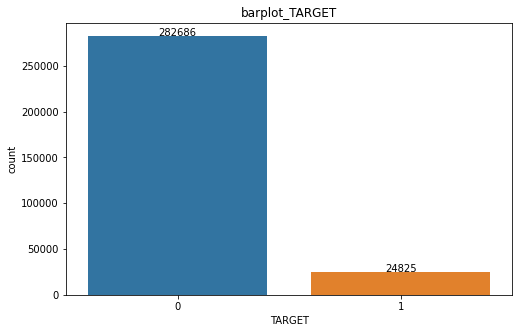

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='TARGET', data=app_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
plt.title('barplot_TARGET')
plt.show

타겟 값이 282686 : 24825로 매우 불균형한것을 확인할 수 있음

전체 데이터중 TARGET 0 이 차지하는 비율 91.93%

## FLAG_MOBILE~EMAIL

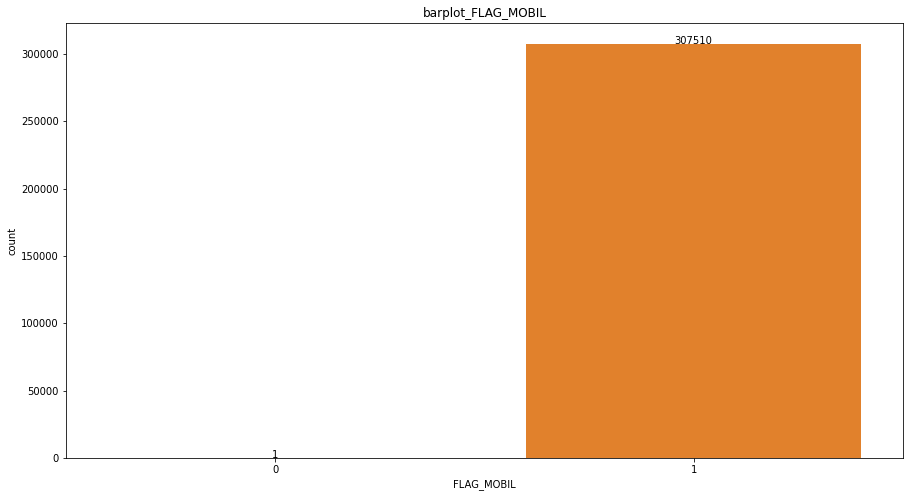

In [ ]:
visual_categorical(app_data, 'FLAG_MOBIL', just_count=True)

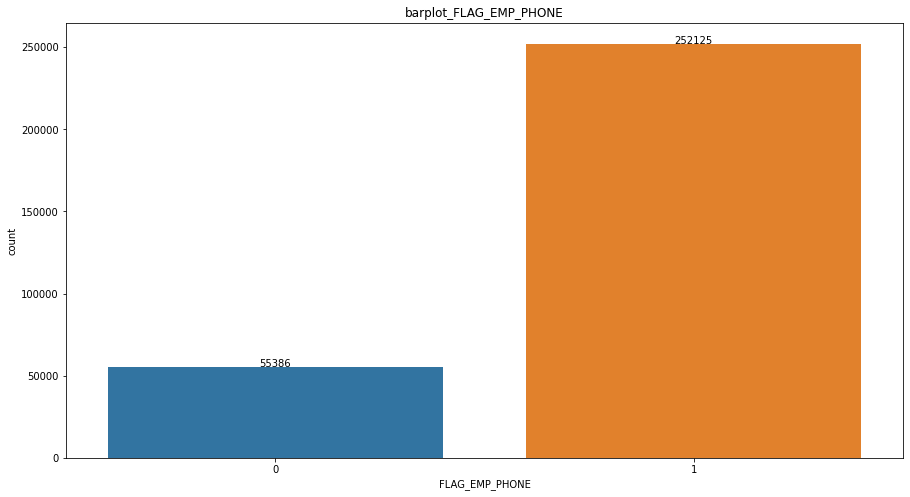

In [ ]:
visual_categorical(app_data, 'FLAG_EMP_PHONE', just_count=True)

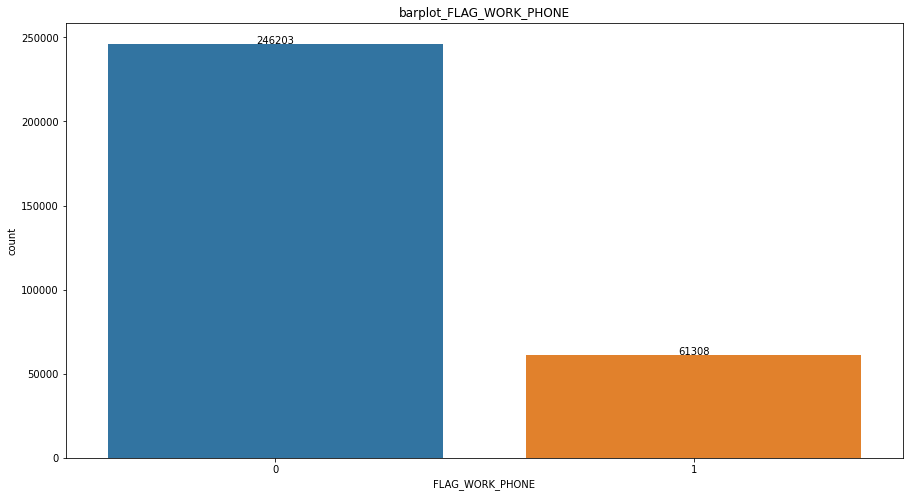

In [ ]:
visual_categorical(app_data, 'FLAG_WORK_PHONE', just_count=True)

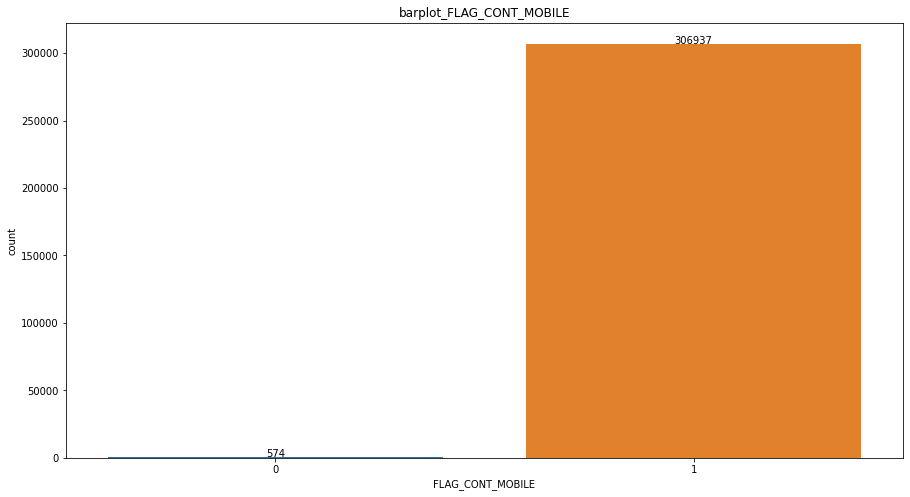

In [ ]:
visual_categorical(app_data, 'FLAG_CONT_MOBILE', just_count=True)

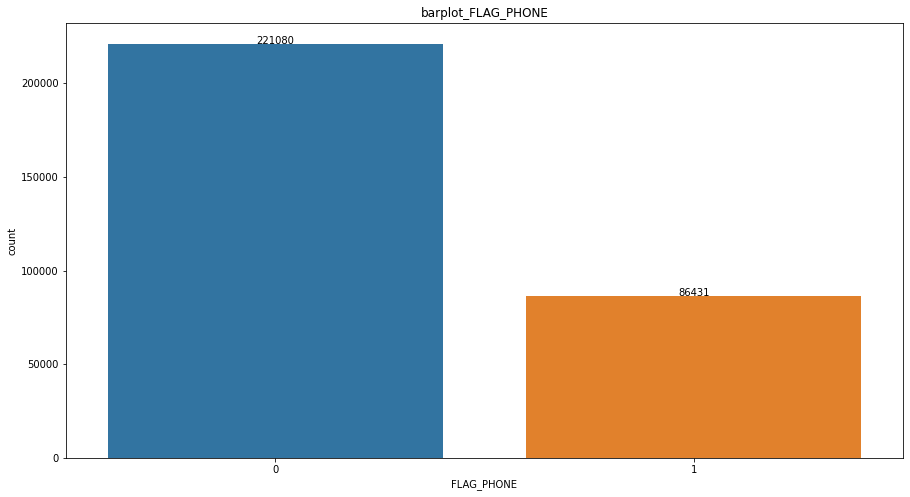

In [ ]:
visual_categorical(app_data, 'FLAG_PHONE', just_count=True)

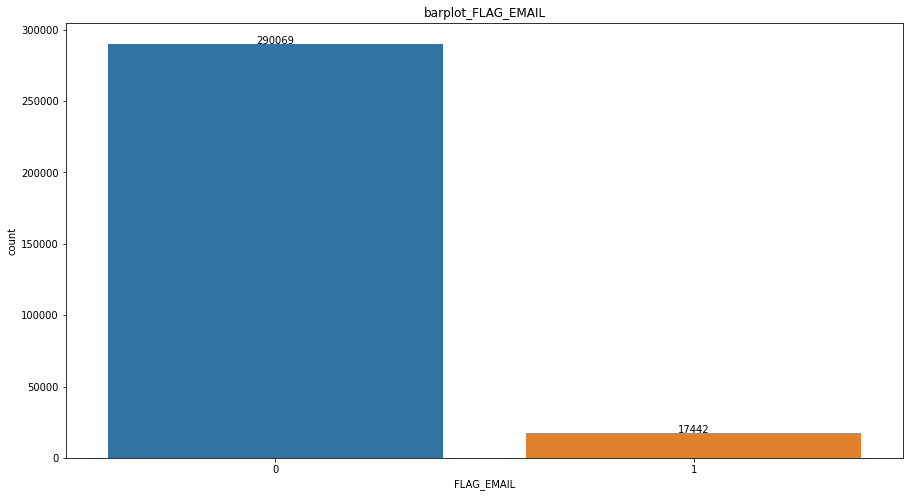

In [ ]:
visual_categorical(app_data, 'FLAG_EMAIL', just_count=True)

MOBIL, MOBILE, EMAIL 비율이 극단적임

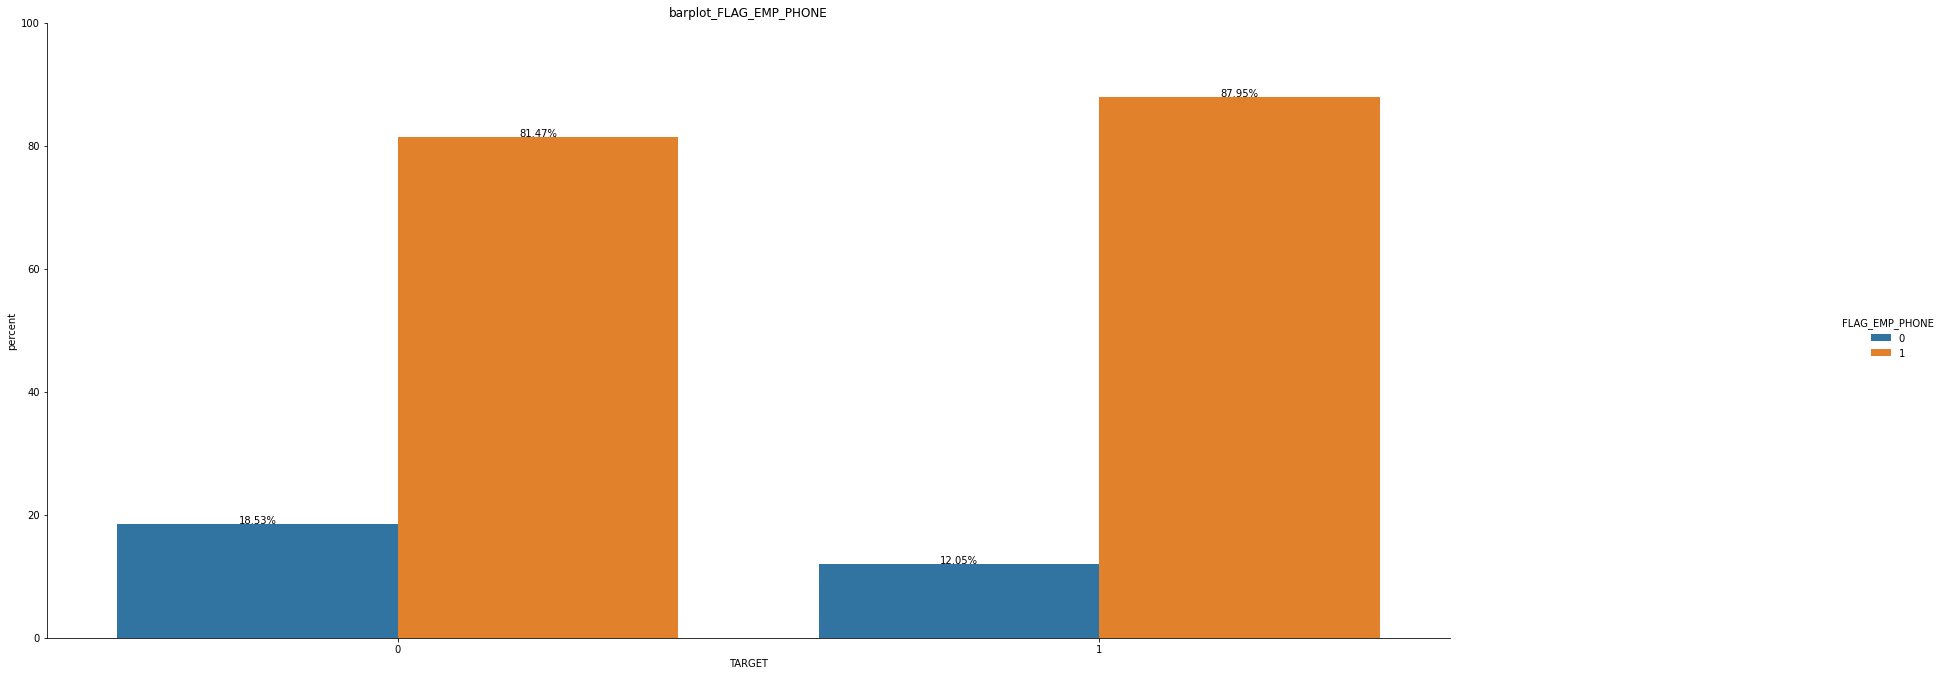

In [ ]:
visual_categorical(app_data, 'FLAG_EMP_PHONE', norm=True, reverse=True)

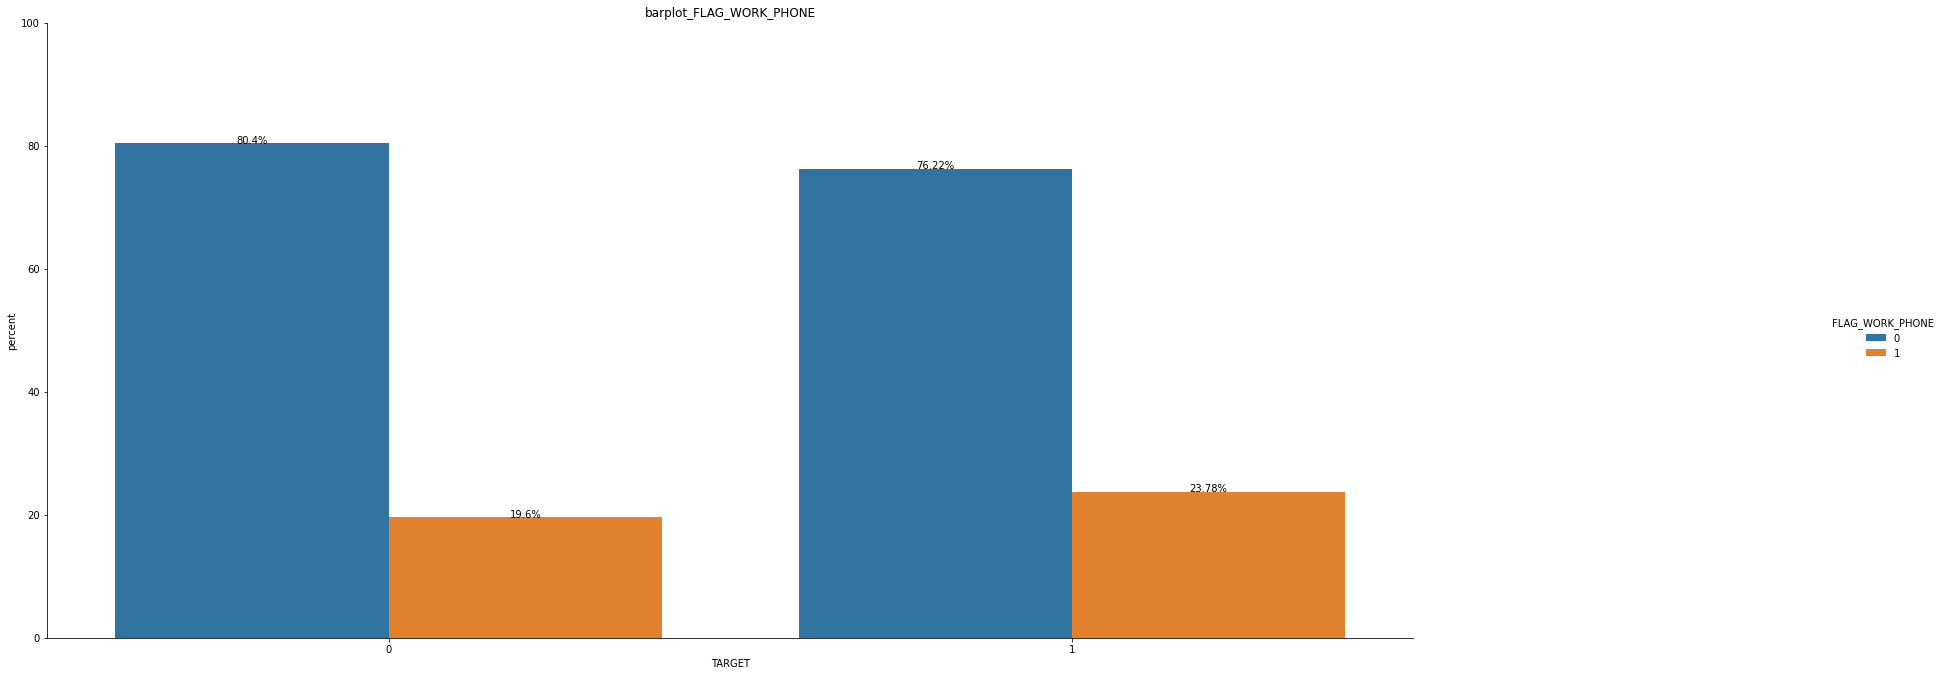

In [ ]:
visual_categorical(app_data, 'FLAG_WORK_PHONE', norm=True, reverse=True)

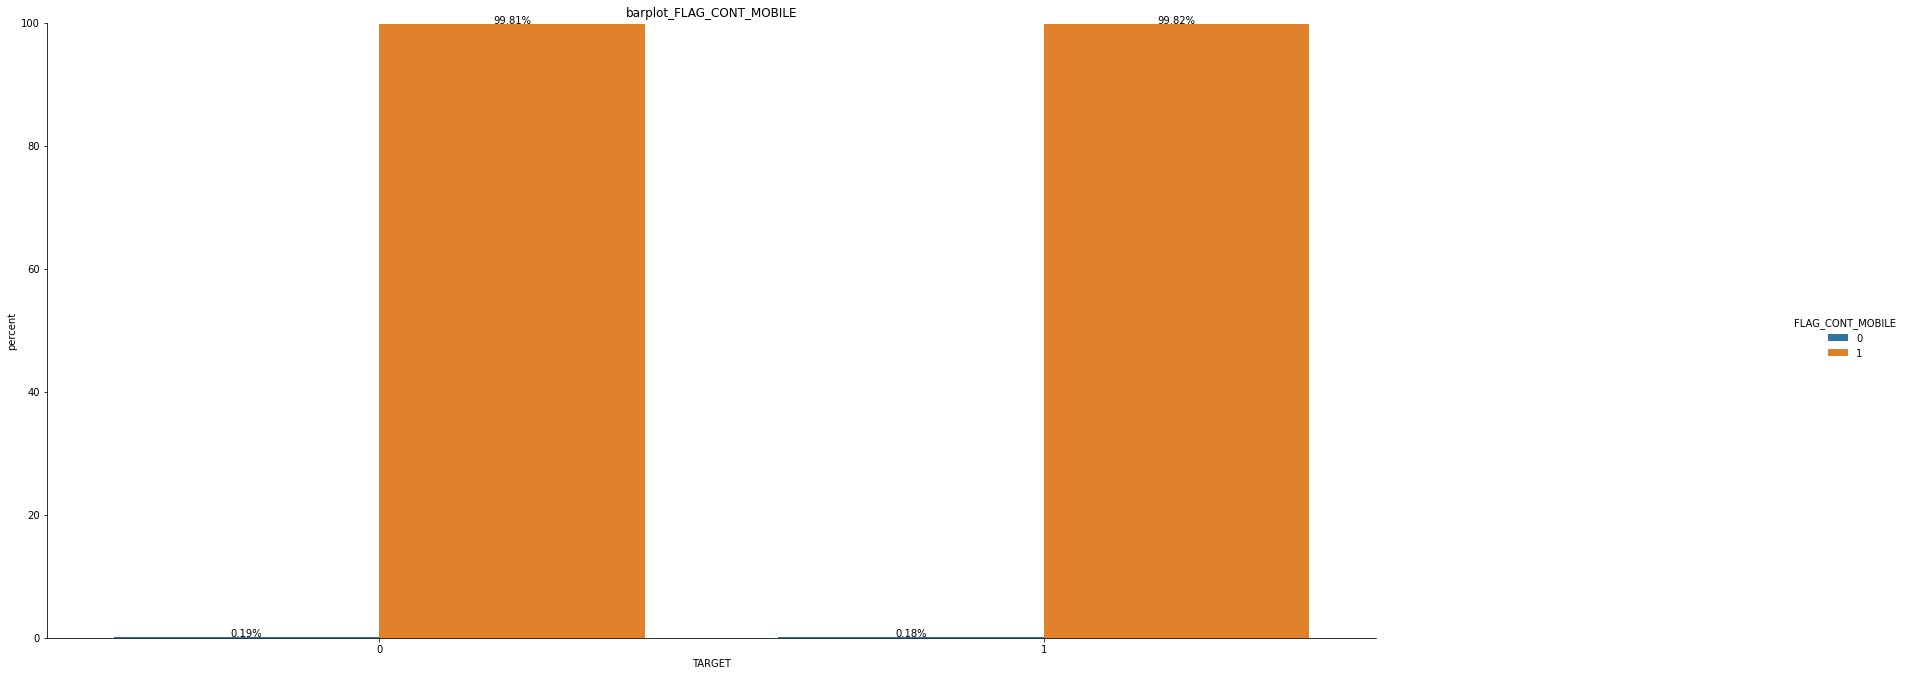

In [ ]:
visual_categorical(app_data, 'FLAG_CONT_MOBILE', norm=True, reverse=True)

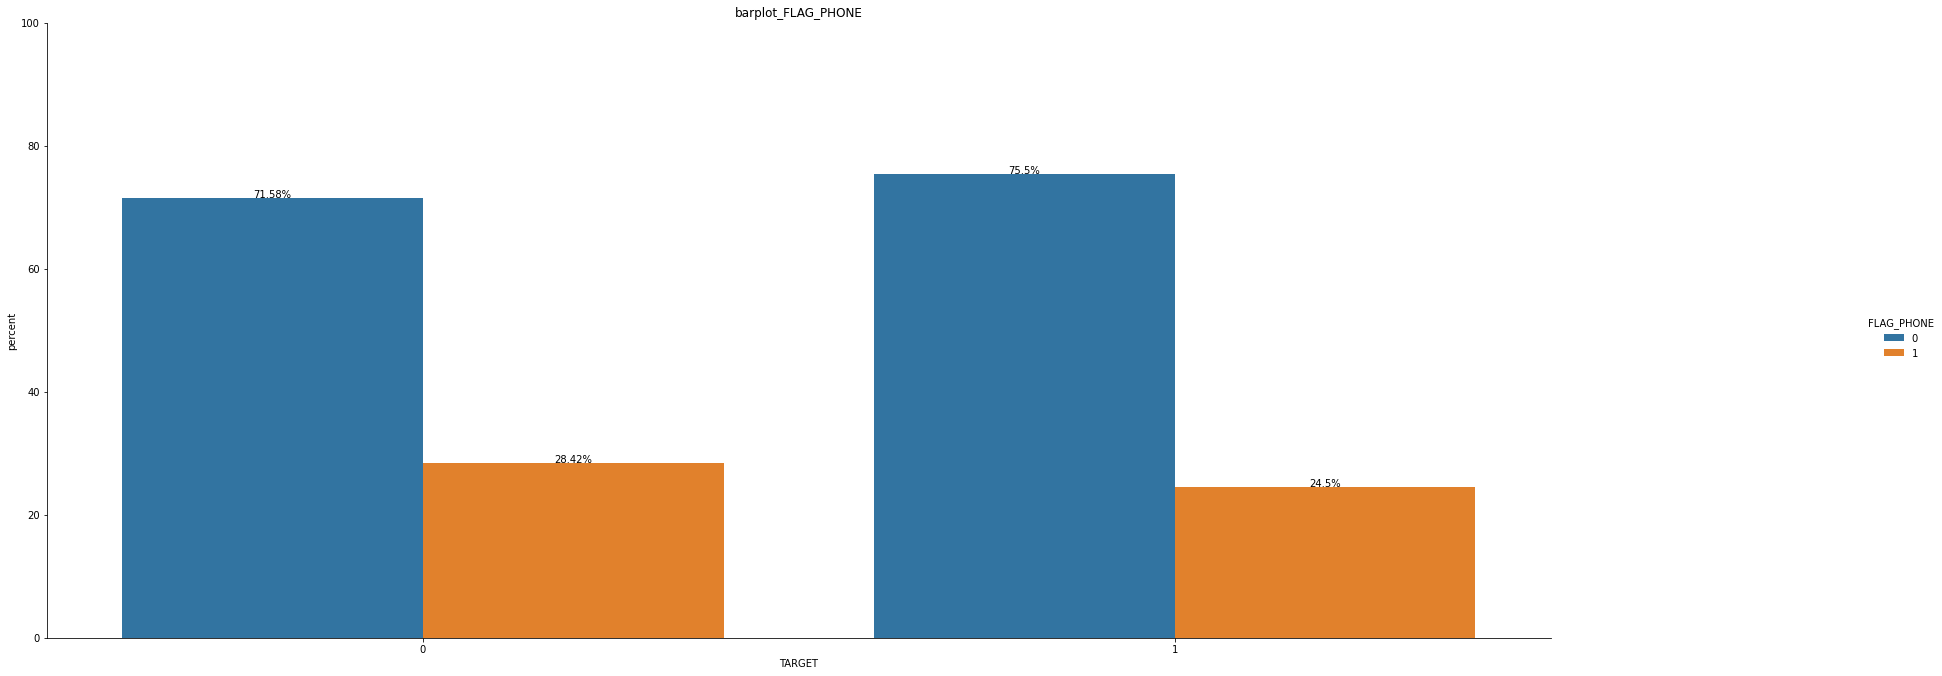

In [ ]:
visual_categorical(app_data, 'FLAG_PHONE', norm=True, reverse=True)

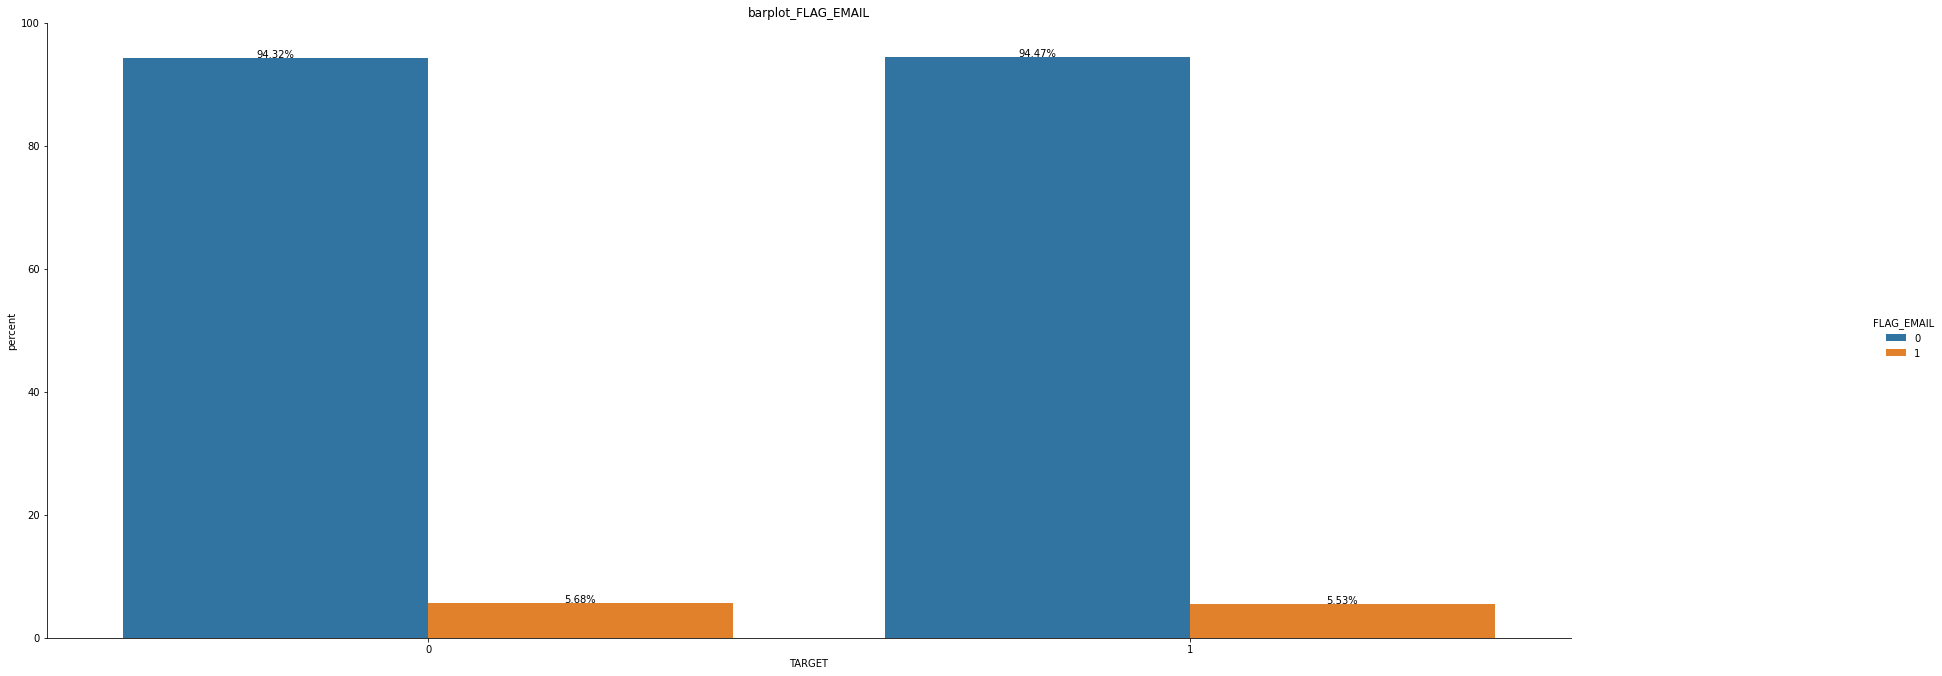

In [ ]:
visual_categorical(app_data, 'FLAG_EMAIL', norm=True, reverse=True)

확인 결과 값과는 상관없이 일정하게 TARGET 0 비율이 90%대를 유지하고있음

기존 TARGET의 분포와 동일한 분포를 보이기 때문에 TARGET 분류에 적합하지 않다고 판단하여 제거

## [LIVE, REG, WORK]_REGION

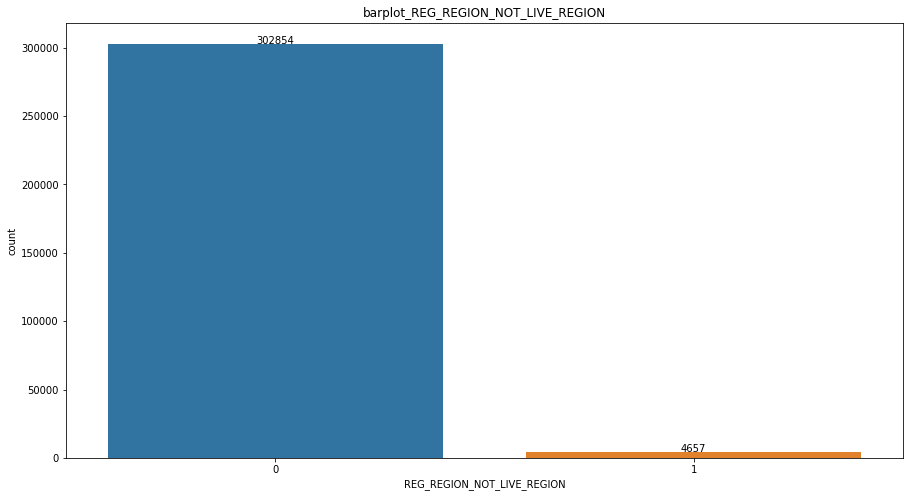

In [ ]:
visual_categorical(app_data, 'REG_REGION_NOT_LIVE_REGION', just_count=True)

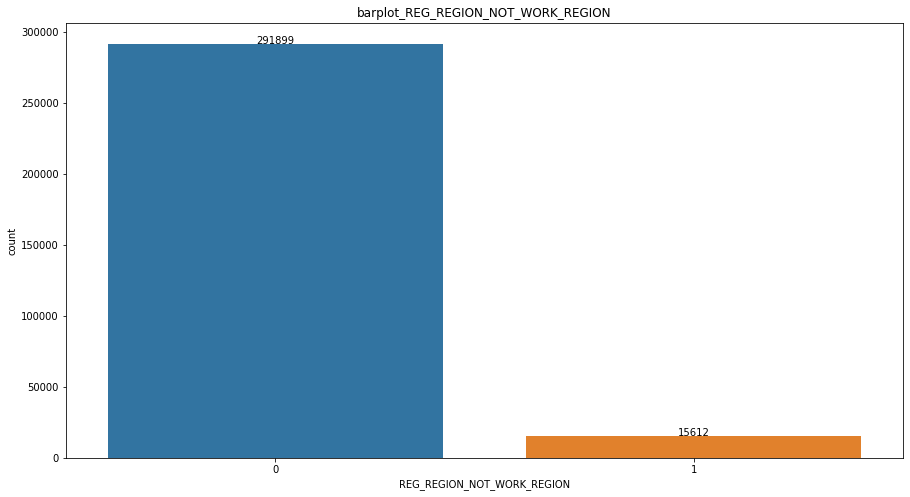

In [ ]:
visual_categorical(app_data, 'REG_REGION_NOT_WORK_REGION', just_count=True)

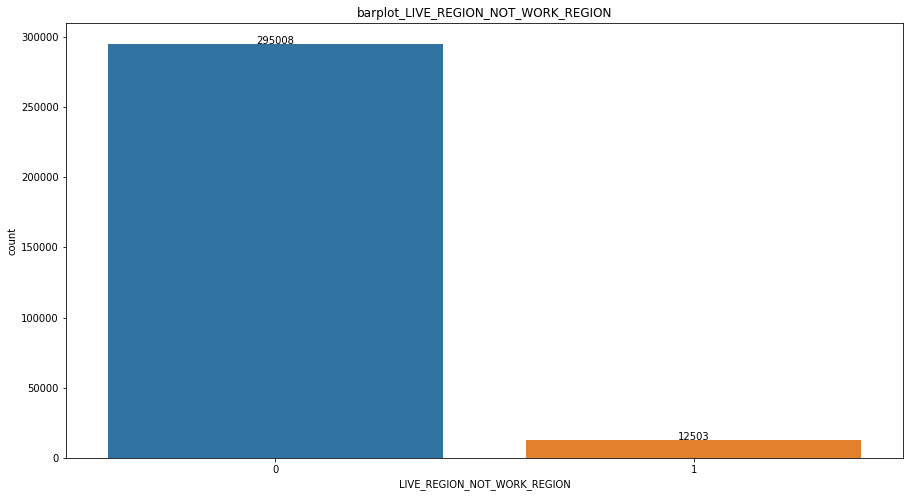

In [ ]:
visual_categorical(app_data, 'LIVE_REGION_NOT_WORK_REGION', just_count=True)

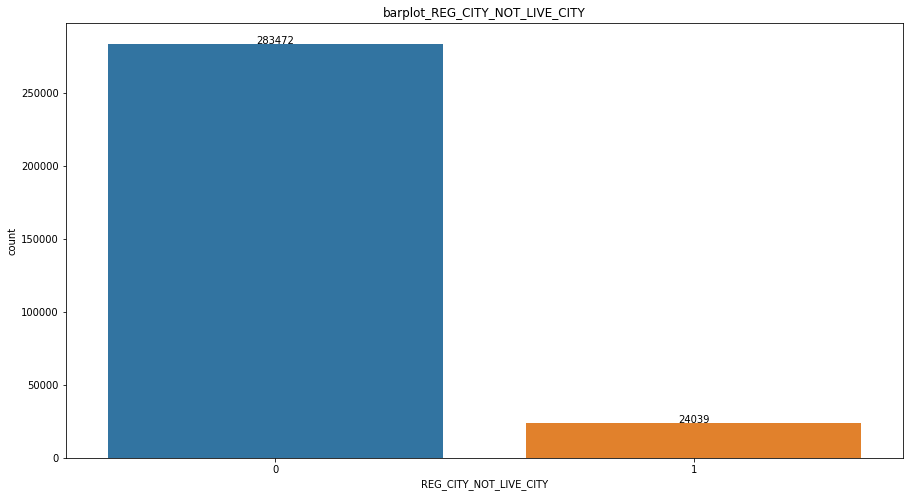

In [ ]:
visual_categorical(app_data, 'REG_CITY_NOT_LIVE_CITY', just_count=True)

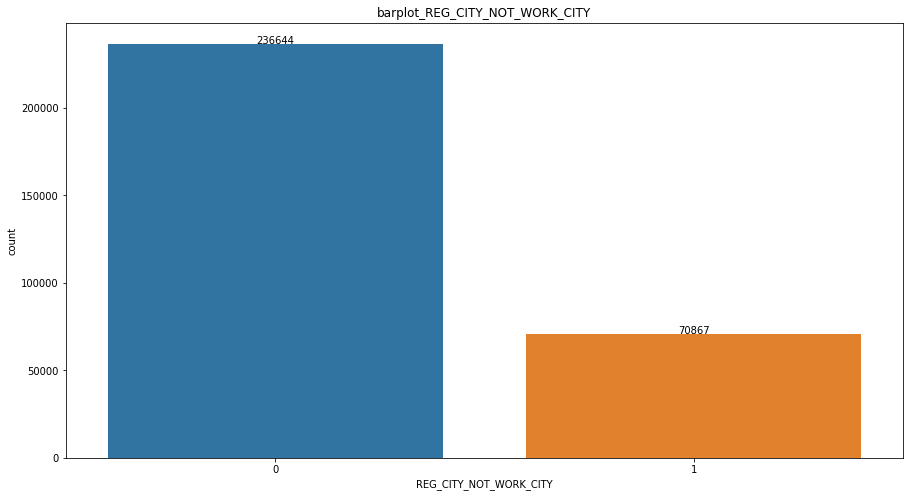

In [ ]:
visual_categorical(app_data, 'REG_CITY_NOT_WORK_CITY', just_count=True)

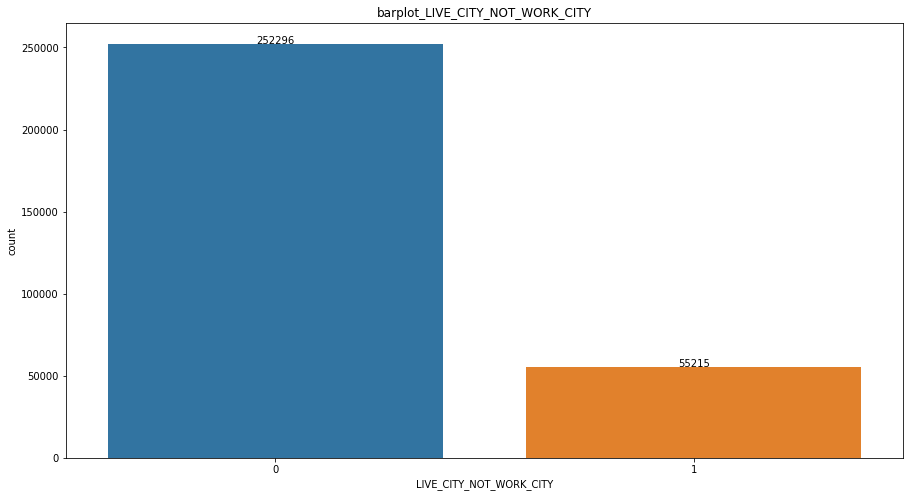

In [ ]:
visual_categorical(app_data, 'LIVE_CITY_NOT_WORK_CITY', just_count=True)

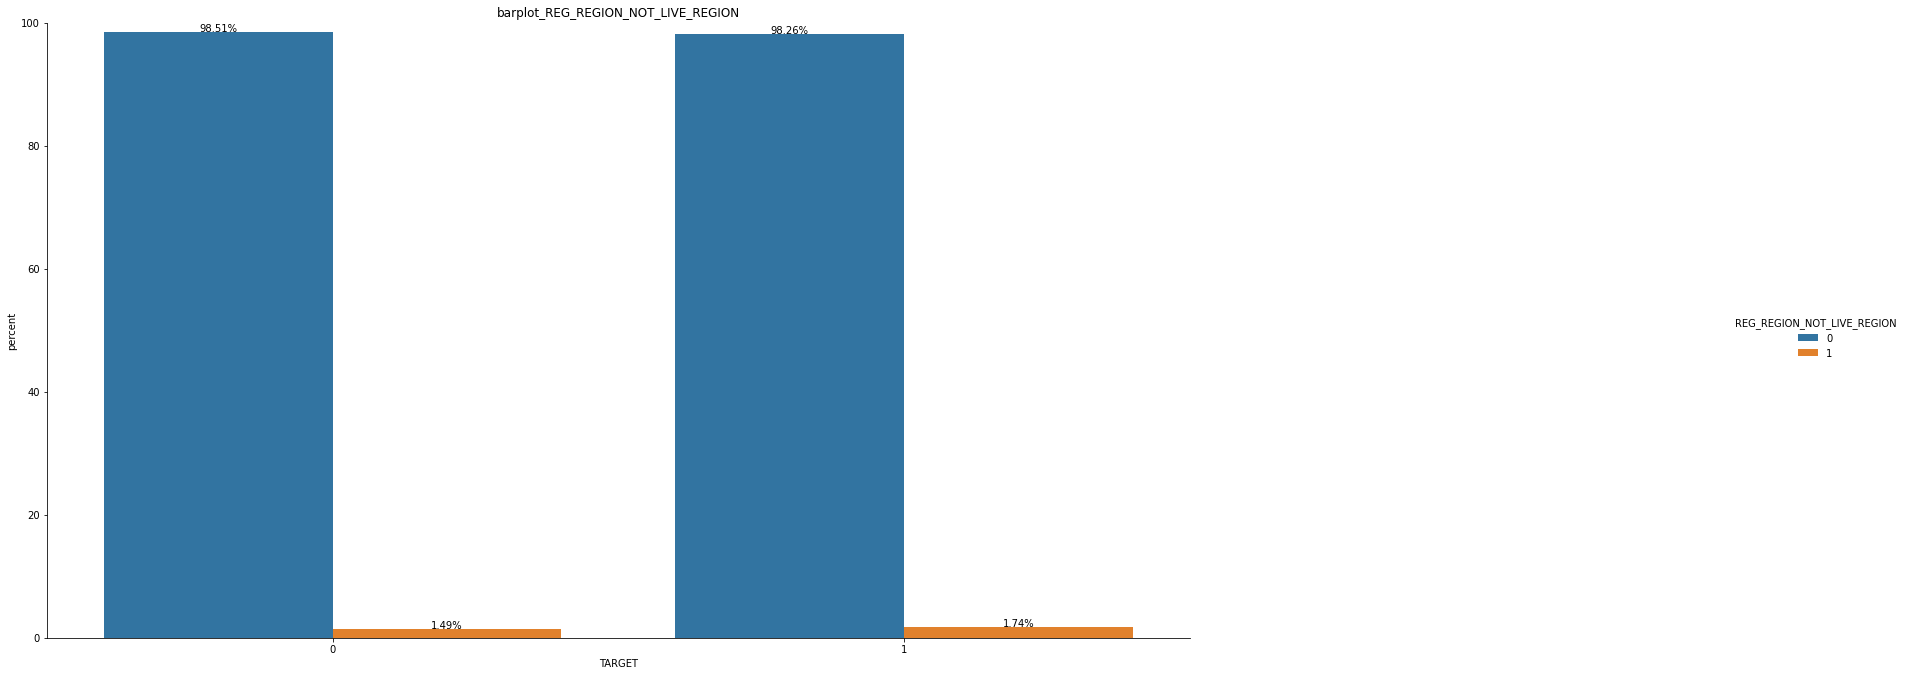

In [ ]:
visual_categorical(app_data, 'REG_REGION_NOT_LIVE_REGION', norm=True, reverse=True)

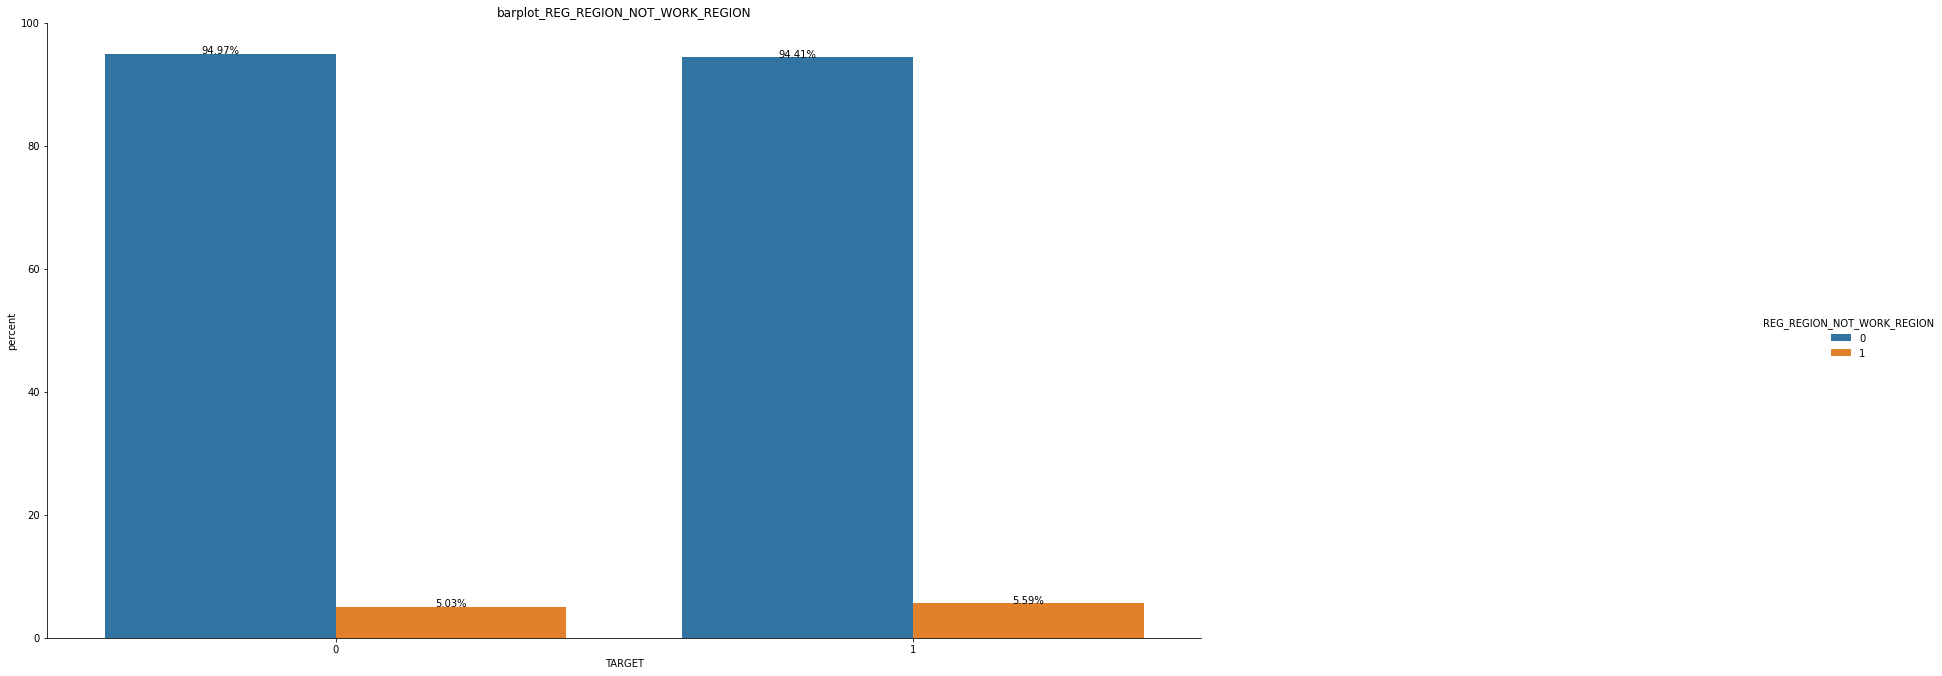

In [ ]:
visual_categorical(app_data, 'REG_REGION_NOT_WORK_REGION', norm=True, reverse=True)

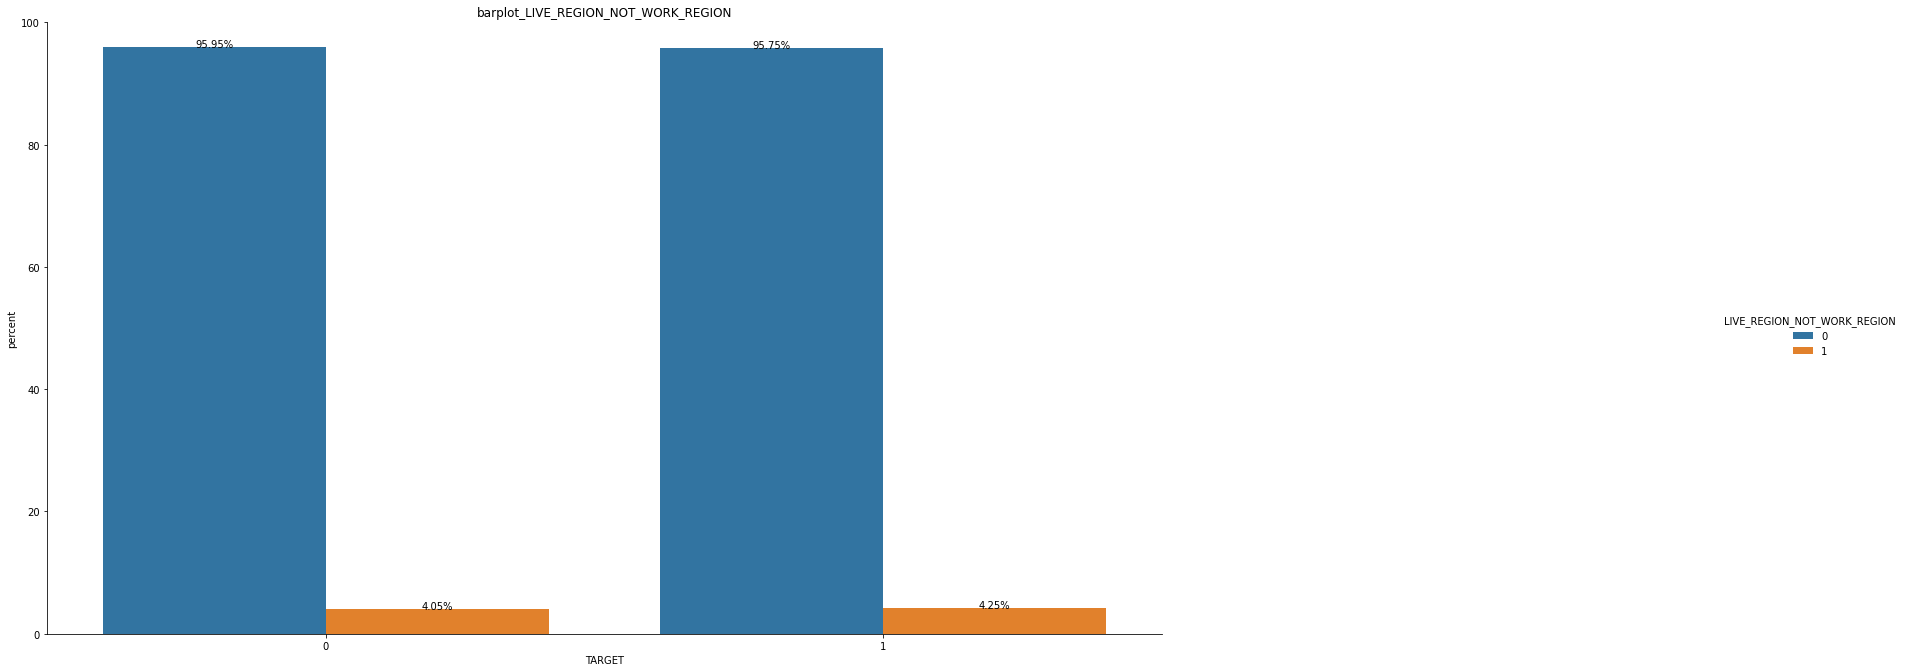

In [ ]:
visual_categorical(app_data, 'LIVE_REGION_NOT_WORK_REGION', norm=True, reverse=True)

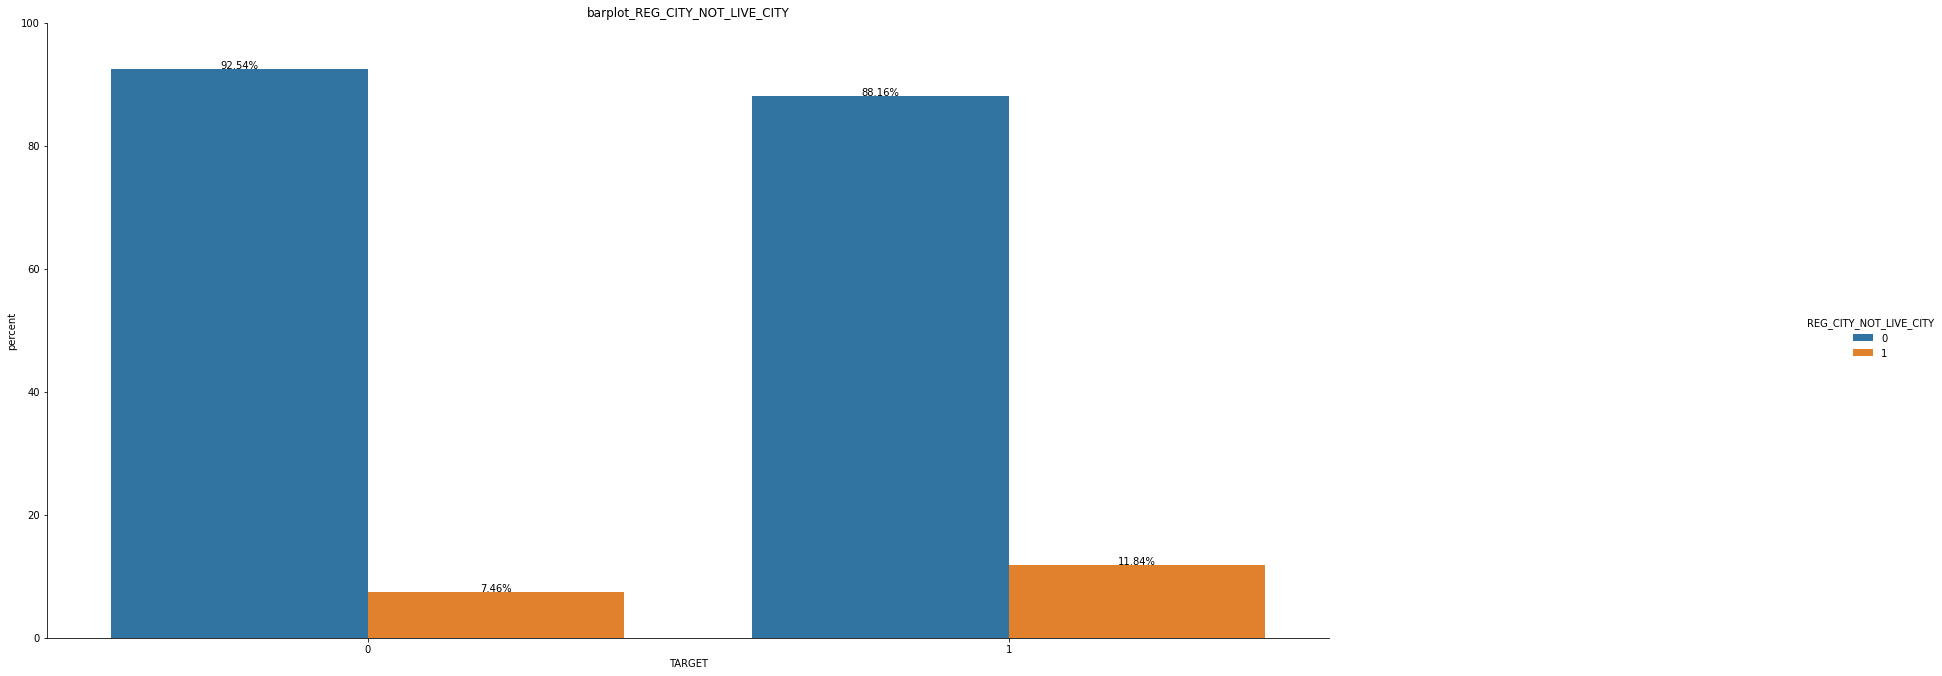

In [ ]:
visual_categorical(app_data, 'REG_CITY_NOT_LIVE_CITY', norm=True, reverse=True)

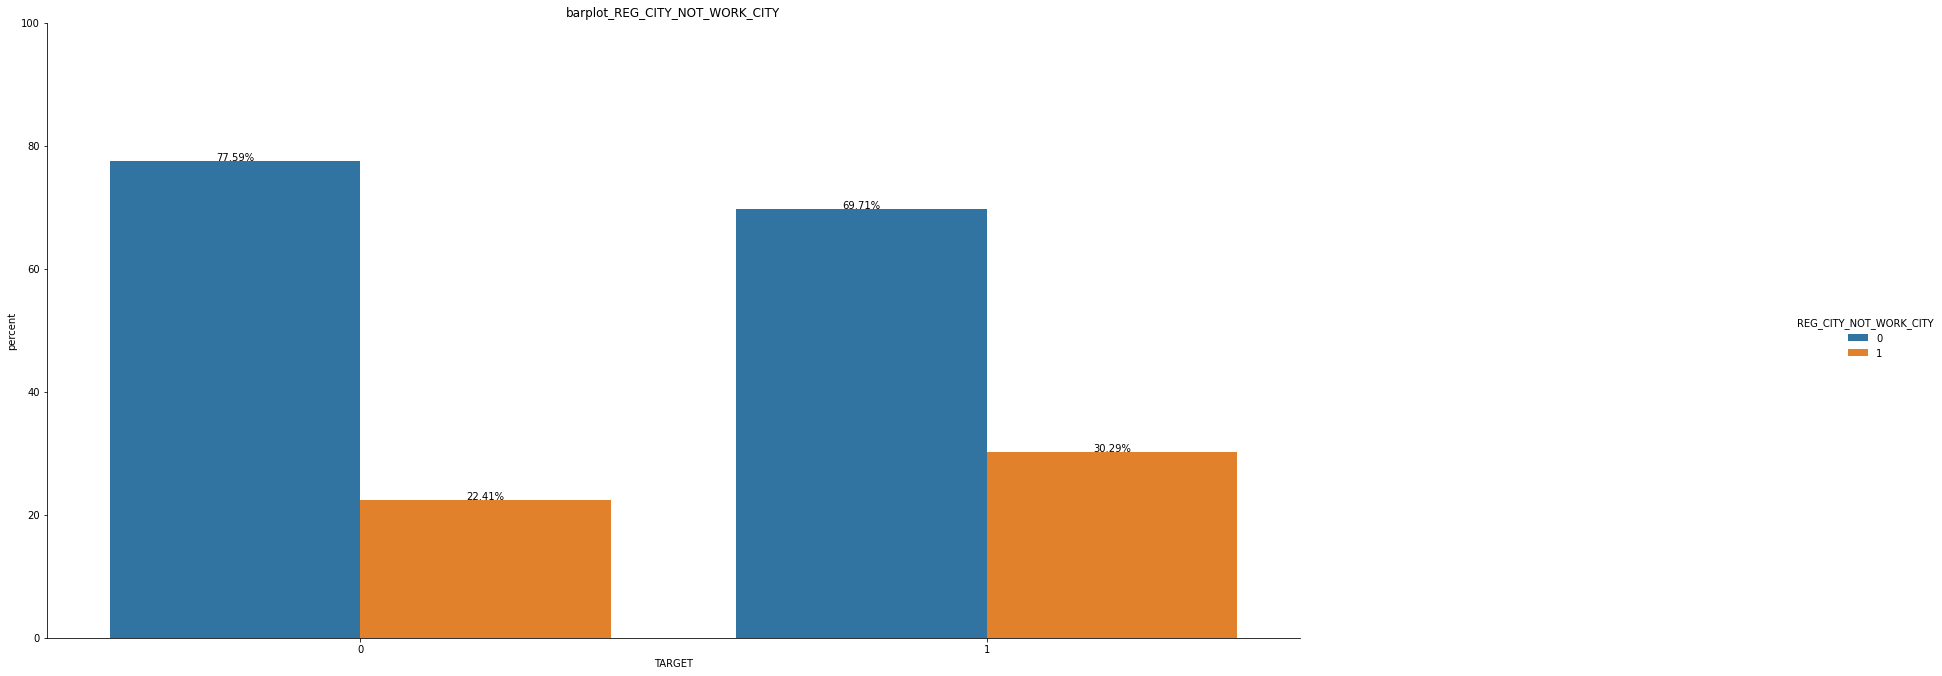

In [ ]:
visual_categorical(app_data, 'REG_CITY_NOT_WORK_CITY', norm=True, reverse=True)

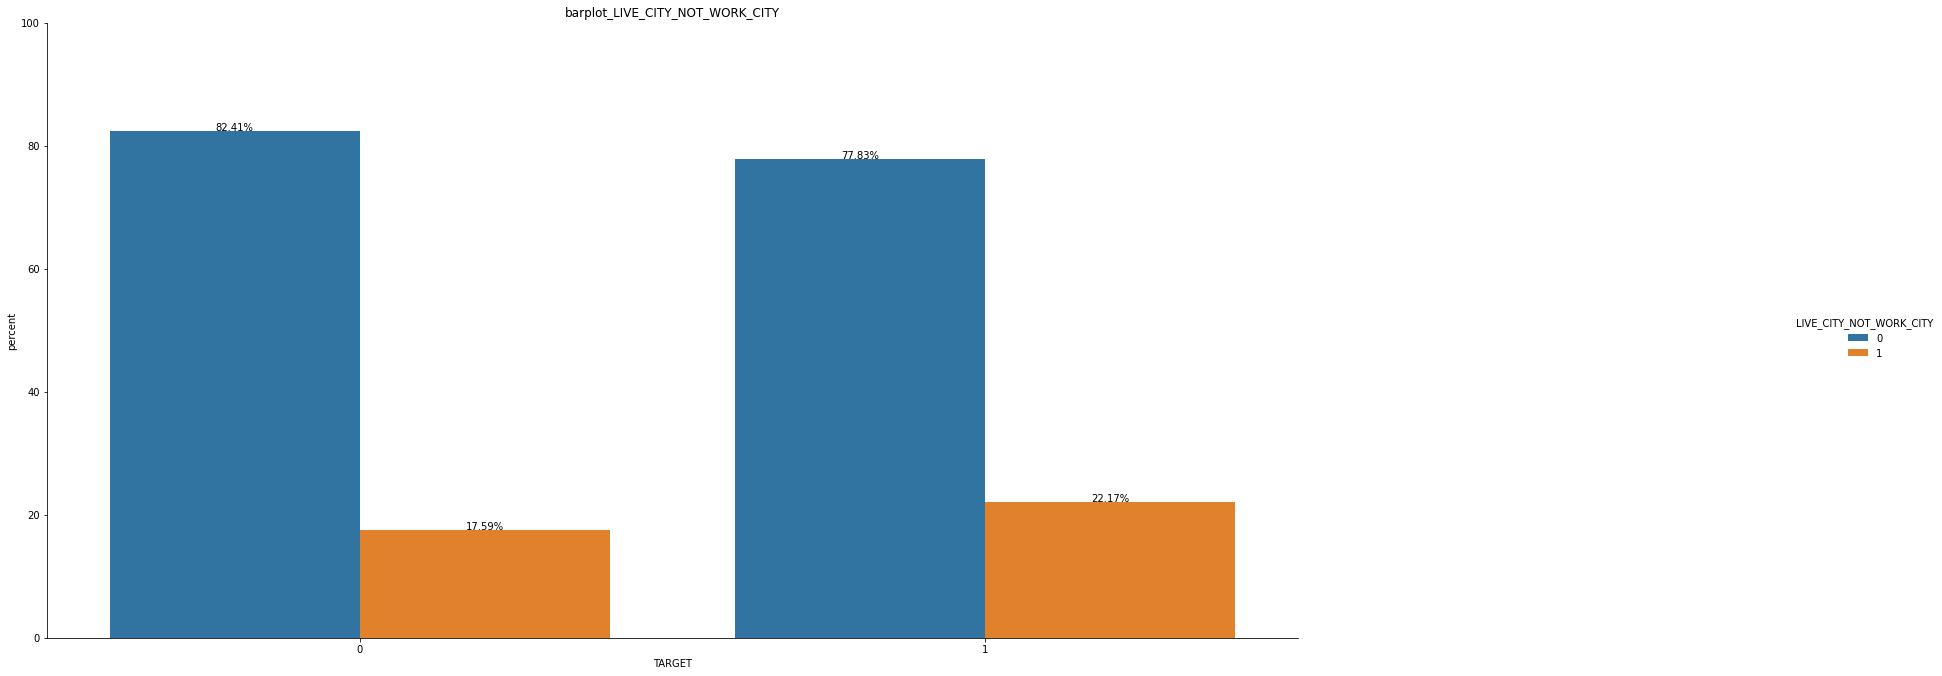

In [ ]:
visual_categorical(app_data, 'LIVE_CITY_NOT_WORK_CITY', norm=True, reverse=True)

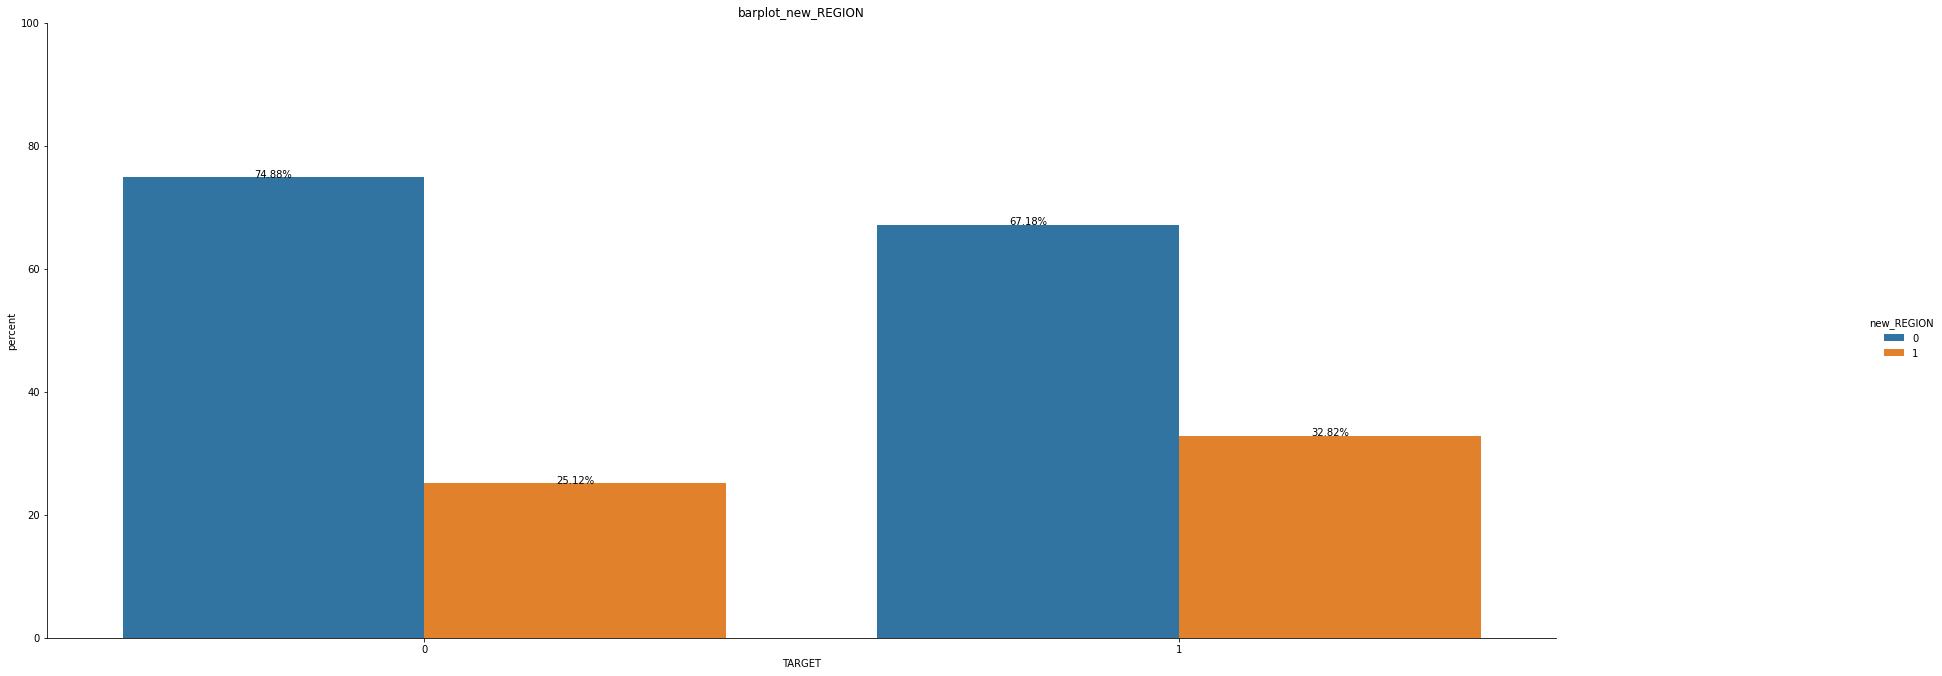

In [ ]:
visual_categorical(app_data, 'new_REGION', norm=True, reverse=True)

## NAME_CONTRACT_TYPE

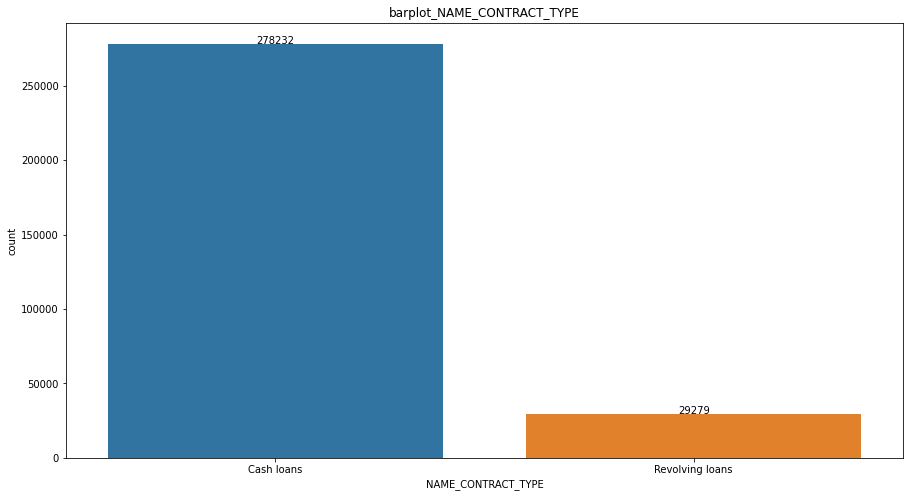

In [ ]:
visual_categorical(app_data, 'NAME_CONTRACT_TYPE', just_count=True)

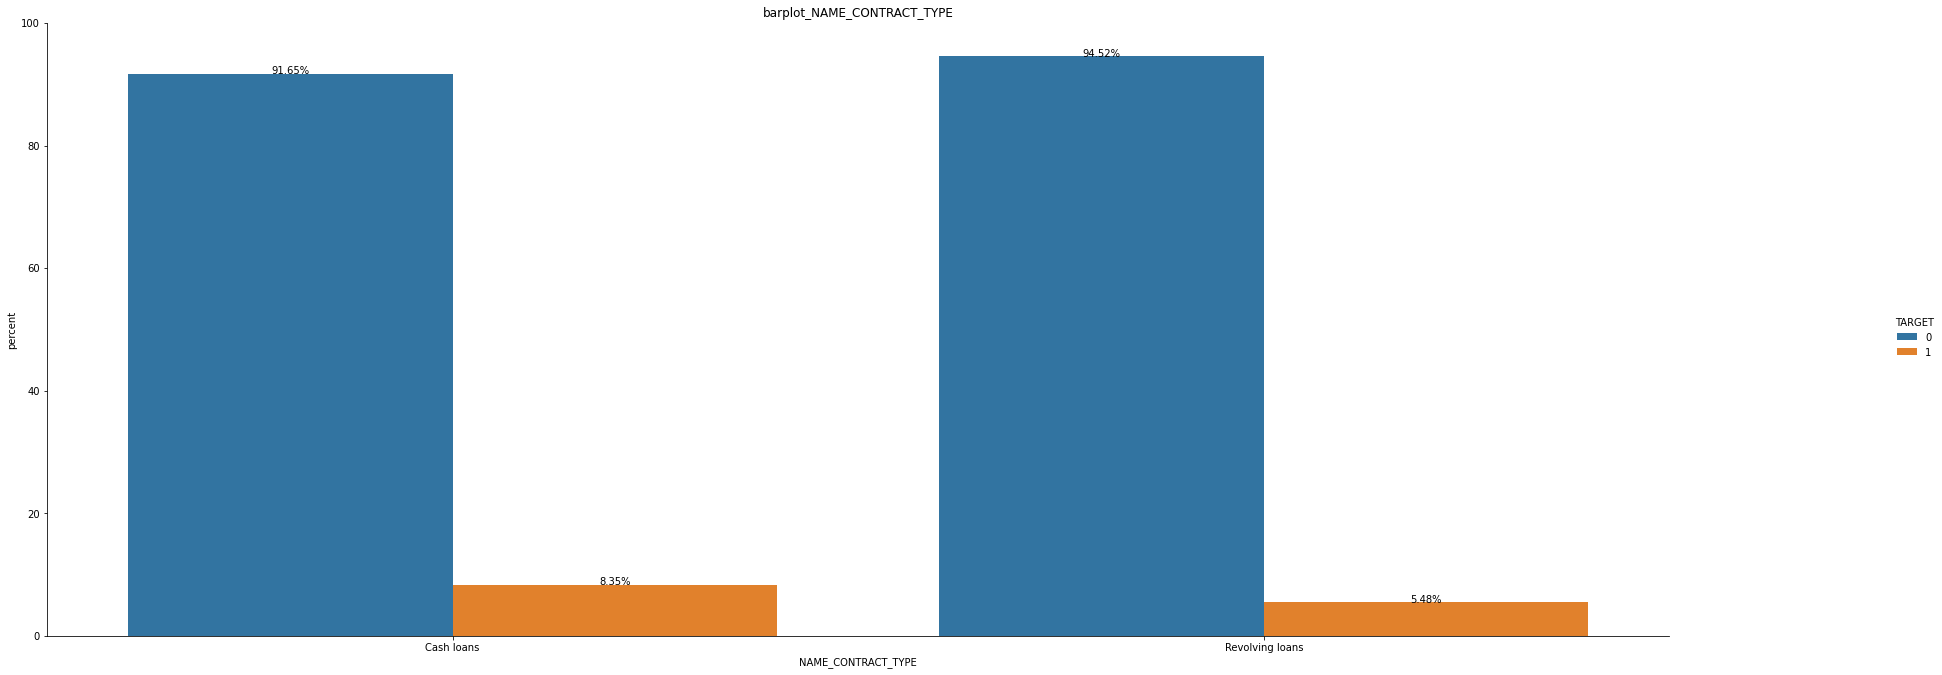

In [ ]:
visual_categorical(app_data, 'NAME_CONTRACT_TYPE', norm=True, reverse=False)

FLAG_MOBILE~EMAIL 과 같은이유로 제거

## EXT_SOURCE

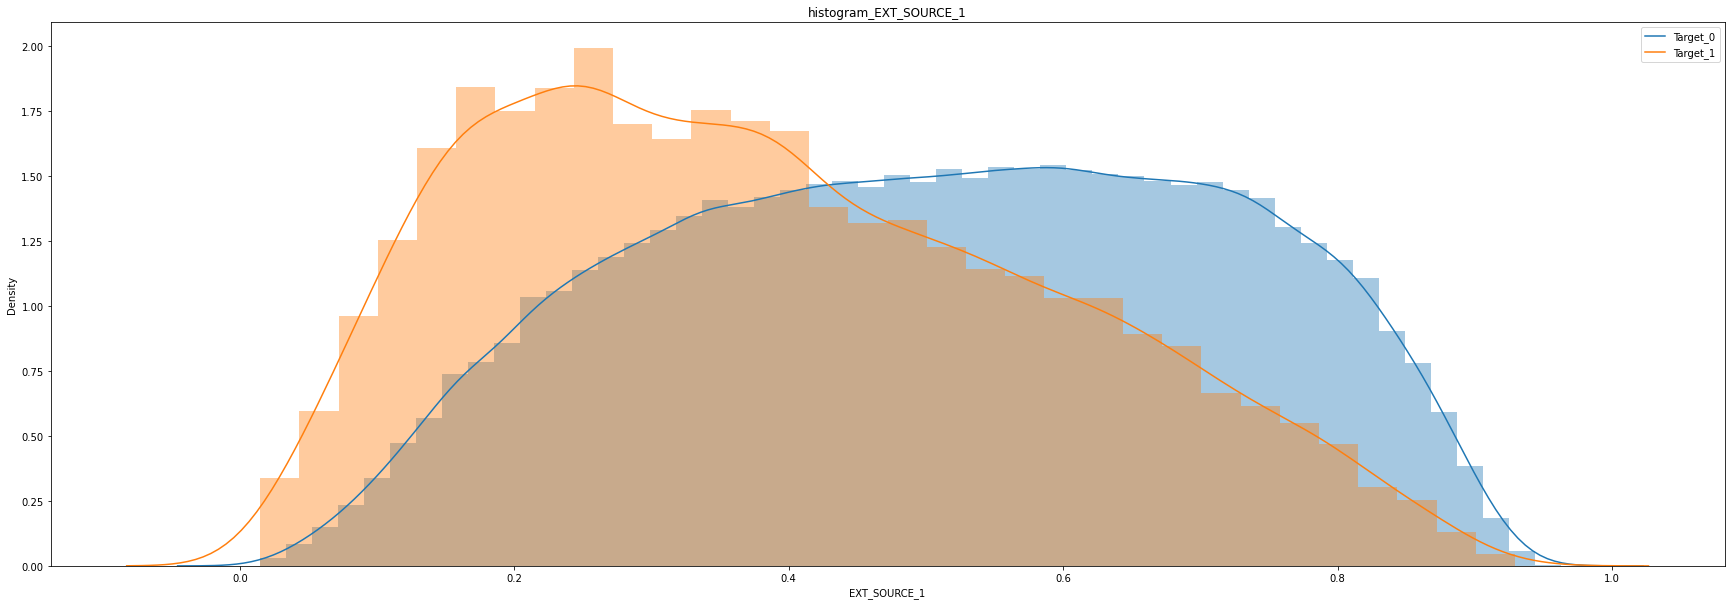

In [ ]:
visual_numerical(app_data, 'EXT_SOURCE_1')

In [ ]:
null_percentage['EXT_SOURCE_1'] # 결측치 비율

56.38

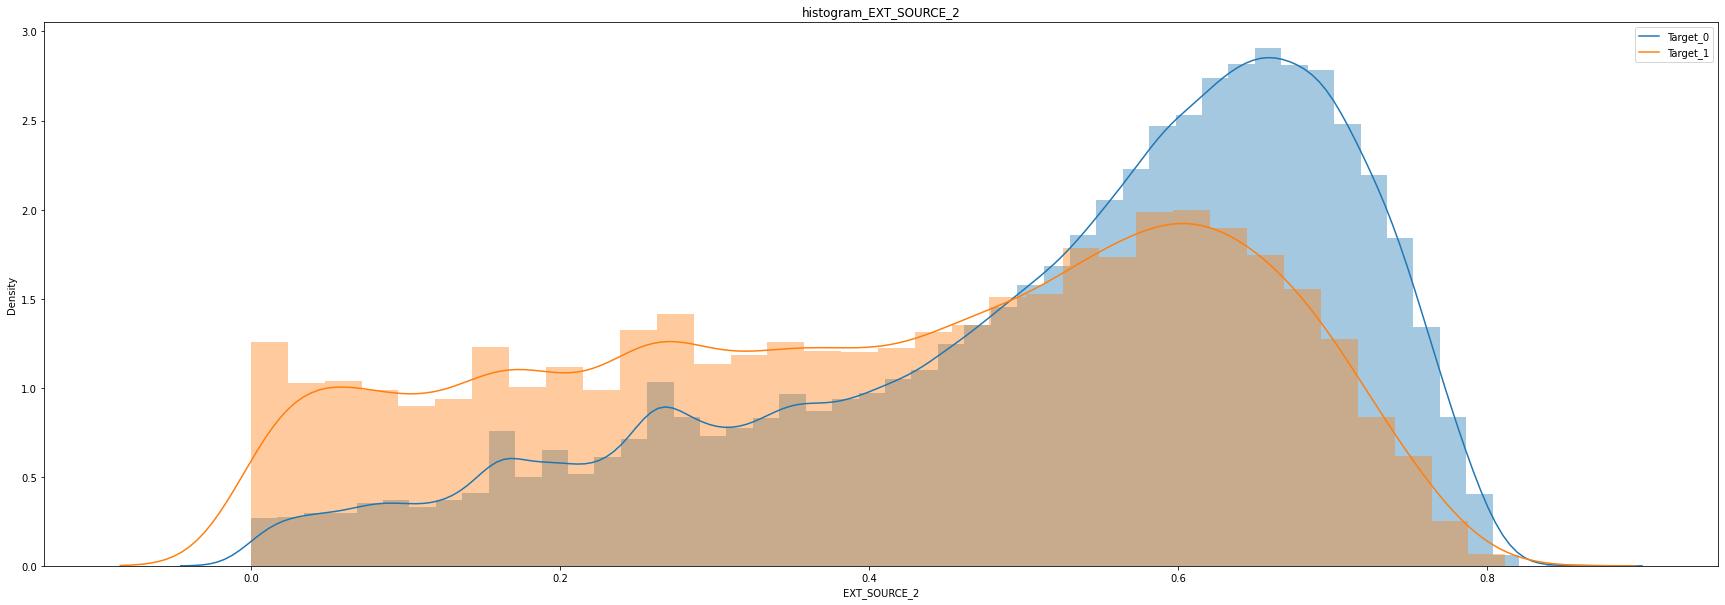

In [ ]:
visual_numerical(app_data, 'EXT_SOURCE_2')

In [ ]:
null_percentage['EXT_SOURCE_2'] # 결측치 비율

0.21

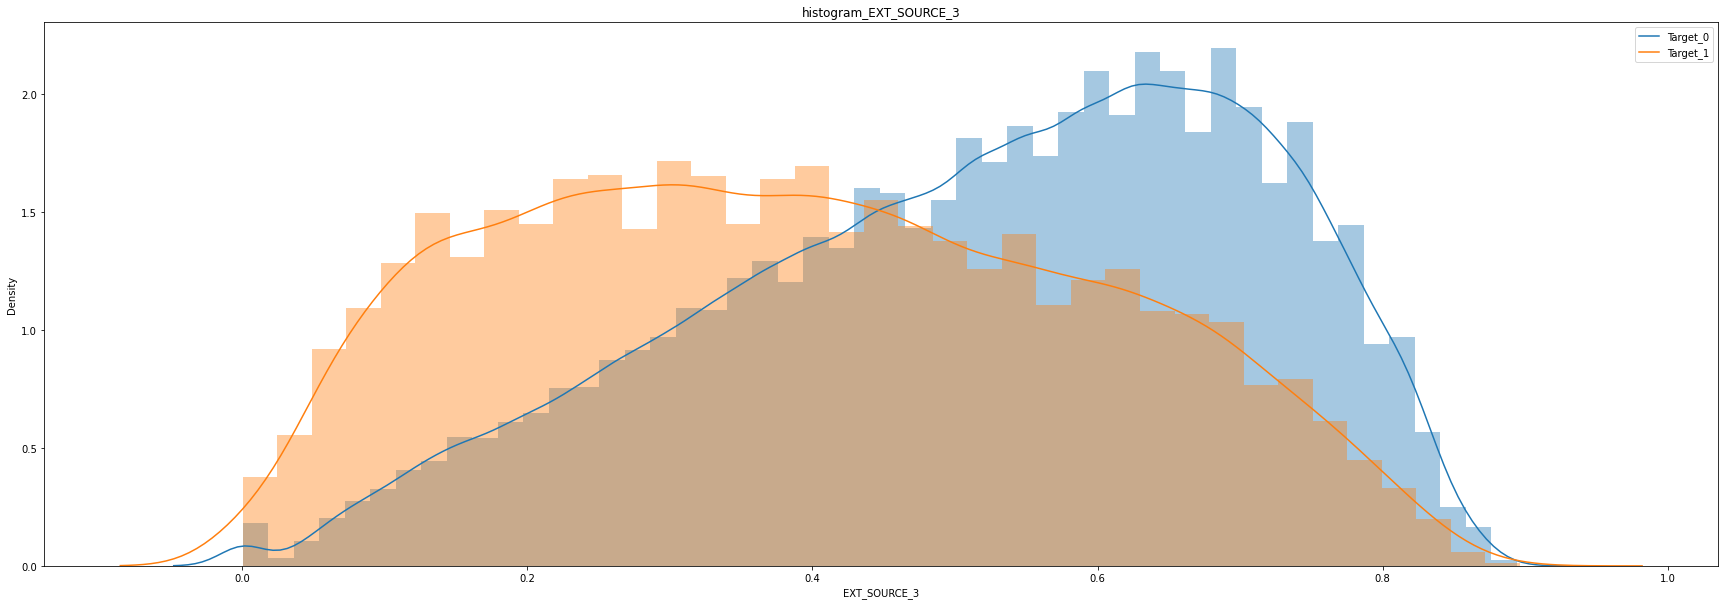

In [ ]:
visual_numerical(app_data, 'EXT_SOURCE_3')

In [ ]:
null_percentage['EXT_SOURCE_3'] # 결측치 비율

19.83

EXT_SOURCE 값에 따라 다른 TARGET 분포가 확인됨

## 자산 관련 변수

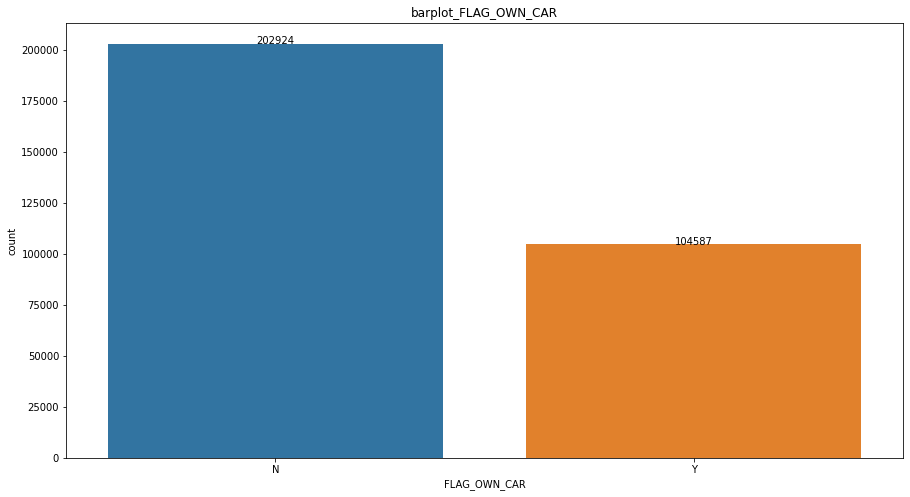

In [ ]:
visual_categorical(app_data, 'FLAG_OWN_CAR', just_count=True)

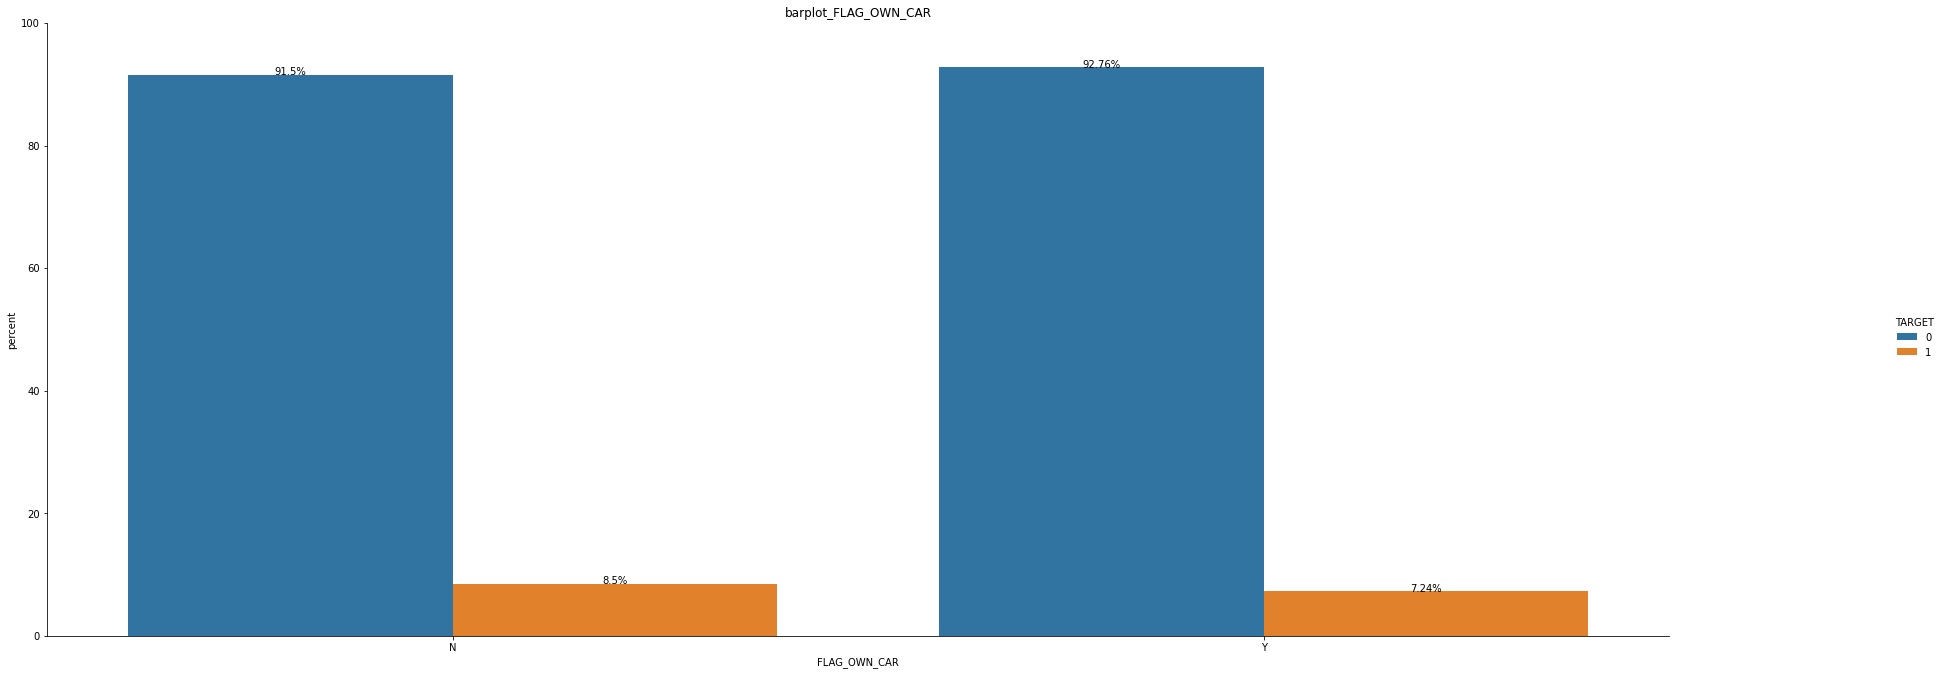

In [ ]:
visual_categorical(app_data, 'FLAG_OWN_CAR')

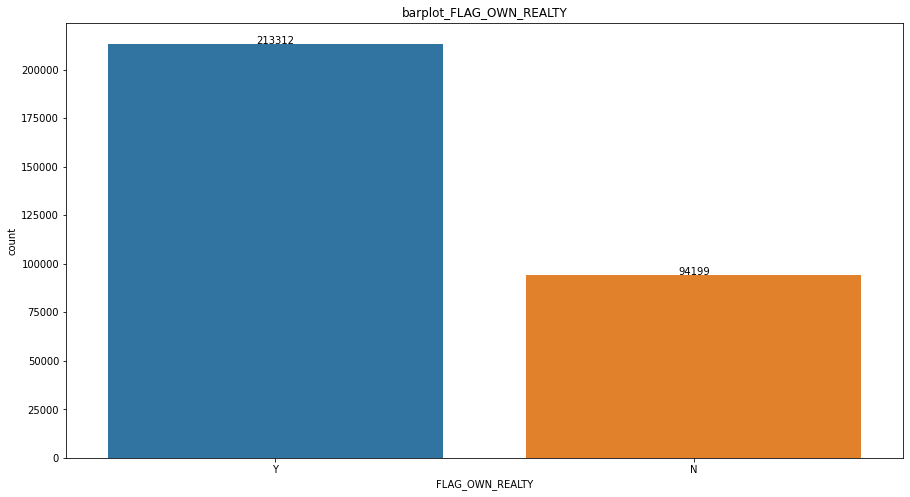

In [ ]:
visual_categorical(app_data, 'FLAG_OWN_REALTY', just_count=True)

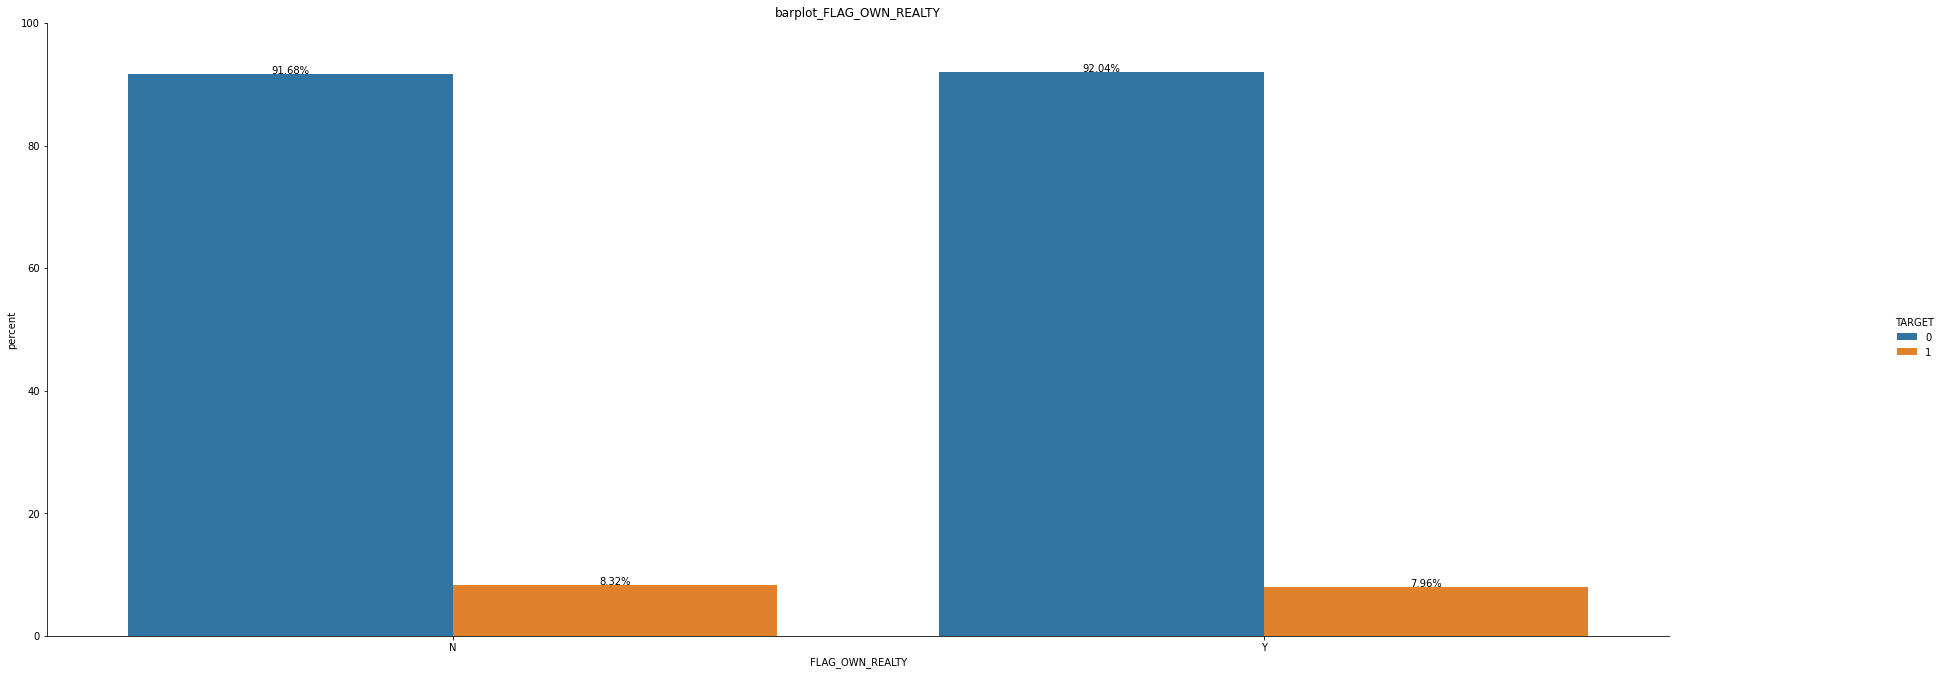

In [ ]:
visual_categorical(app_data, 'FLAG_OWN_REALTY')

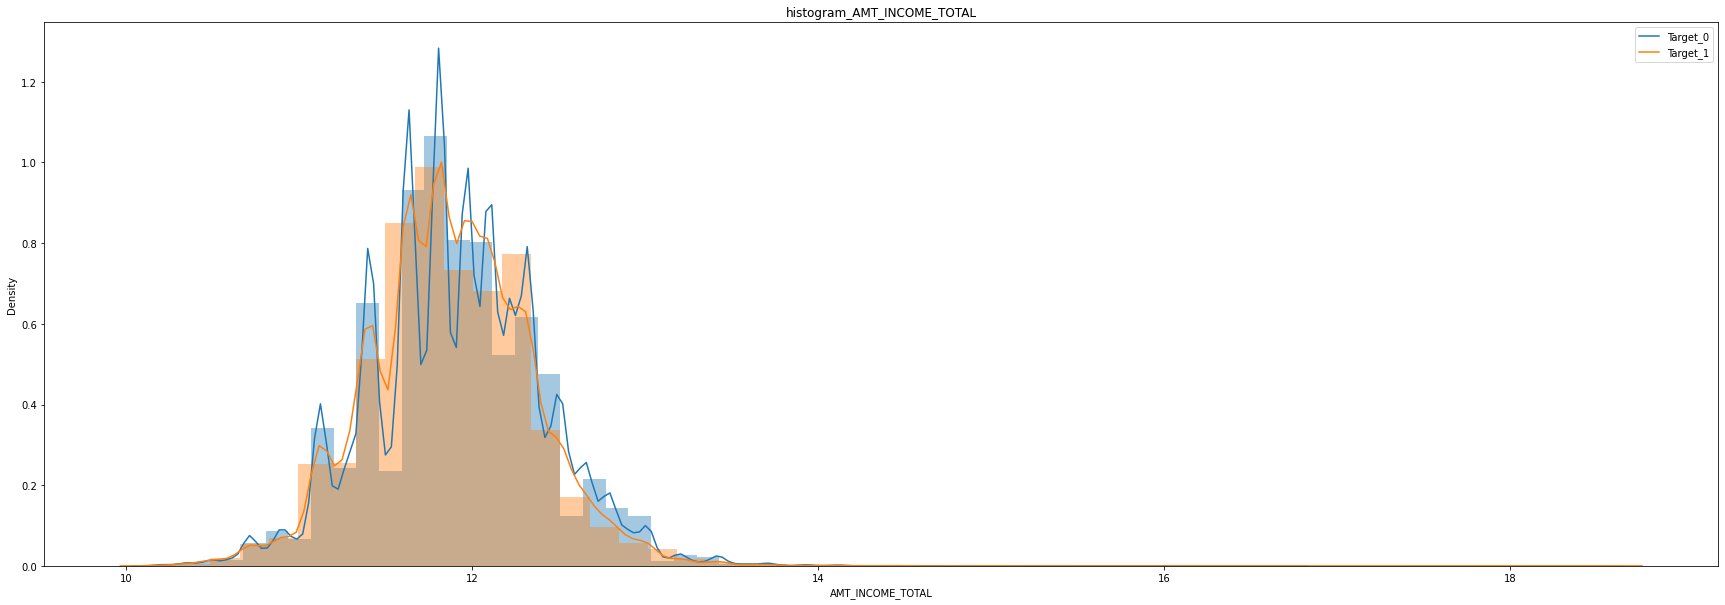

In [ ]:
visual_numerical(app_data, 'AMT_INCOME_TOTAL', log=True)

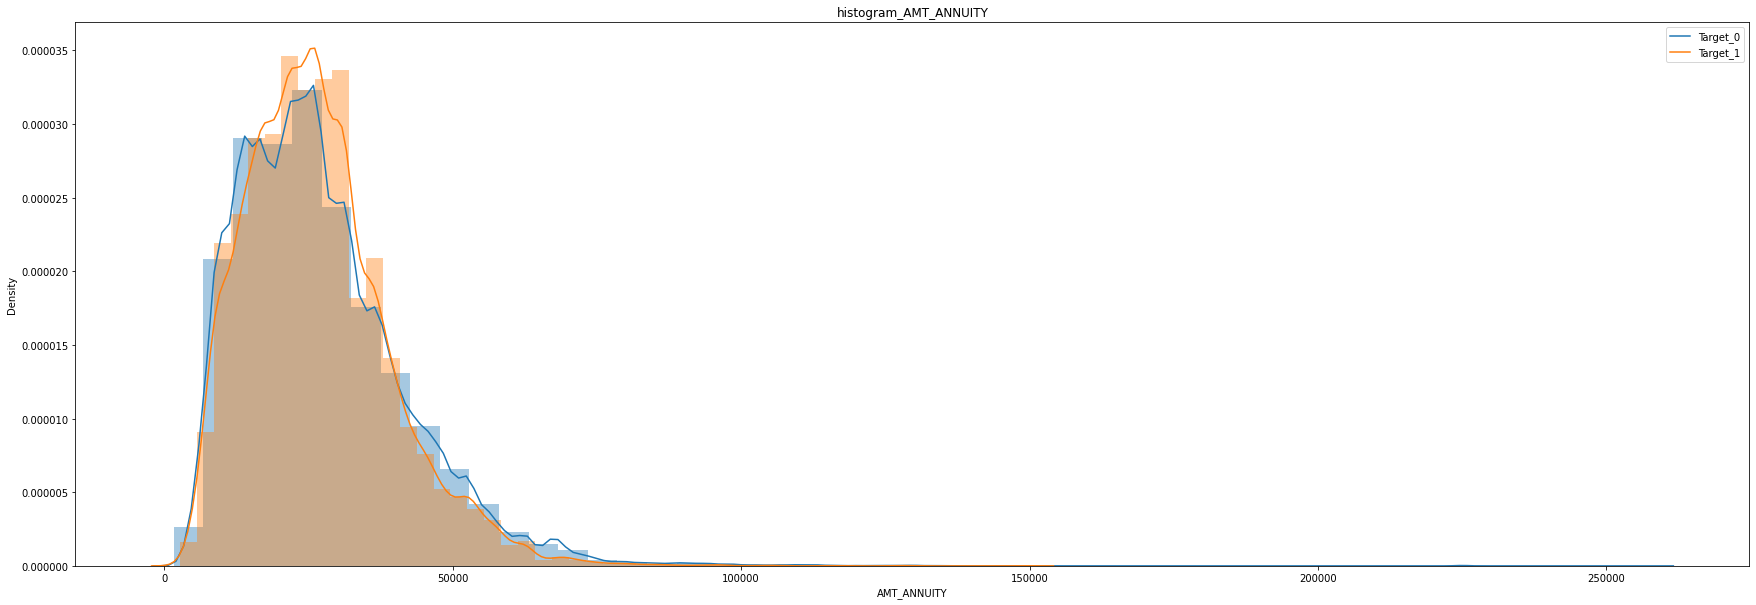

In [ ]:
visual_numerical(app_data, 'AMT_ANNUITY')

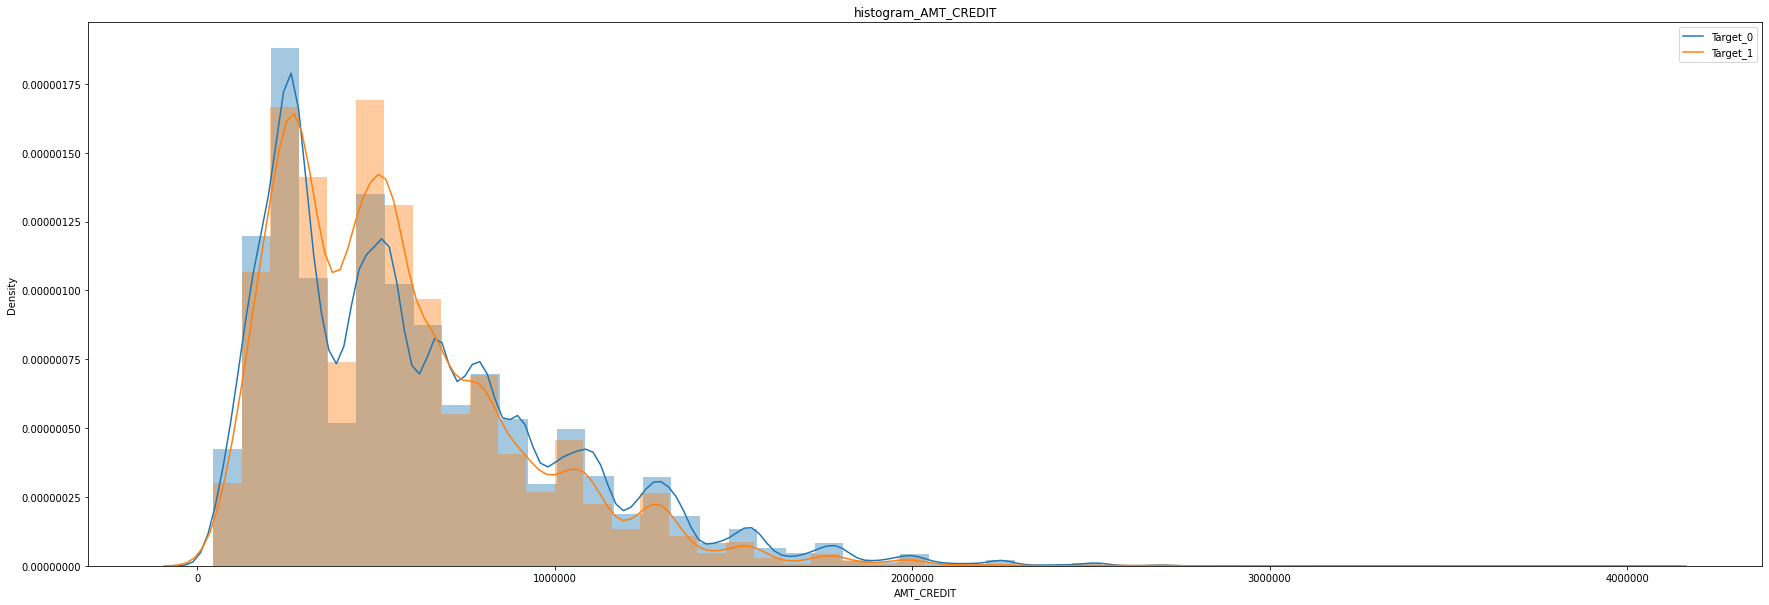

In [ ]:
visual_numerical(app_data, 'AMT_CREDIT')

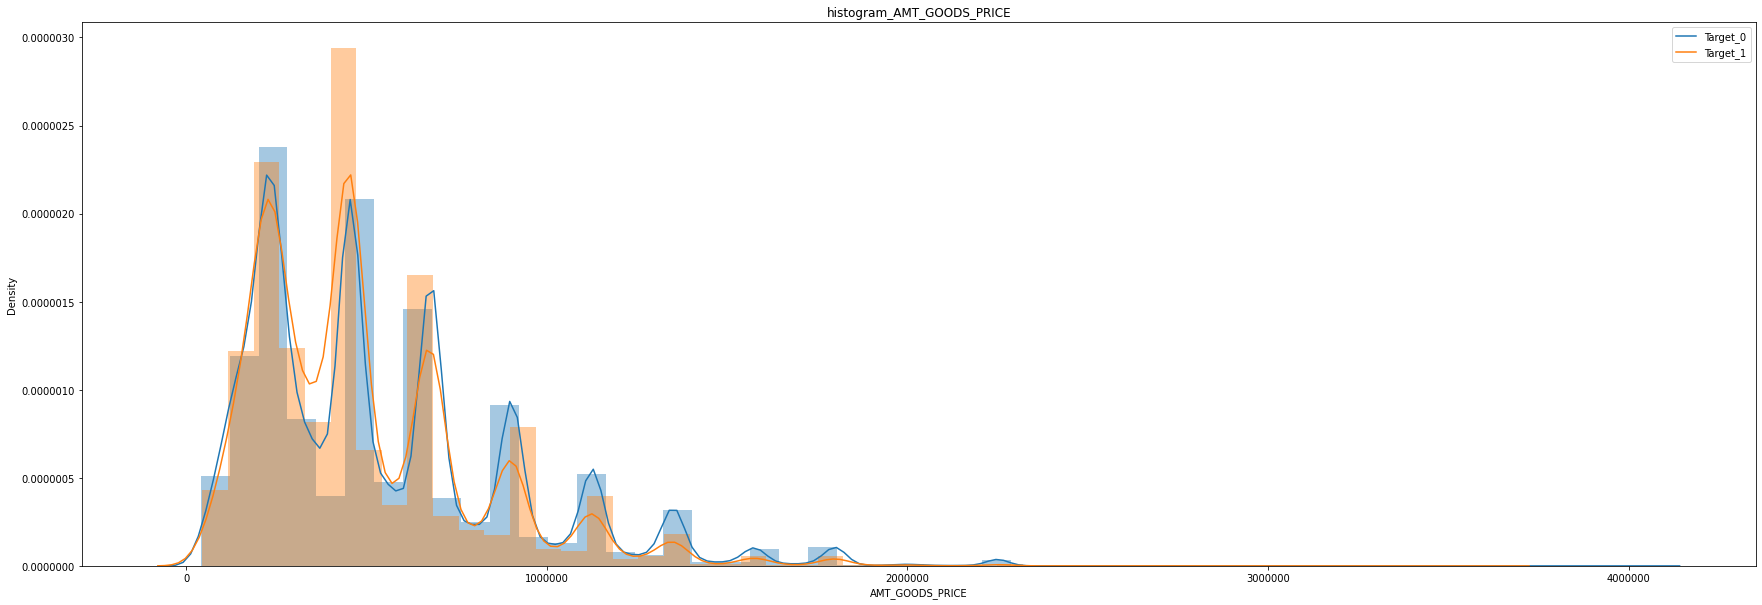

In [ ]:
visual_numerical(app_data, 'AMT_GOODS_PRICE')

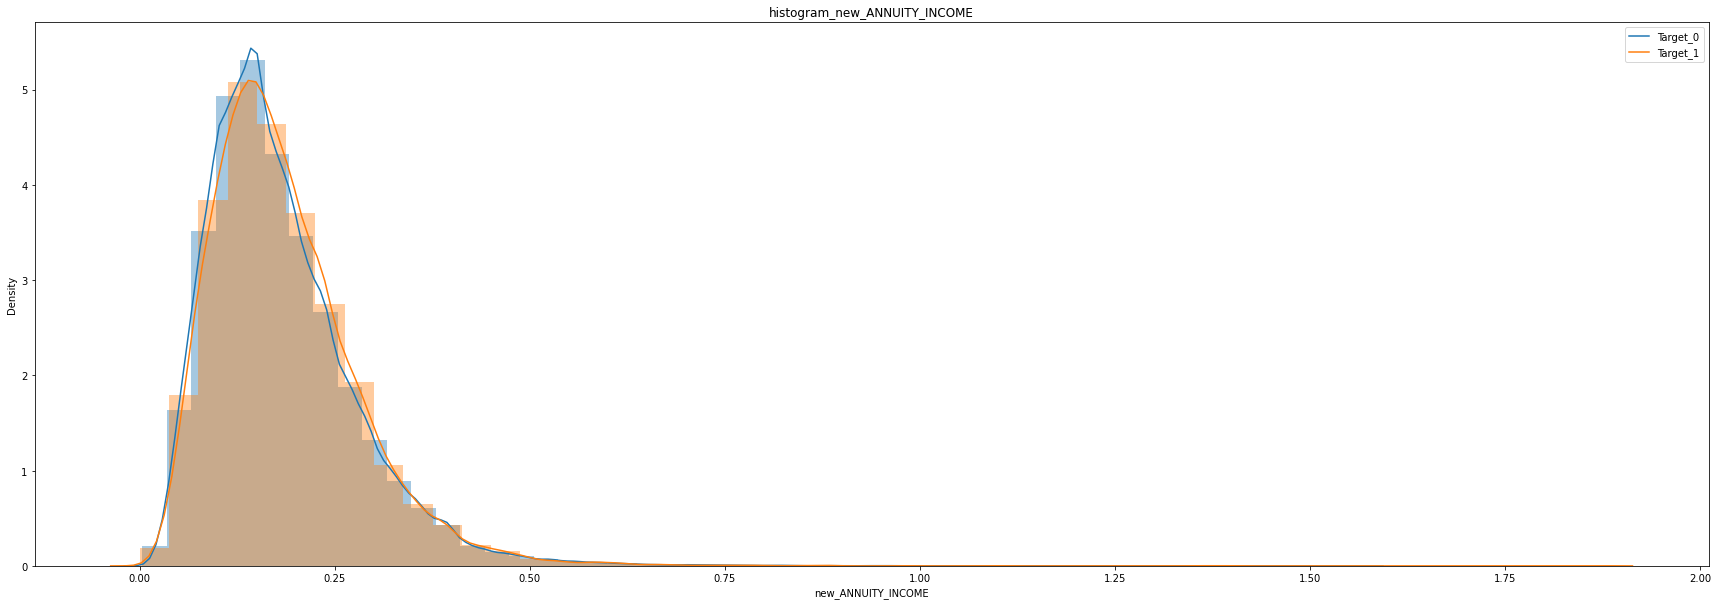

In [ ]:
visual_numerical(app_data, 'new_ANNUITY_INCOME')

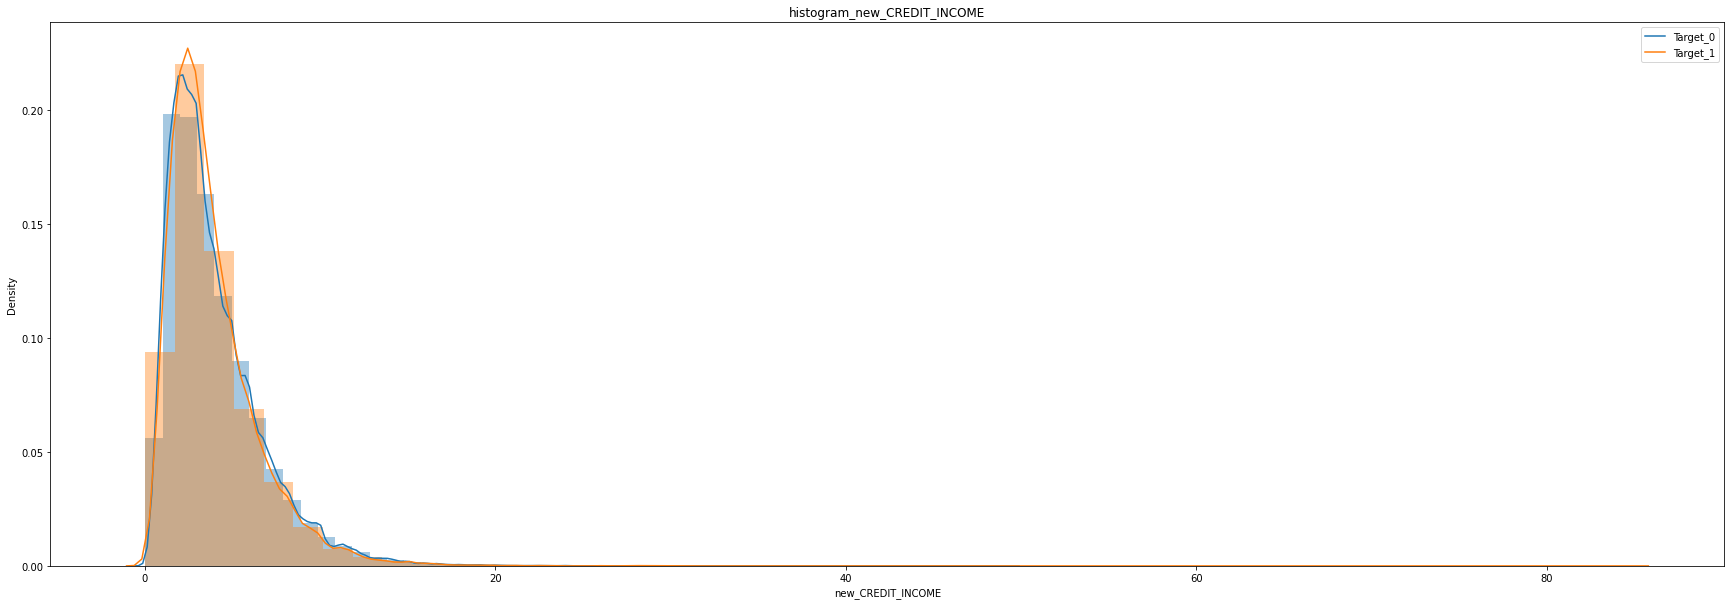

In [ ]:
visual_numerical(app_data, 'new_CREDIT_INCOME')

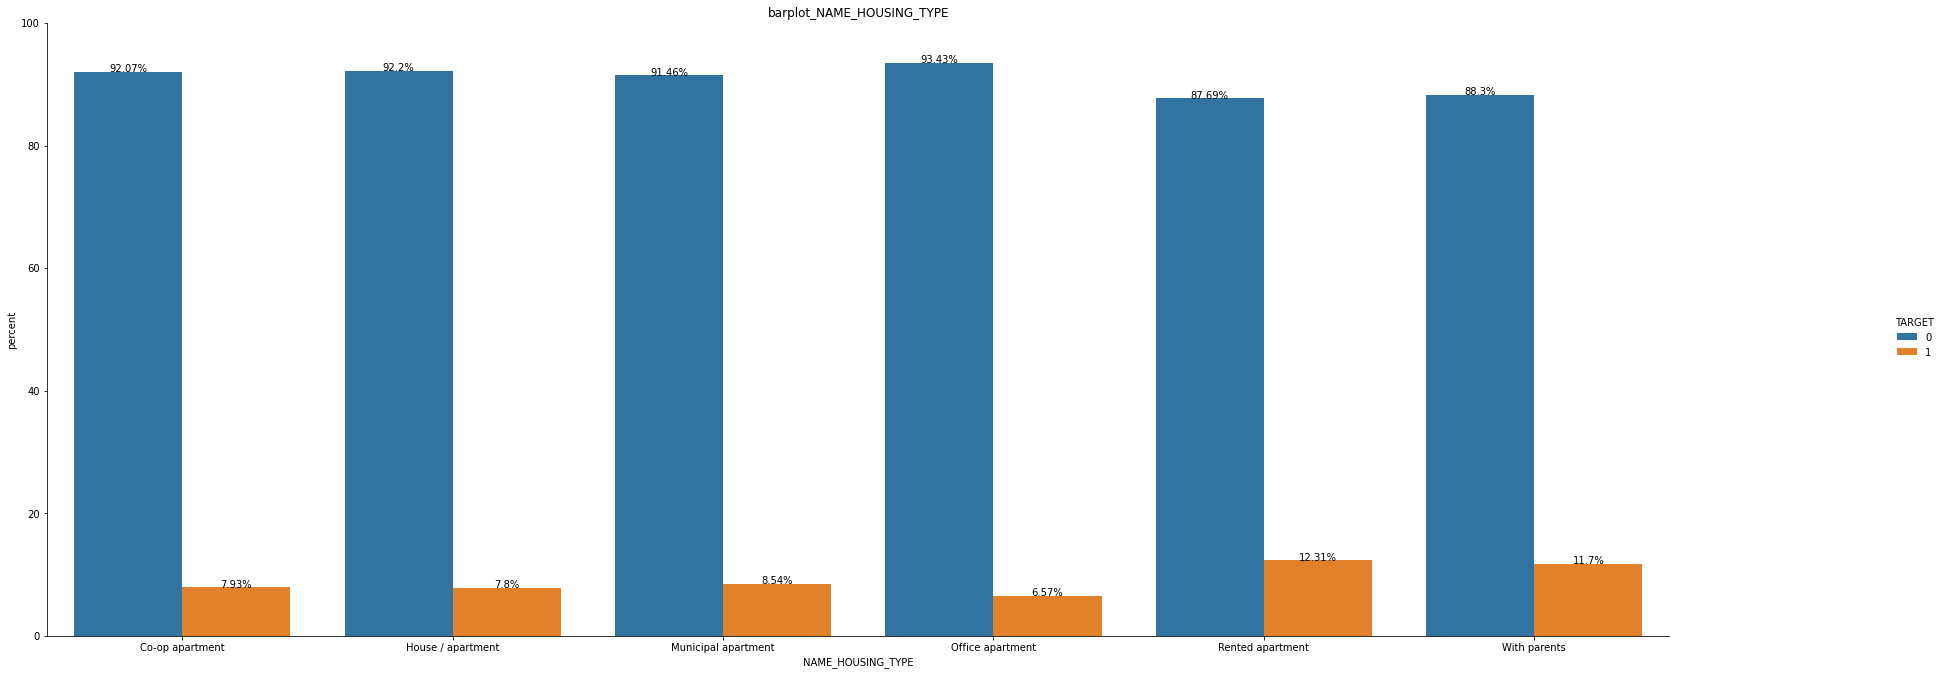

In [ ]:
visual_categorical(app_data, 'NAME_HOUSING_TYPE')

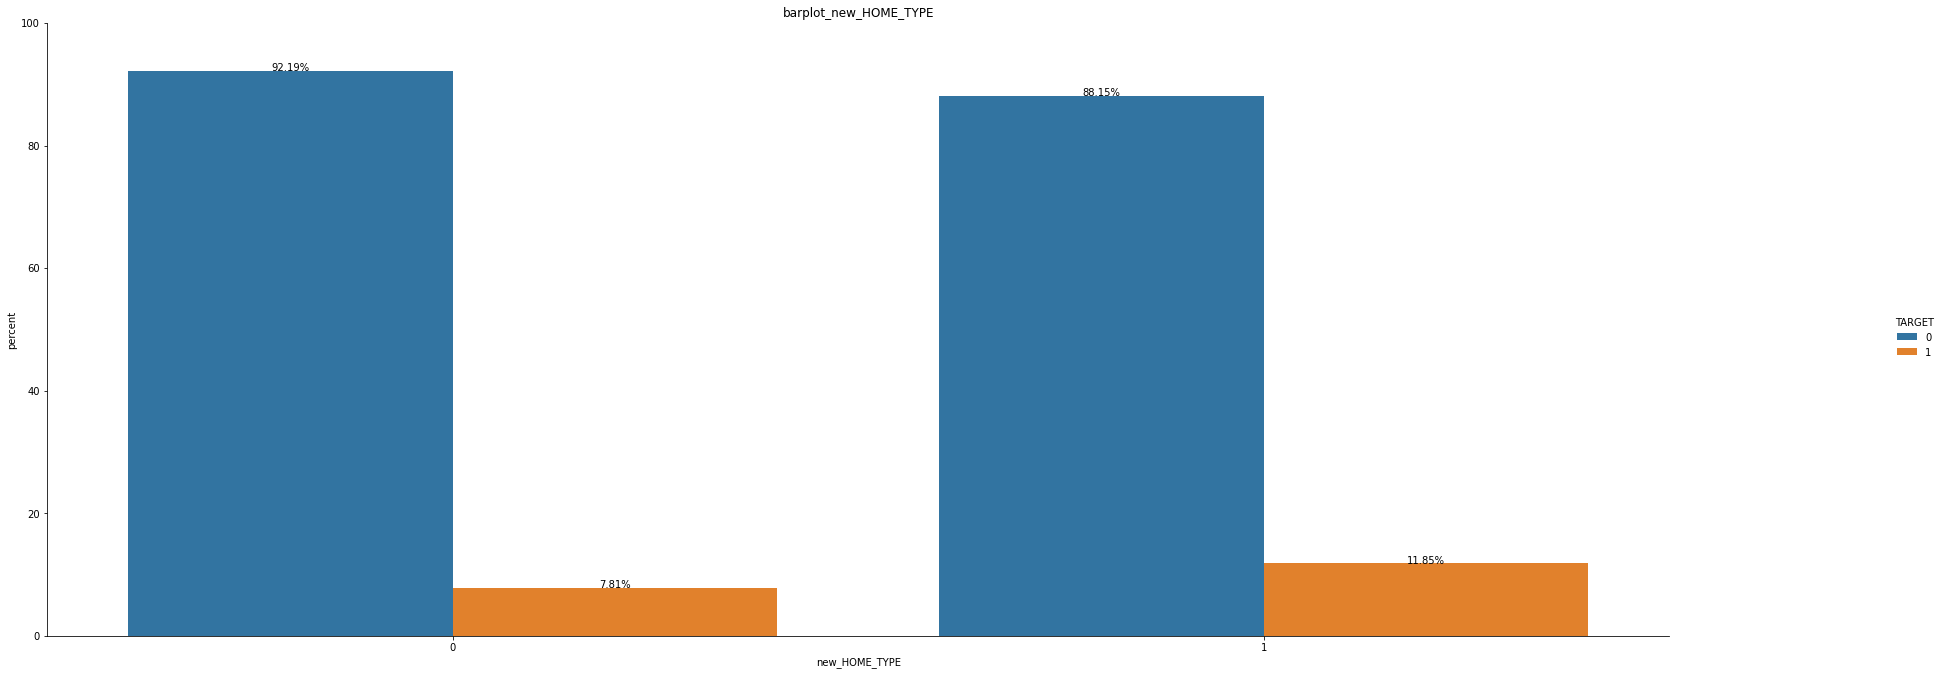

In [ ]:
visual_categorical(app_data, 'new_HOME_TYPE')

## 고객 관련 변수

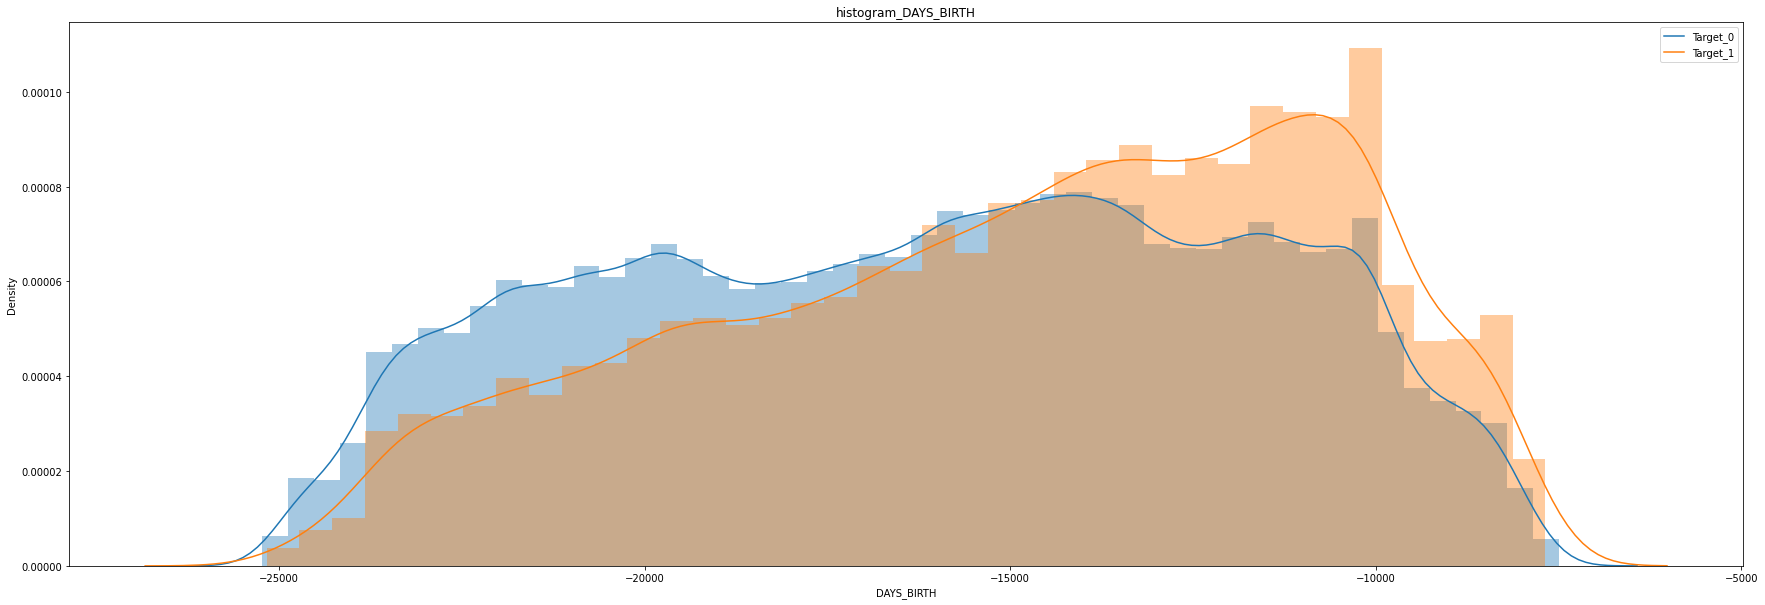

In [ ]:
visual_numerical(app_data, 'DAYS_BIRTH')

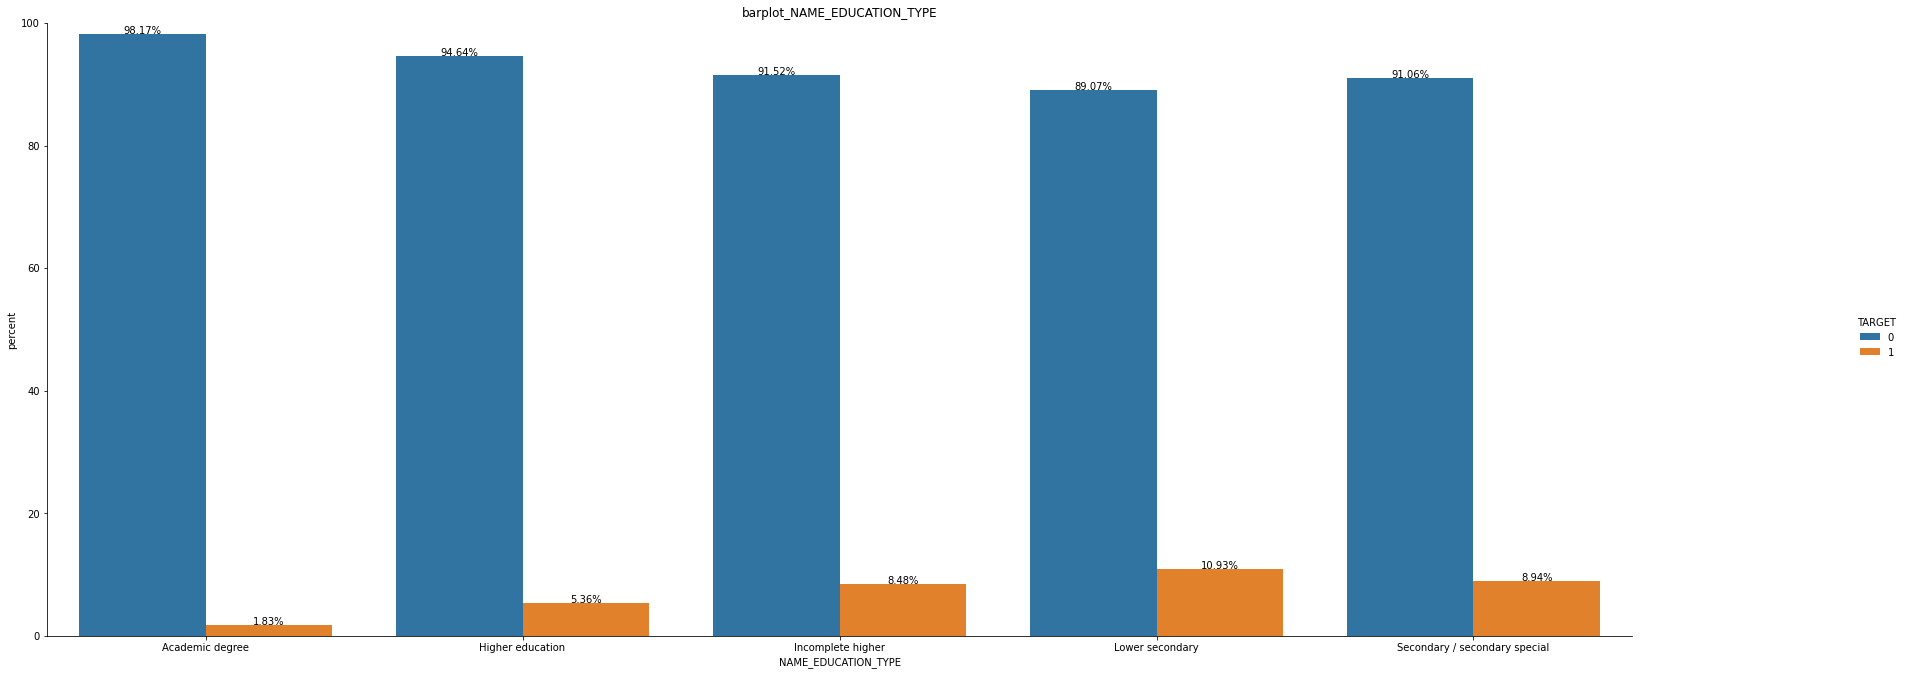

In [ ]:
visual_categorical(app_data, 'NAME_EDUCATION_TYPE')

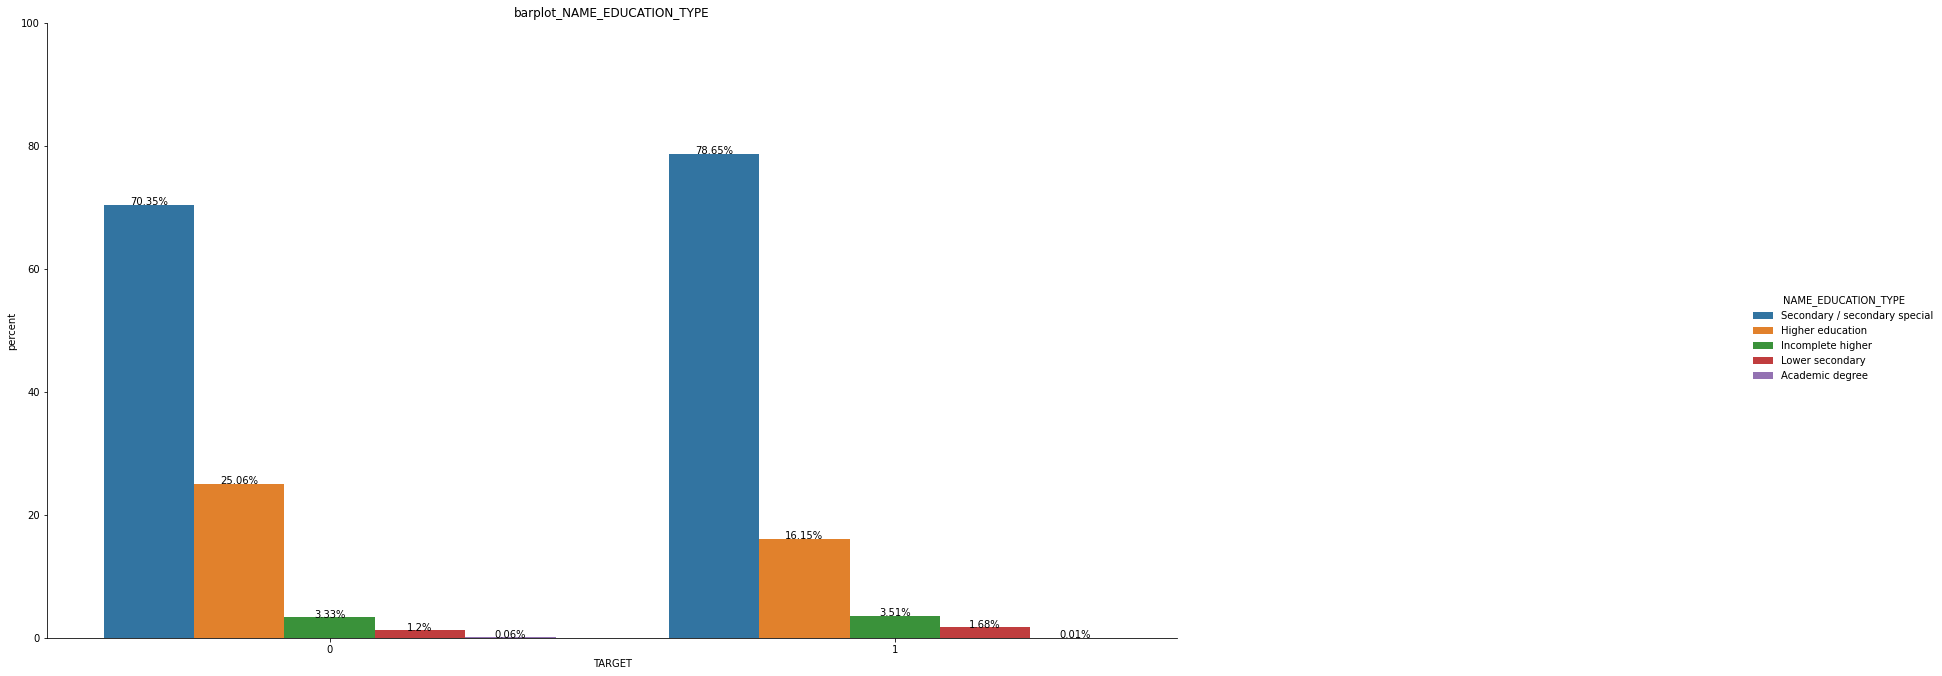

In [ ]:
visual_categorical(app_data, 'NAME_EDUCATION_TYPE', norm=True, reverse=True, just_count=False)

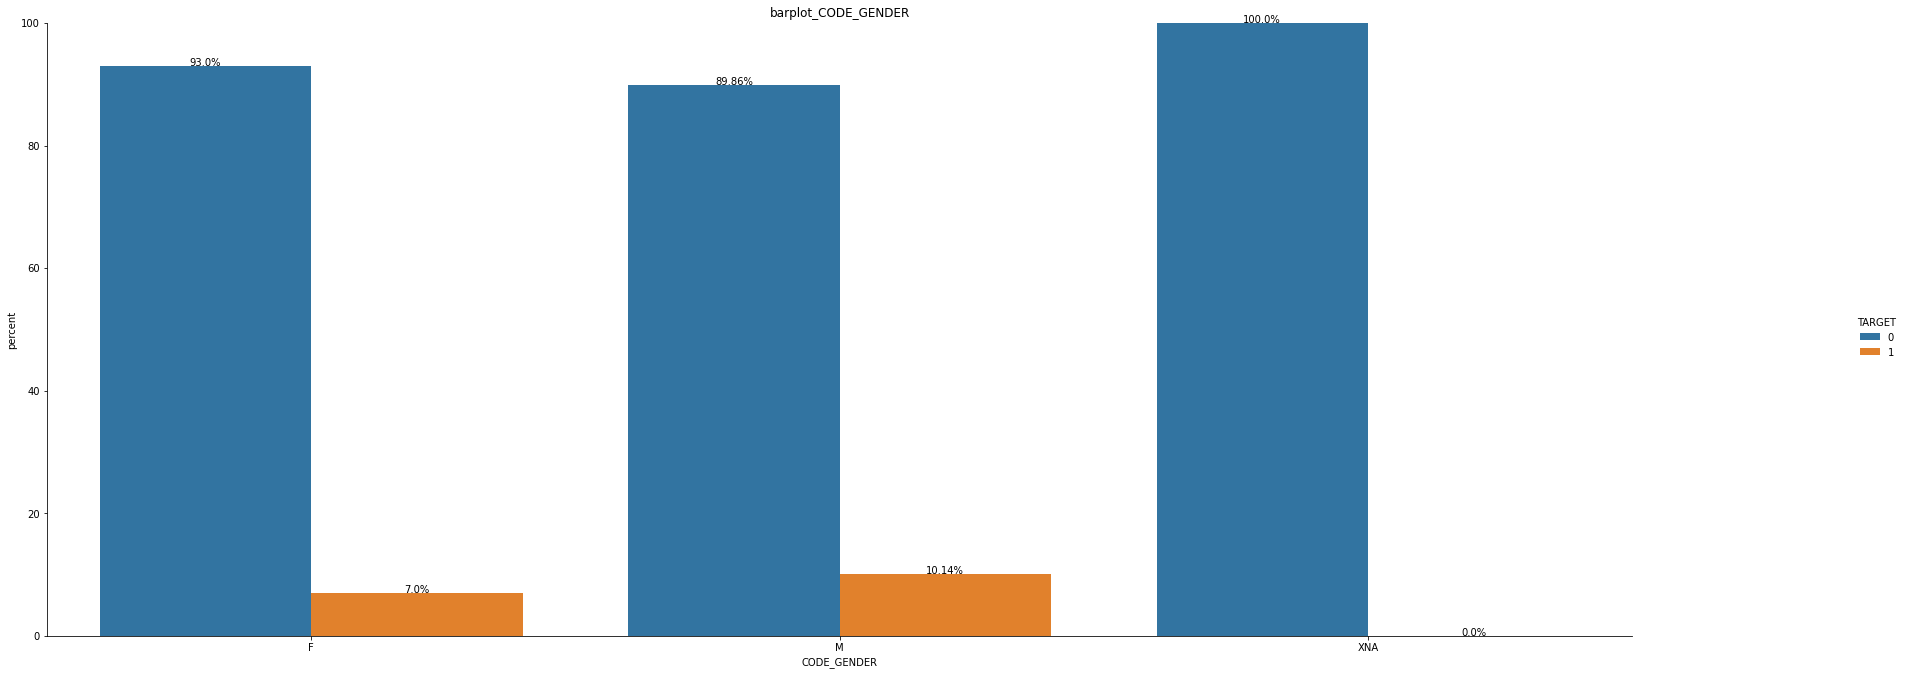

In [ ]:
visual_categorical(app_data, 'CODE_GENDER')

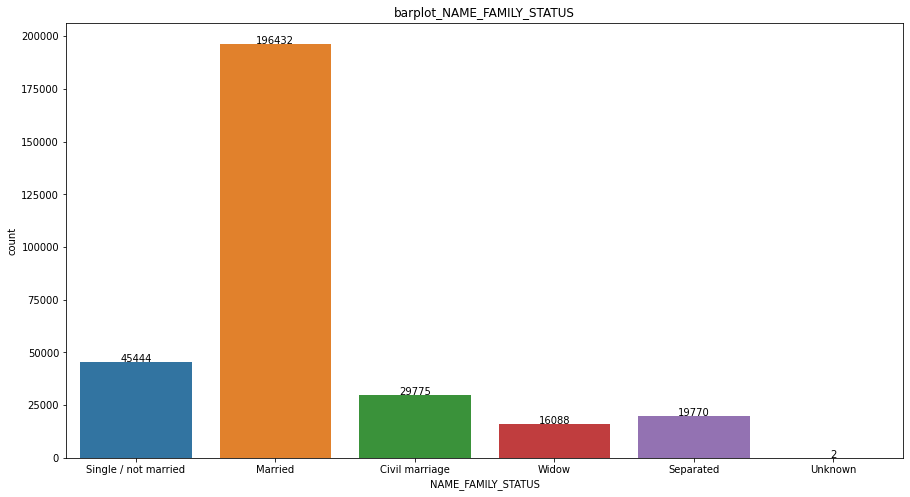

In [ ]:
visual_categorical(app_data, 'NAME_FAMILY_STATUS', just_count=True)

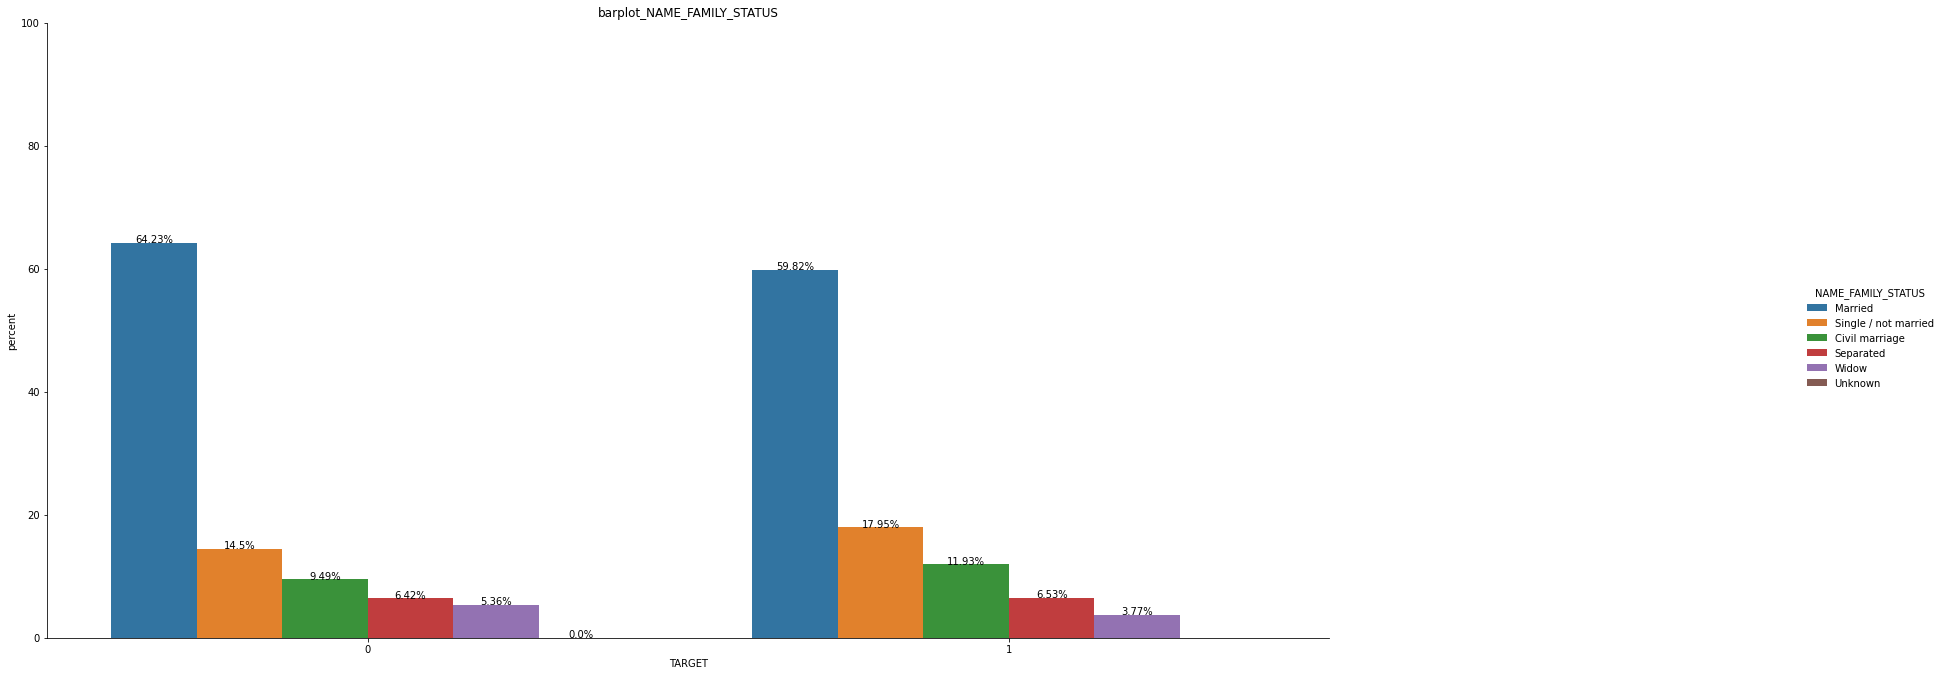

In [ ]:
visual_categorical(app_data, 'NAME_FAMILY_STATUS', norm=True, reverse=True)

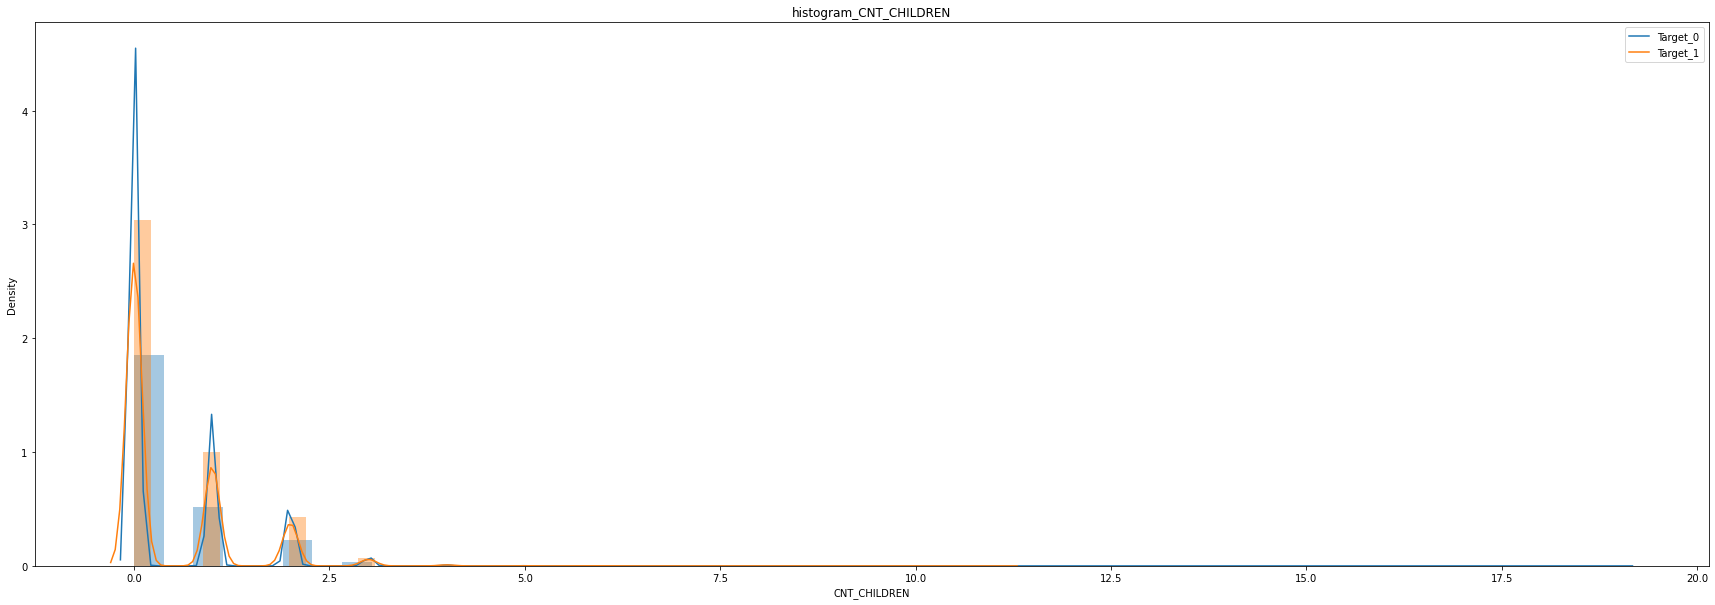

In [ ]:
visual_numerical(app_data, 'CNT_CHILDREN')

## 직장 관련 변수

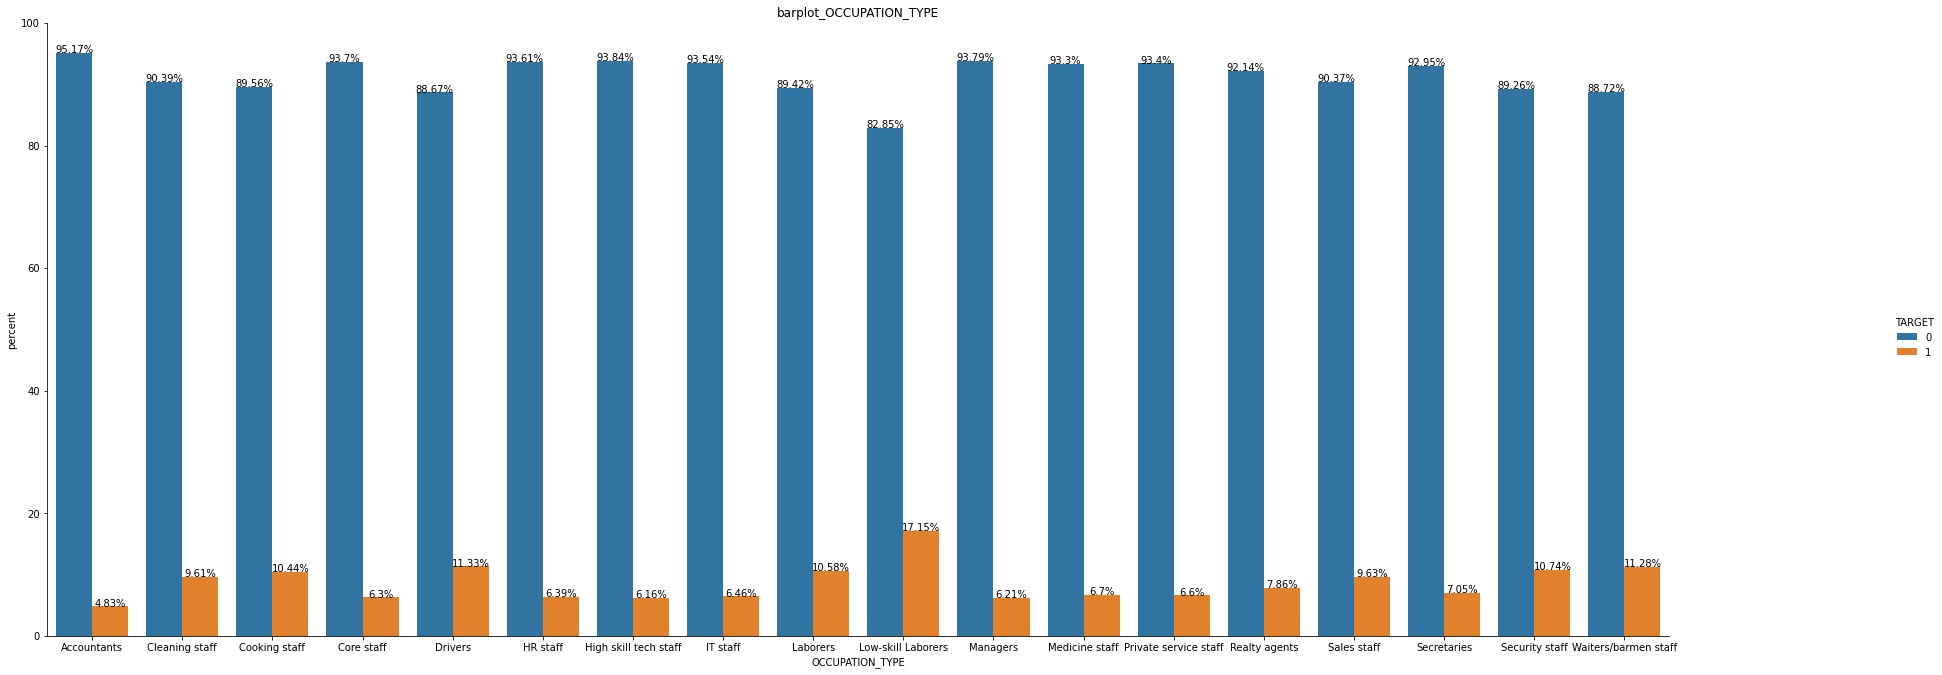

In [ ]:
visual_categorical(app_data, 'OCCUPATION_TYPE', norm=True, reverse=False)

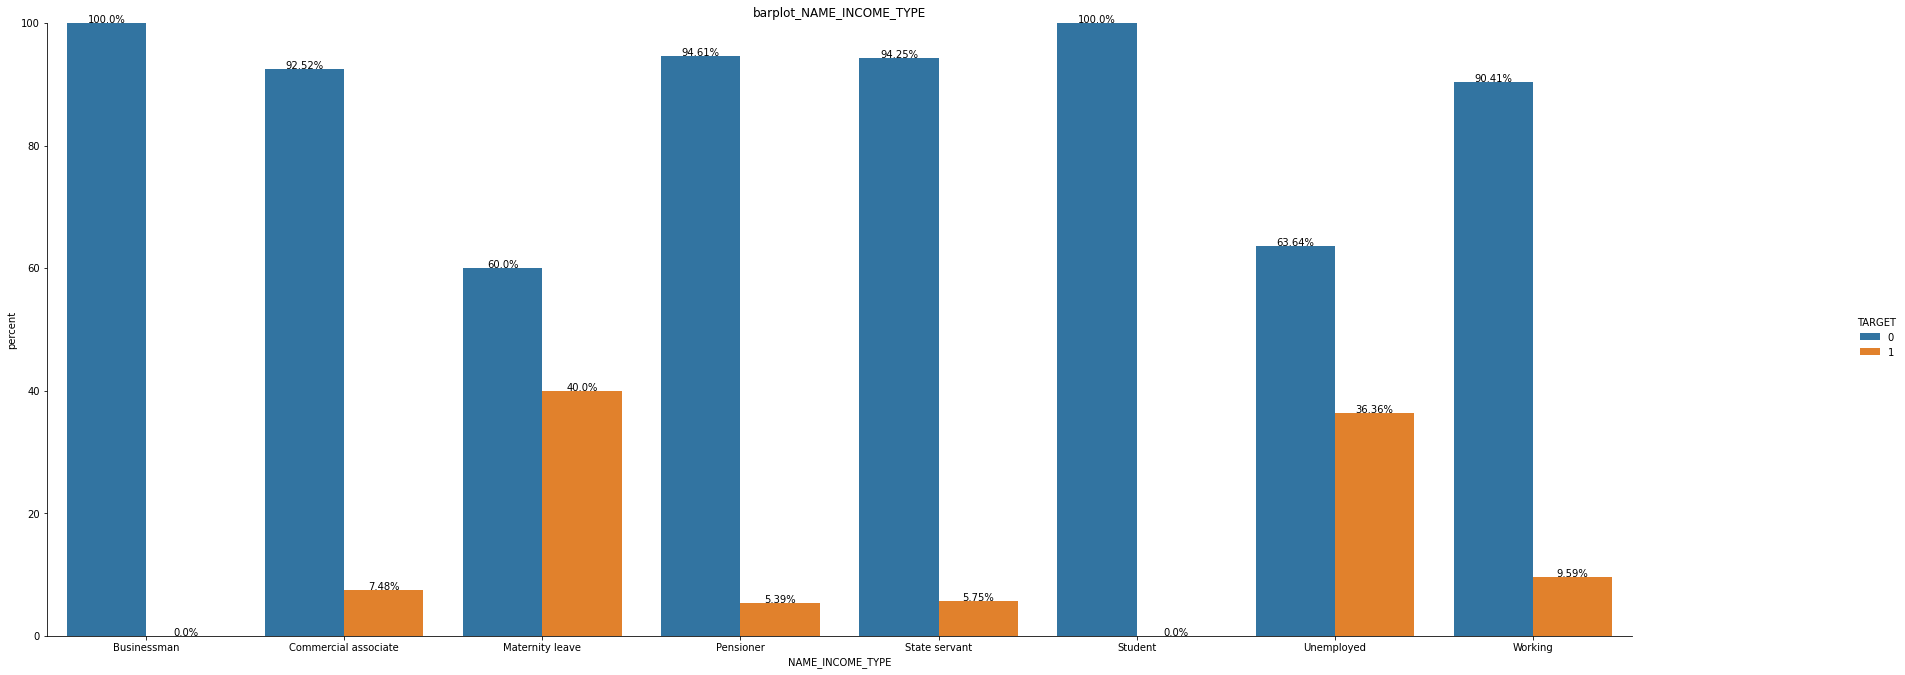

In [ ]:
visual_categorical(app_data, 'NAME_INCOME_TYPE', norm=True, reverse=False)

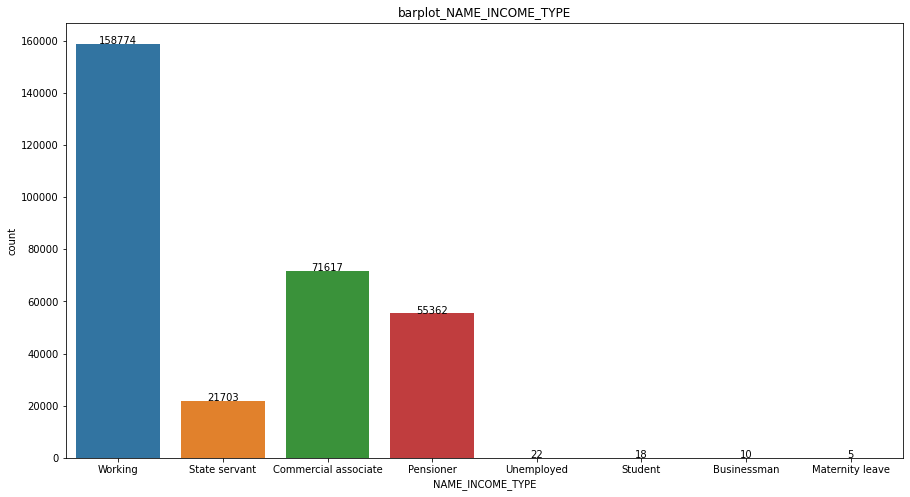

In [ ]:
visual_categorical(app_data, 'NAME_INCOME_TYPE', just_count=True)

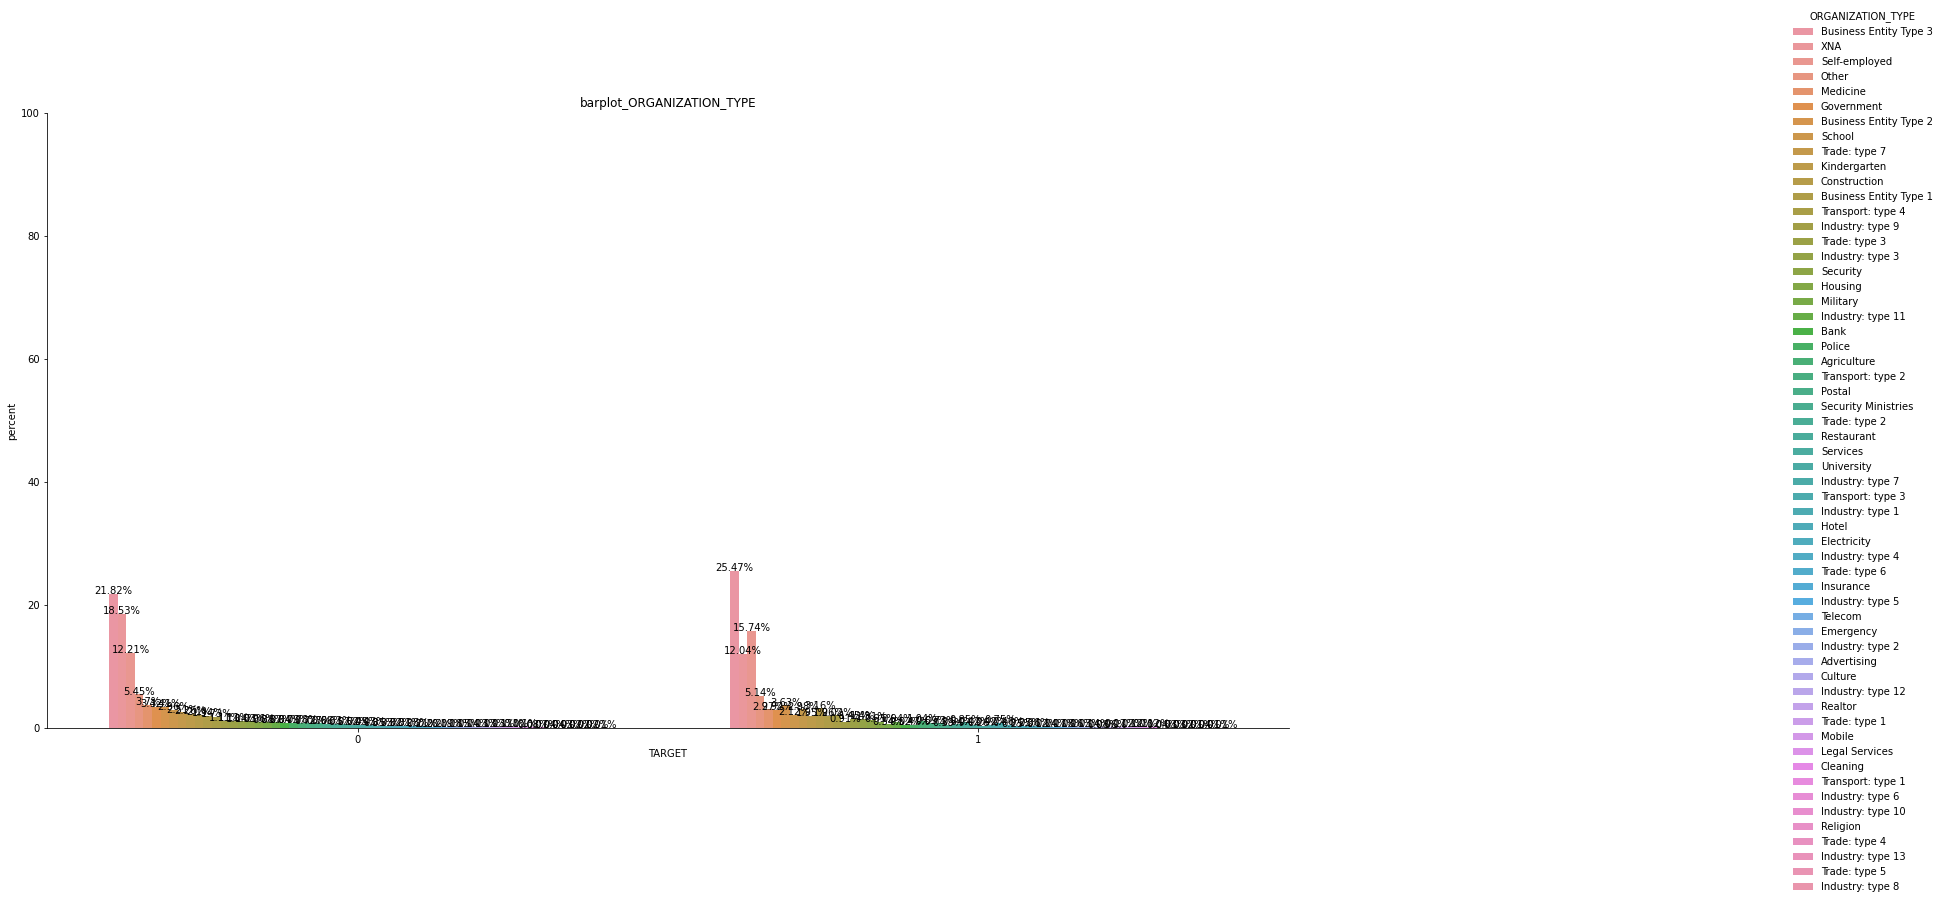

In [ ]:
visual_categorical(app_data, 'ORGANIZATION_TYPE', norm=True, reverse=True)

## 문의 관련 변수

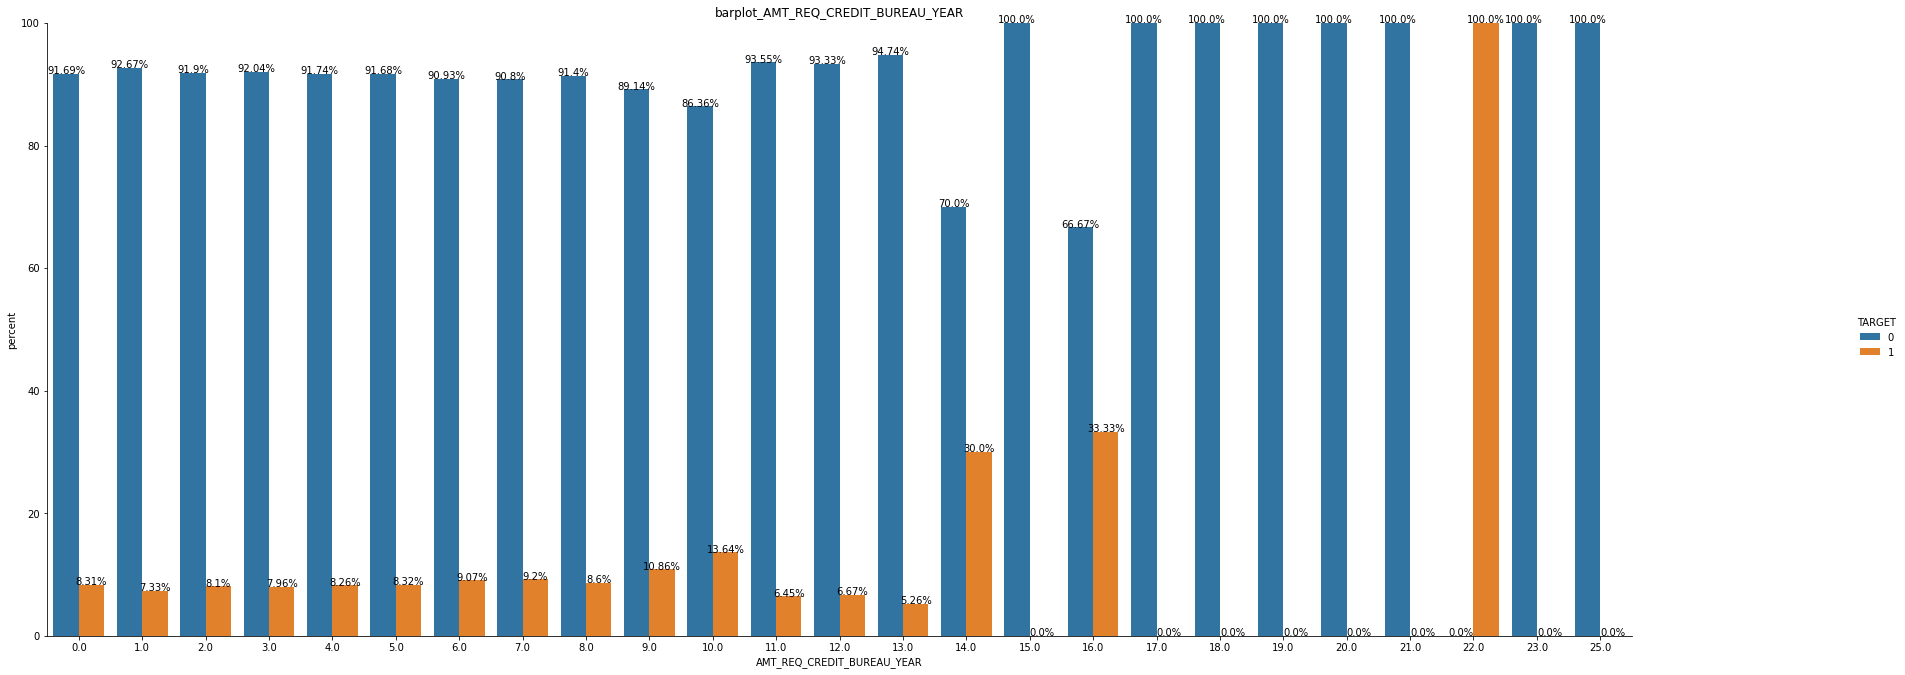

In [ ]:
visual_categorical(app_data_deleted, 'AMT_REQ_CREDIT_BUREAU_YEAR')

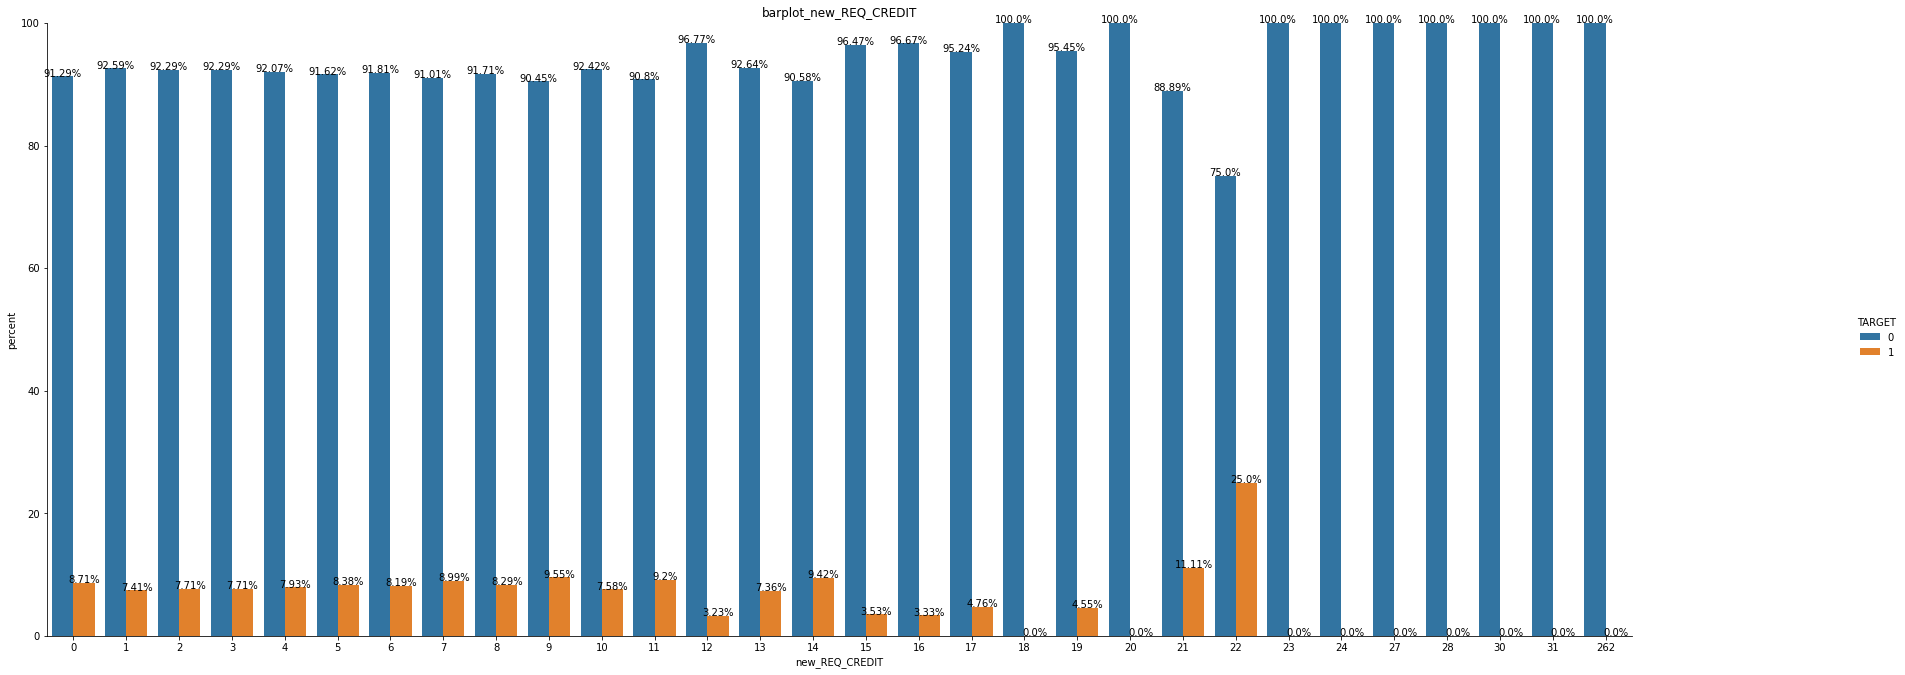

In [ ]:
visual_categorical(app_data, 'new_REQ_CREDIT')

## 기타

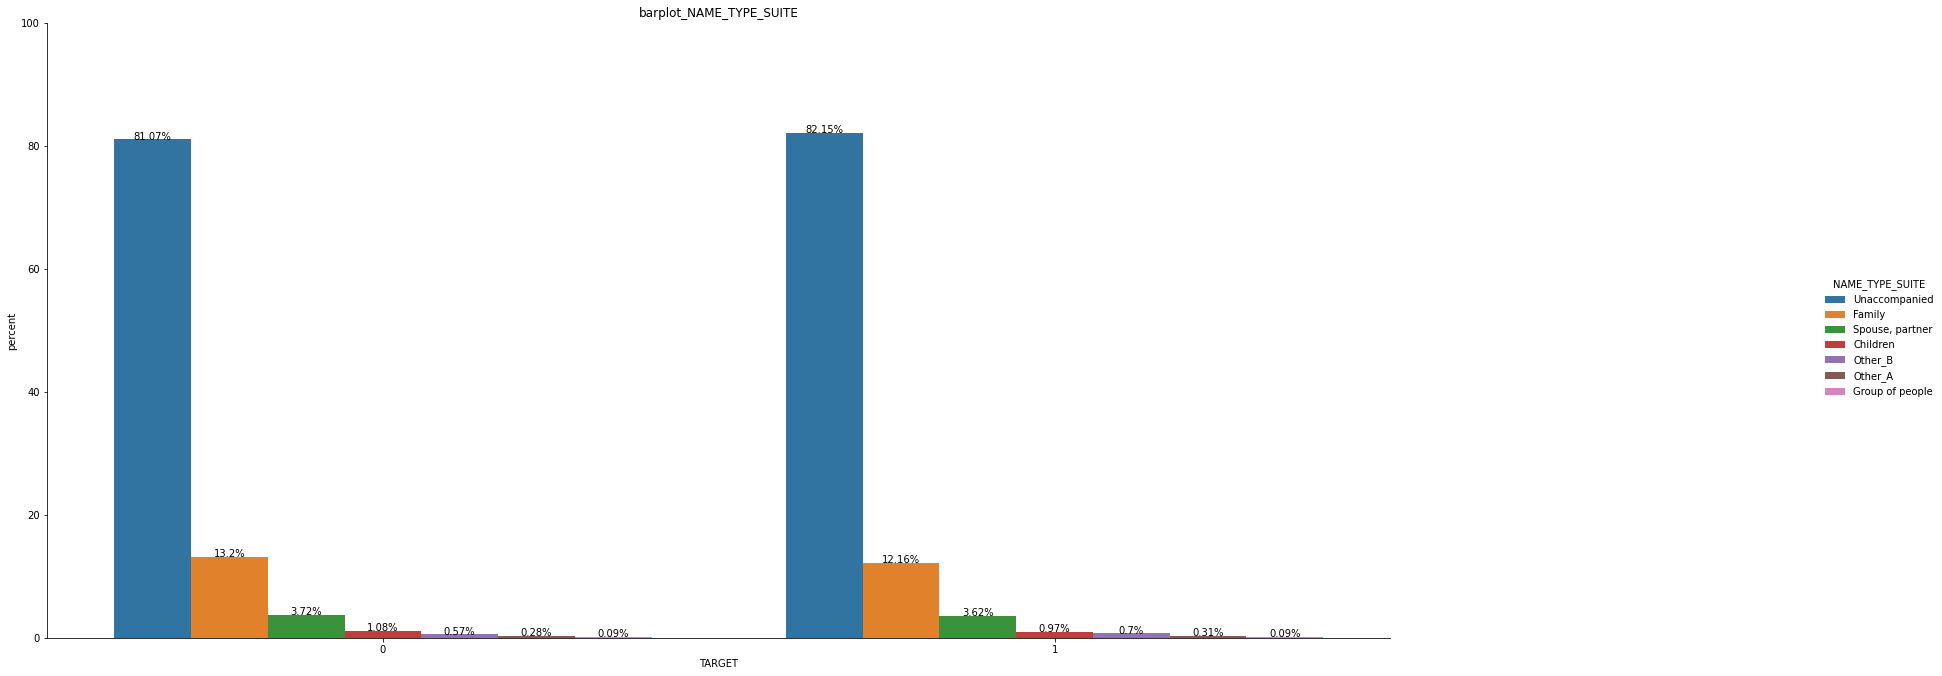

In [ ]:
visual_categorical(app_data, 'NAME_TYPE_SUITE', reverse=True) # 14

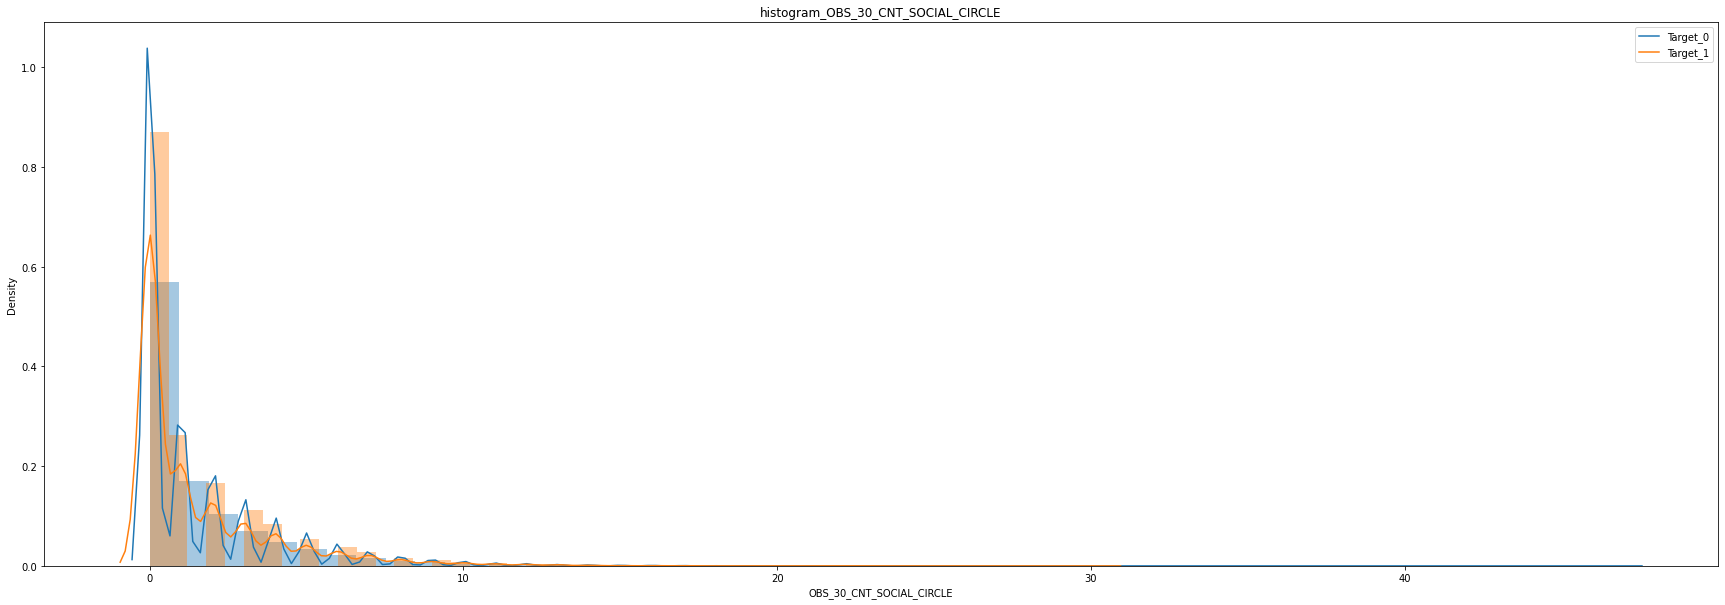

In [ ]:
visual_numerical(app_data_deleted, 'OBS_30_CNT_SOCIAL_CIRCLE')

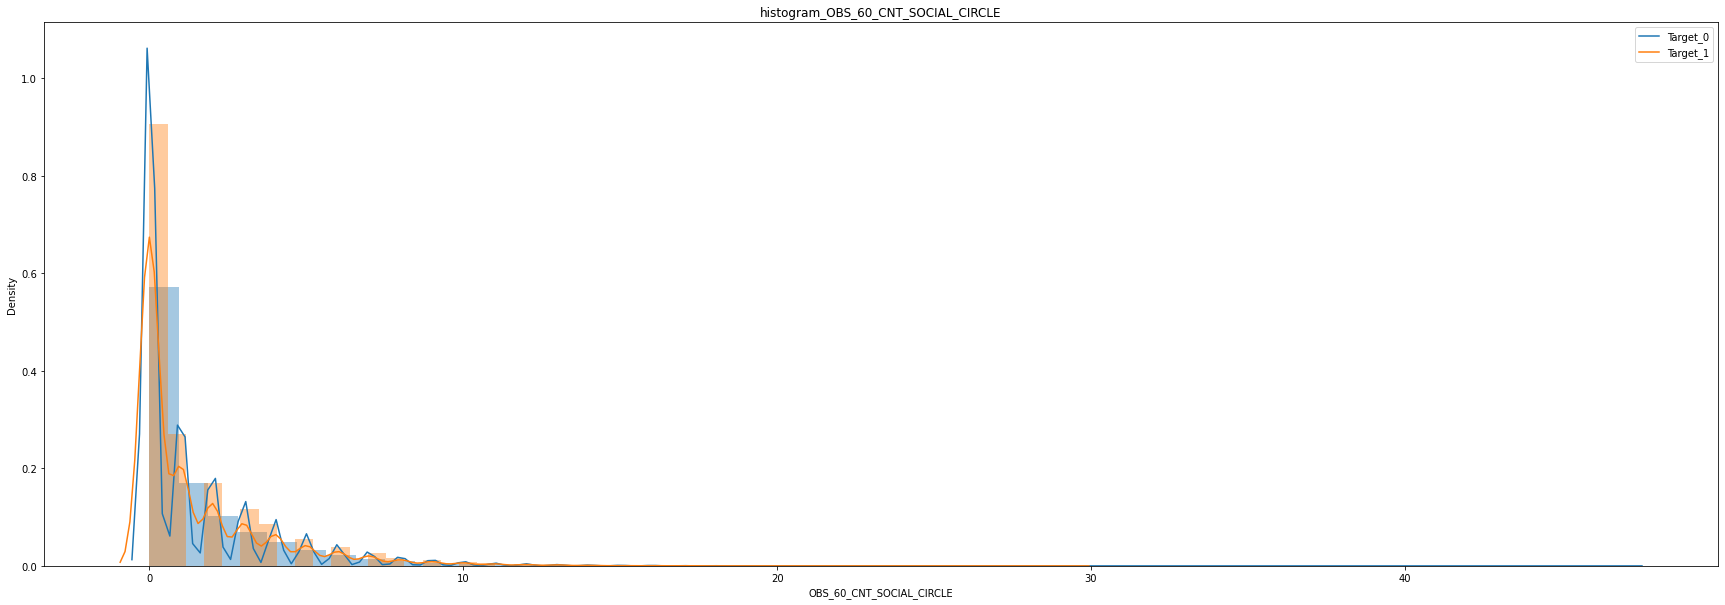

In [ ]:
visual_numerical(app_data_deleted, 'OBS_60_CNT_SOCIAL_CIRCLE')

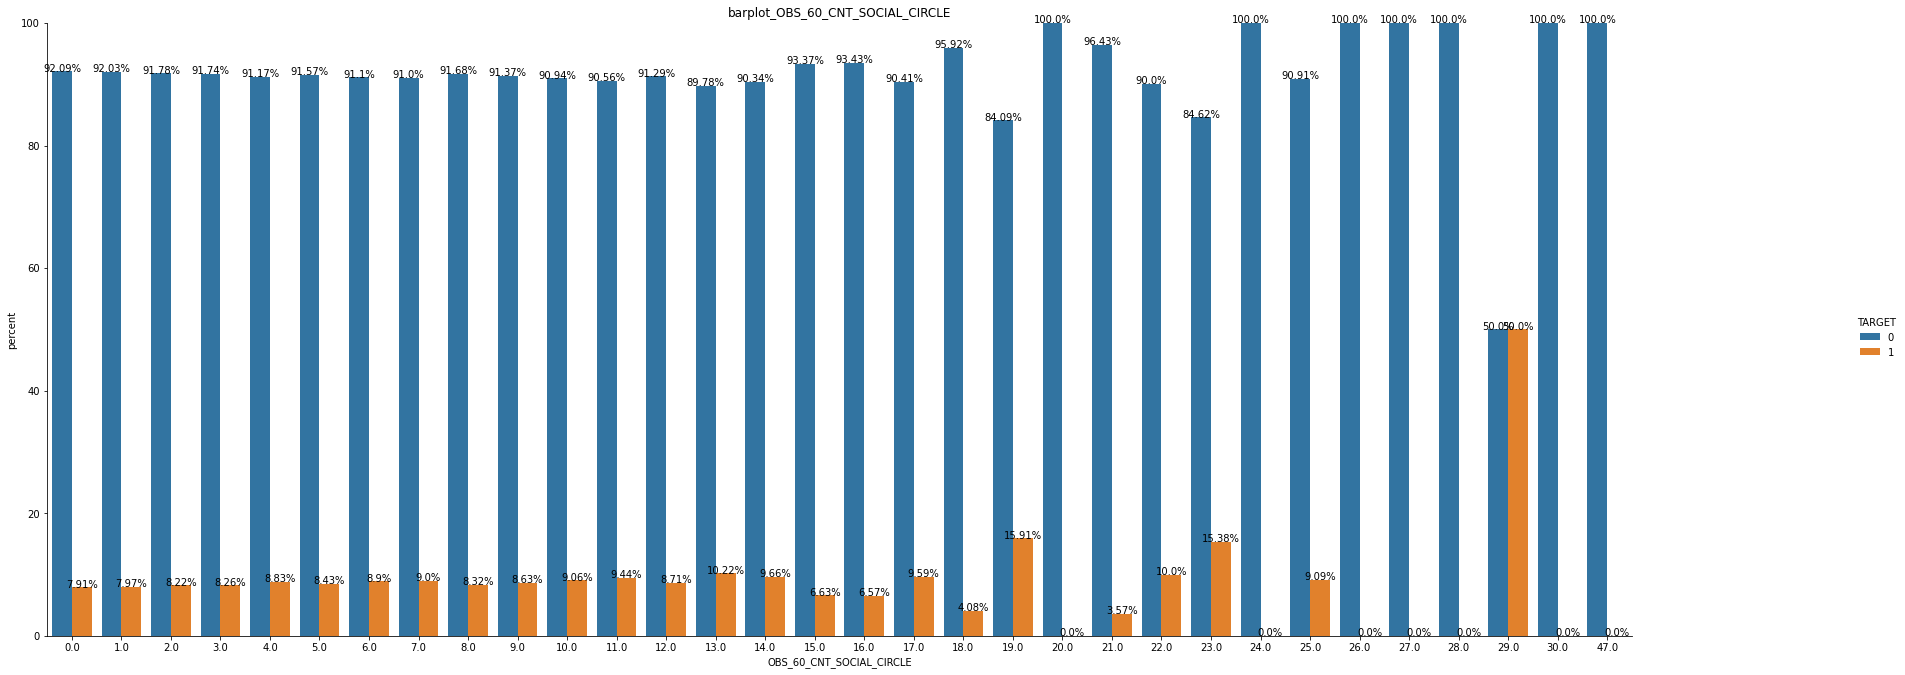

In [ ]:
visual_categorical(app_data_deleted, 'OBS_60_CNT_SOCIAL_CIRCLE')

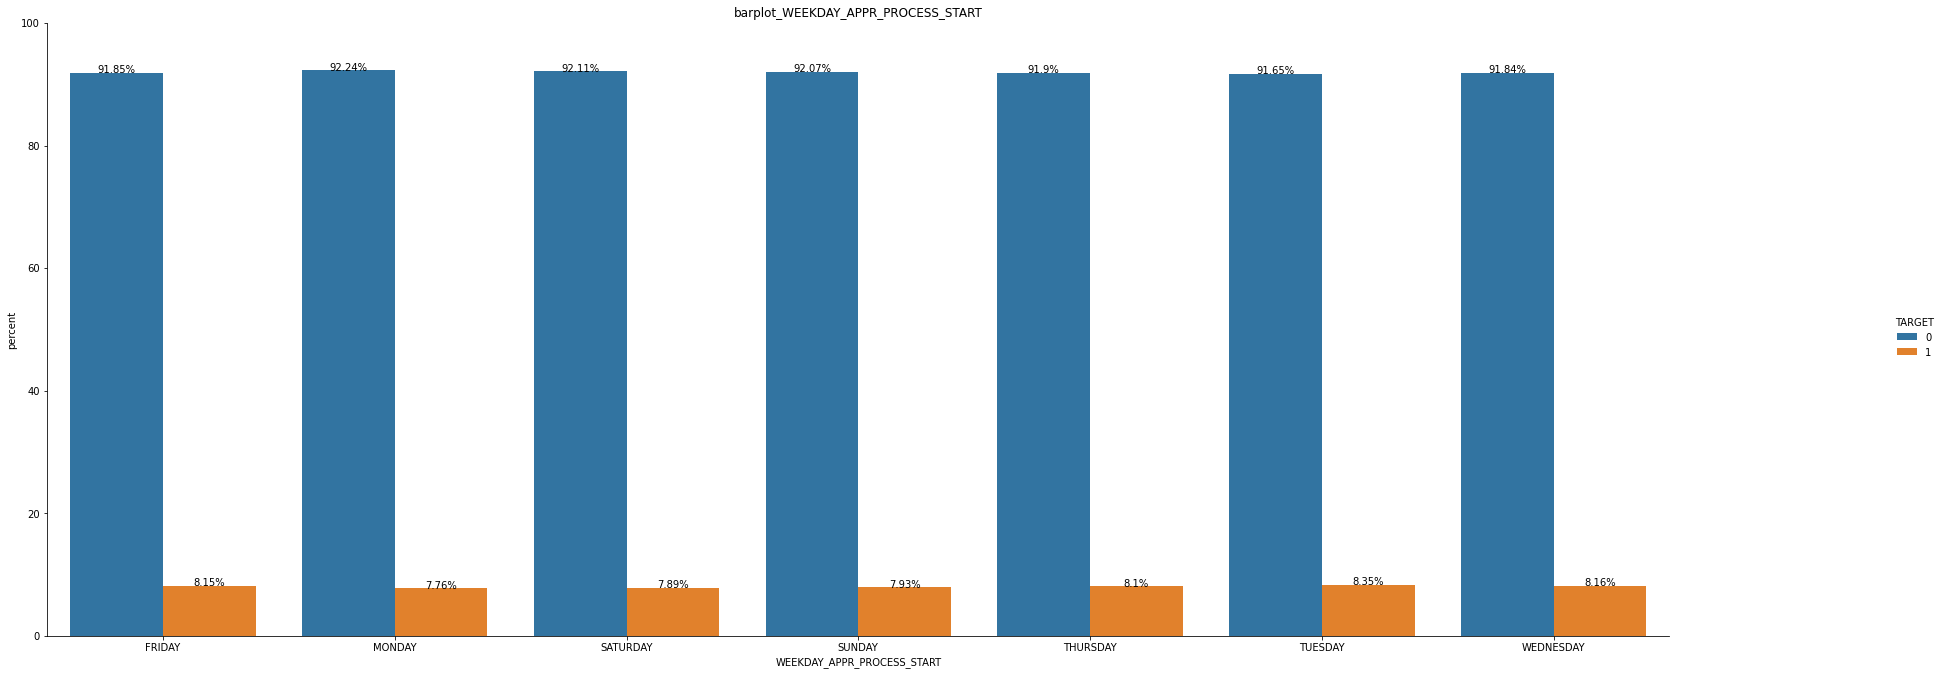

In [ ]:
visual_categorical(app_data, 'WEEKDAY_APPR_PROCESS_START')

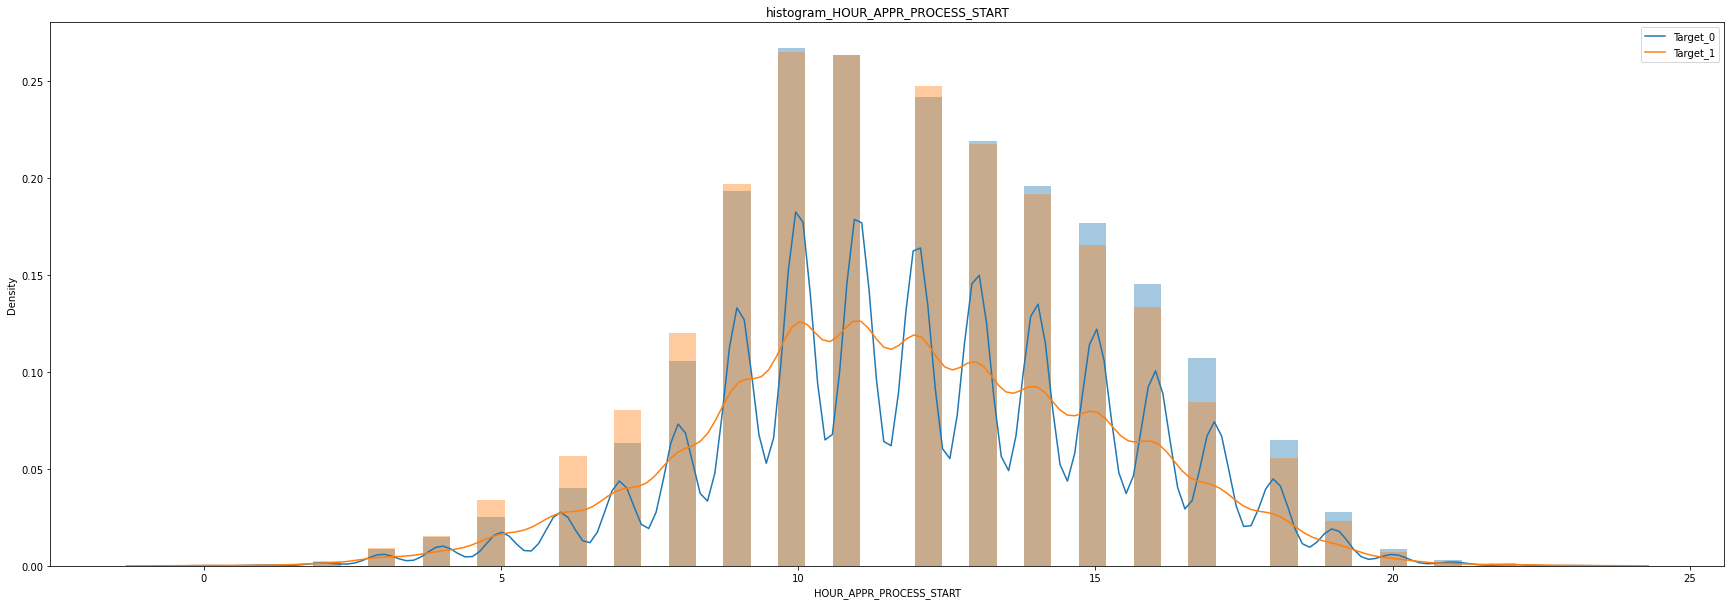

In [ ]:
visual_numerical(app_data, 'HOUR_APPR_PROCESS_START')

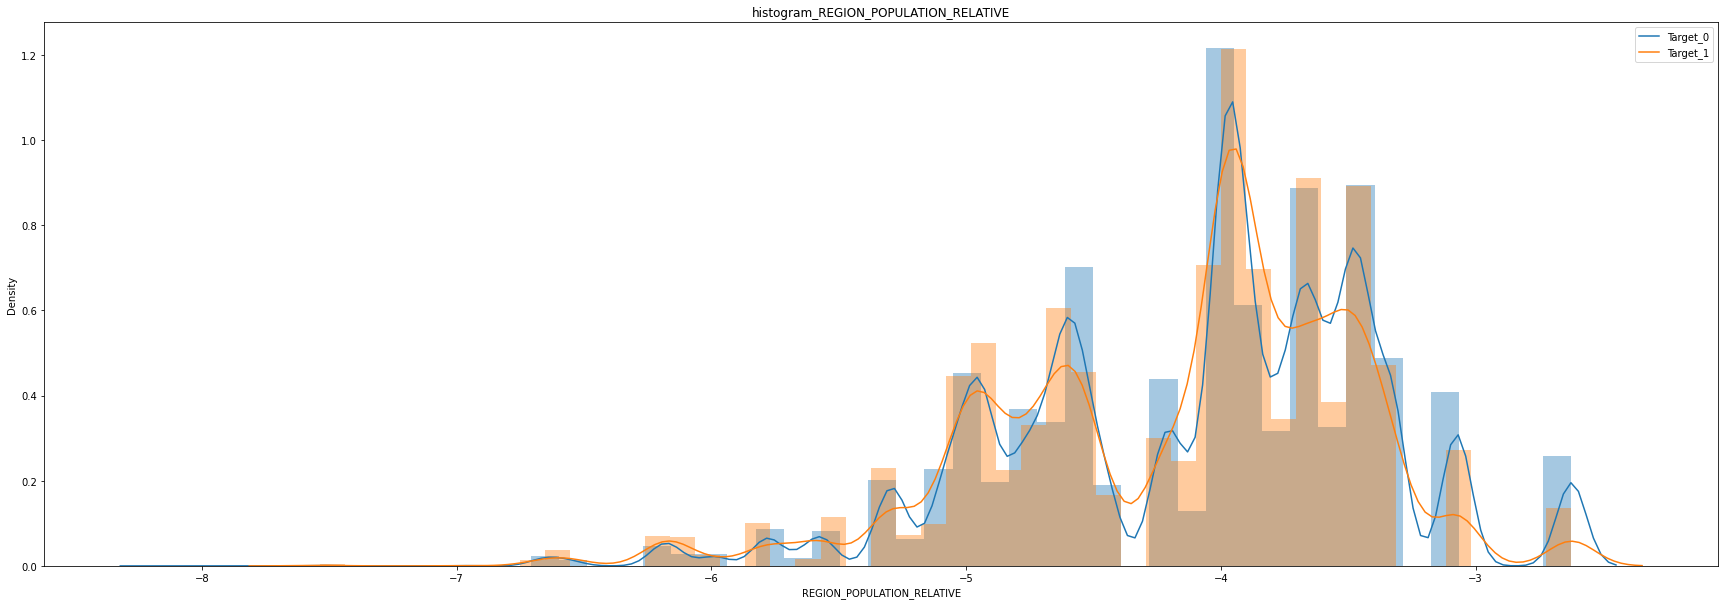

In [ ]:
visual_numerical(app_data, 'REGION_POPULATION_RELATIVE', log=True)

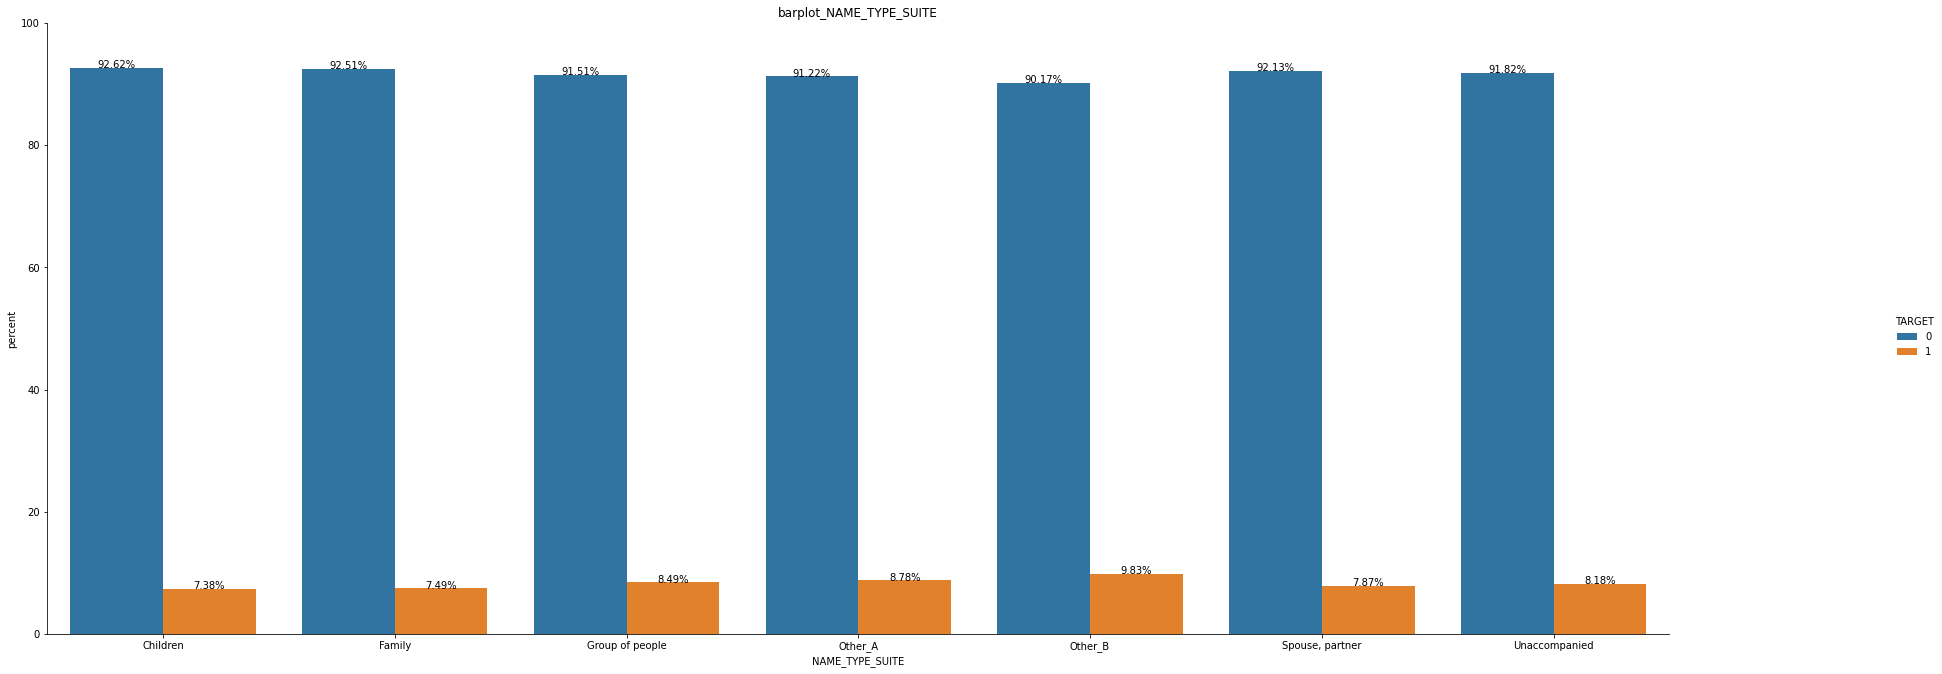

In [ ]:
visual_categorical(app_data, 'NAME_TYPE_SUITE')

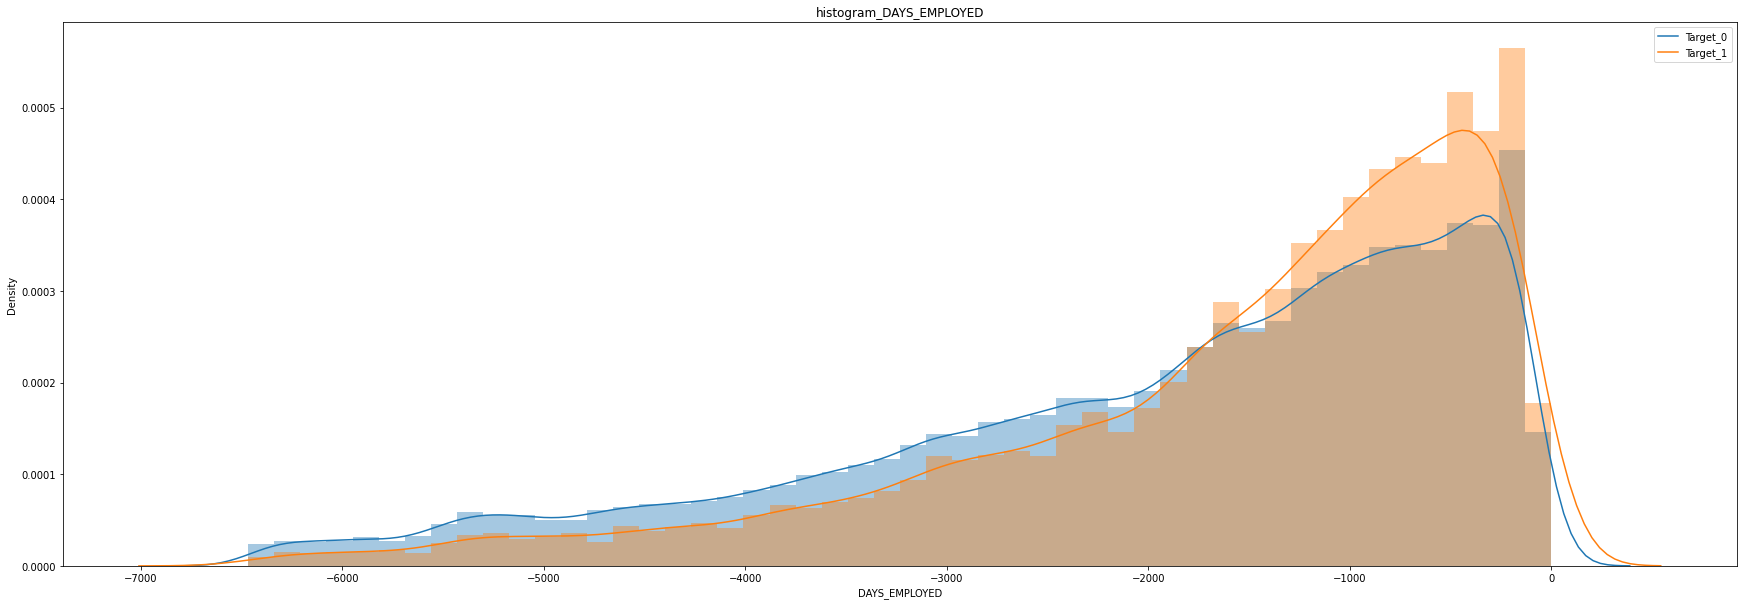

In [ ]:
visual_numerical(temp, 'DAYS_EMPLOYED')

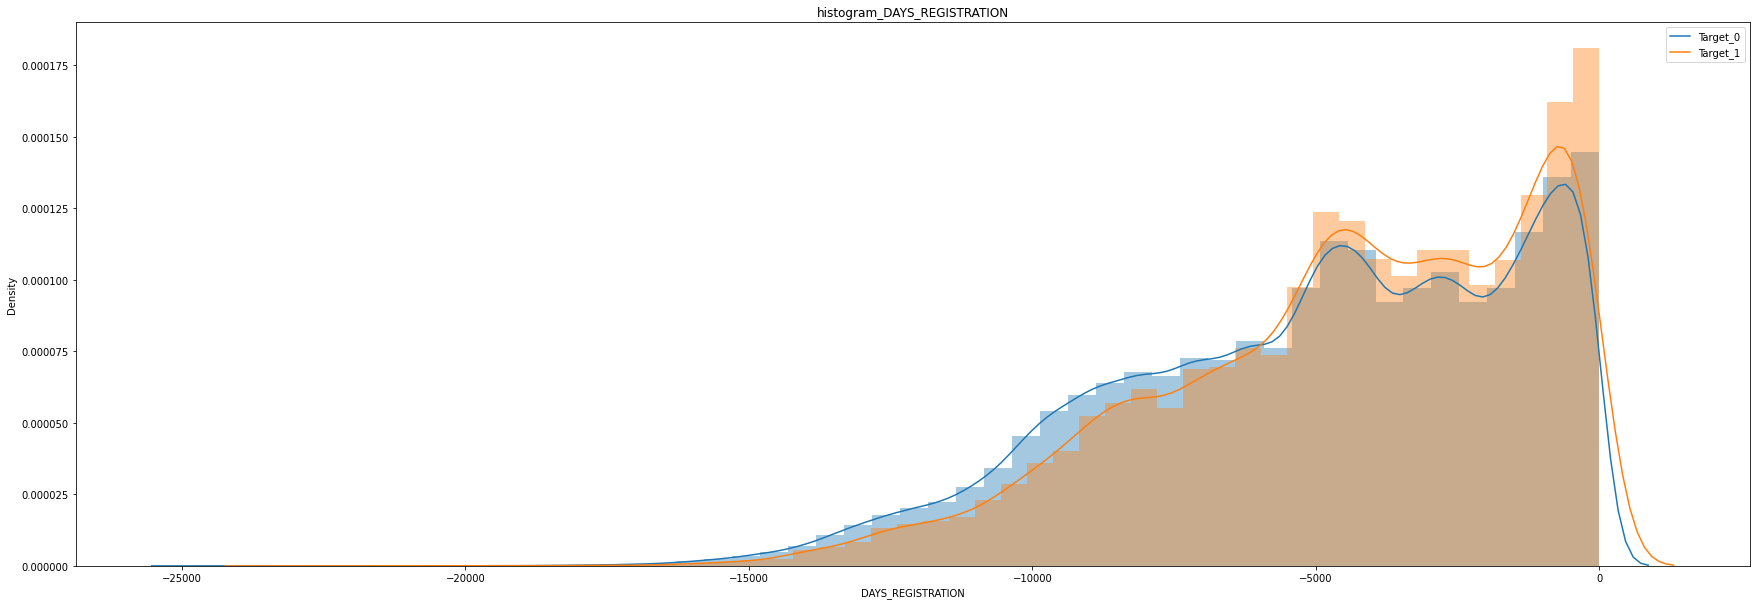

In [ ]:
visual_numerical(app_data, 'DAYS_REGISTRATION')

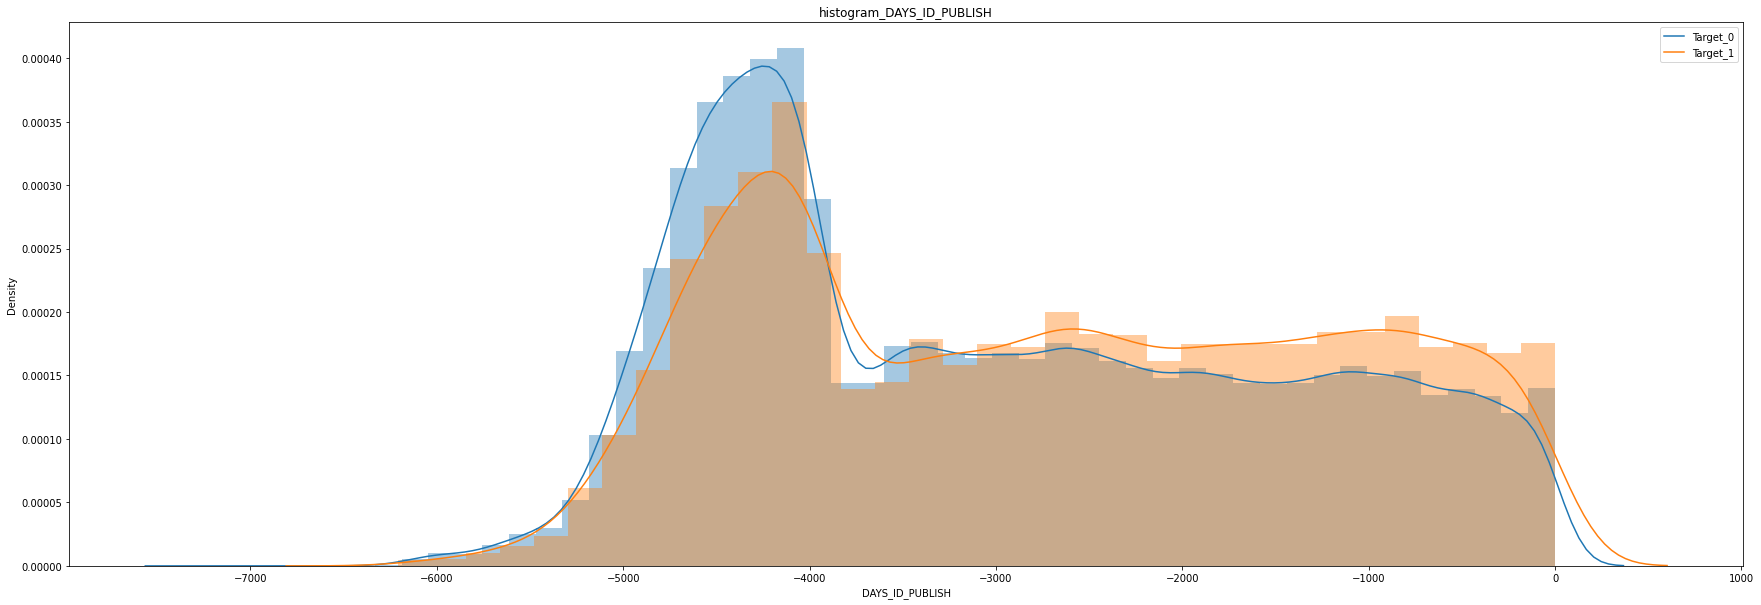

In [ ]:
visual_numerical(app_data, 'DAYS_ID_PUBLISH')

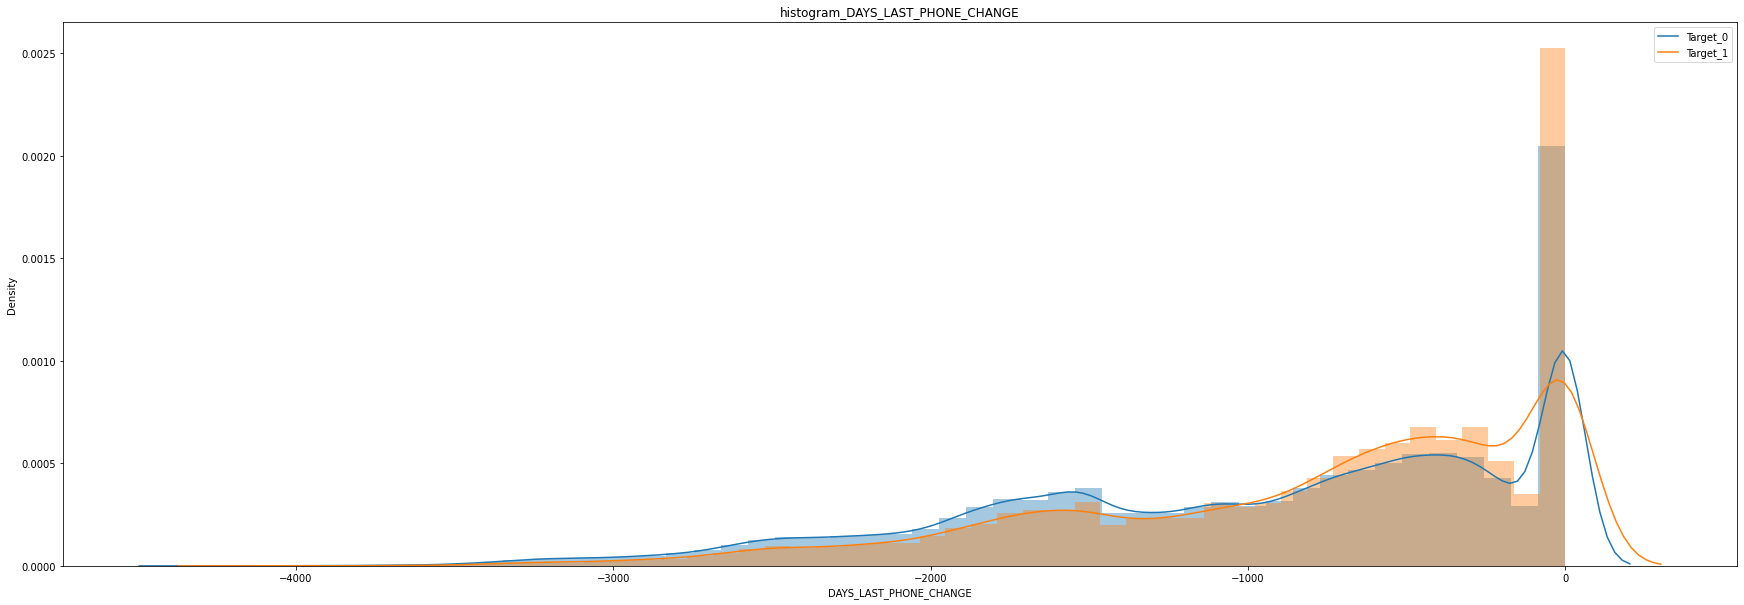

In [ ]:
visual_numerical(app_data, 'DAYS_LAST_PHONE_CHANGE')